# Telecom Churn

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

### Importing dependencies

In [4]:
import pandas as pd
import numpy as np
import re
import os

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("./train.csv")
unseen = pd.read_csv("./test.csv")

In [8]:
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

### EDA

In [11]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [13]:
df.describe(include="all")

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [15]:
## Finding the columns which have single value and dropping them

columns = []
for i in df.columns:
    if df[i].nunique() == 1:
        columns.append(i)
print(columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [17]:
df.drop(columns,axis=1,inplace=True) 

In [19]:
df.shape

(69999, 159)

In [24]:
# Checking null value and imputing them
df.isnull().mean()*100

id                           0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_m

In [26]:
cat_columns = []
for i in df.columns:
    if df[i].nunique() == 2:
        cat_columns.append(i)
print(cat_columns)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn_probability']


In [28]:
# Separating categorical and numerical data

id_variable = ['id']

date_variable = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

categorical_variable = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

numerical_variable = []

for i in df.columns:
    if i not in categorical_variable and (df[i].dtype == 'float64' or df[i].dtype == 'int64'):
        numerical_variable.append(i)
        
print(f'date columns: ${date_variable} \n\ncategorical columns: ${categorical_variable} \n\nnumerical columns: ${numerical_variable}')

date columns: $['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'] 

categorical columns: $['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'] 

numerical columns: $['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_

In [30]:
# Imputing null values for categorical variable

df[categorical_variable] = df[categorical_variable].apply(lambda x: x.fillna(-1))

df[categorical_variable] = df[categorical_variable].apply(lambda column: column.astype("category"), axis=0)

In [32]:
df[categorical_variable].isnull().mean()

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [34]:
df[numerical_variable].isnull().mean()*100

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t

### Imputing null values for numerical variable having recharge variable

In [37]:
recharge_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

df[recharge_col] = df[recharge_col].apply(lambda x: x.fillna(0))

In [39]:
df[numerical_variable].isnull().mean()*100

id                     0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_mou_7           3.838626
loc_og_mou_8           5.290076
std_og_t

In [41]:
# Imputing arpu variable with median 

for i in df.columns:
    if i in ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']:
        df[i].replace(np.nan,df[i].median(),inplace=True)

In [43]:
df[numerical_variable].isnull().mean()*100

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t

In [45]:
#Imputing Numerical Variable
for i in numerical_variable:
    df[i].replace(np.nan,df[i].median(),inplace=True)

In [47]:
df[numerical_variable].isnull().mean()*100

id                    0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

### Lets derive new additional variable for EDA

In [50]:
# Creating dummy variable

df_cat_dummies = pd.get_dummies(df[categorical_variable], drop_first=True)
df_cat_dummies.head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                 False                 False                 False   
1                 False                 False                  True   
2                 False                 False                 False   
3                 False                 False                 False   
4                  True                 False                  True   

   night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                  True                 False   

   fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  \
0          False          False          False          False          False   
1          False          False          False           True          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False           True          False           True          False   

   fb_user_8_1.0  
0          False  
1          False  
2          False  
3          False  
4           True

In [52]:
# Concating numerical columns with caegorical dummy variables
df = pd.concat([df, df_cat_dummies], axis=1)
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [54]:
#Removing the categorical original columns after dummy creation

df.drop(categorical_variable,axis=1,inplace=True)
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [56]:
# Feature Creation

df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_6 + df.total_data_rech_7

df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [58]:
## extracted day from the date and removing the original column


df['date_of_last_rech_6'].replace(np.nan,df['date_of_last_rech_6'].mode().values[0],inplace=True)
df['date_of_last_rech_7'].replace(np.nan,df['date_of_last_rech_7'].mode().values[0],inplace=True)
df['date_of_last_rech_8'].replace(np.nan,df['date_of_last_rech_8'].mode().values[0],inplace=True)

df['day_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], format='%m/%d/%Y').dt.day
df['day_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], format='%m/%d/%Y').dt.day
df['day_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], format='%m/%d/%Y').dt.day

df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

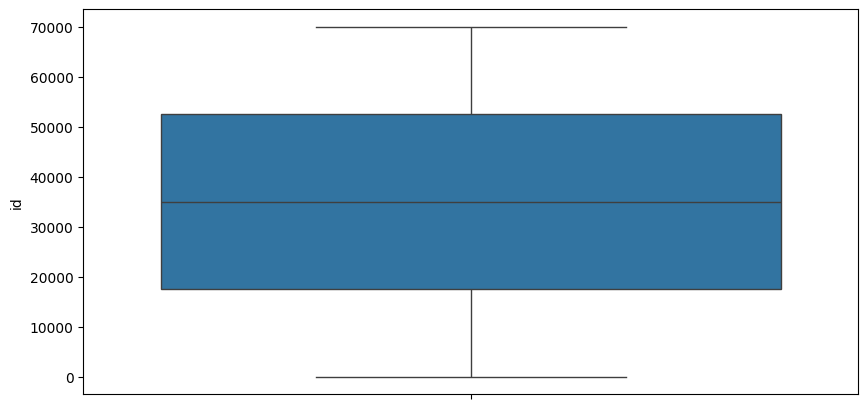

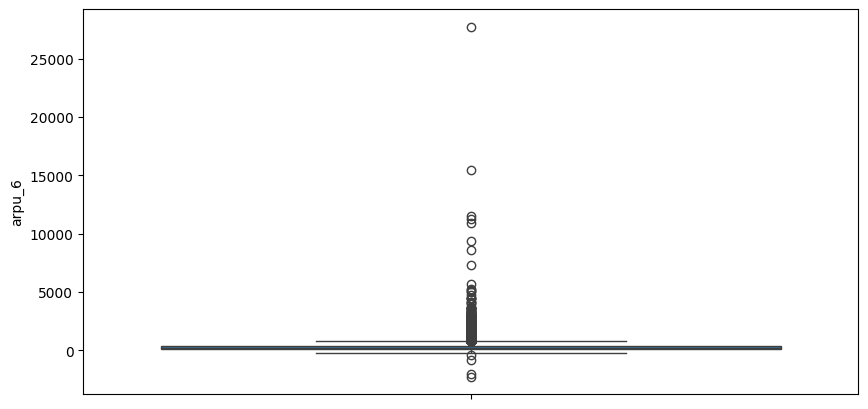

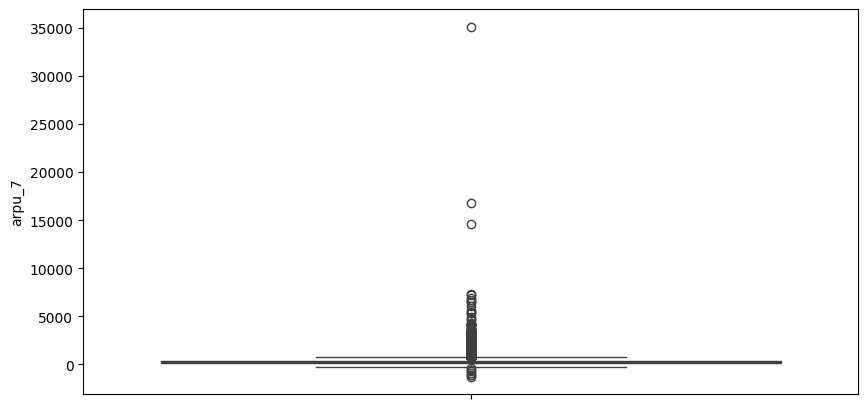

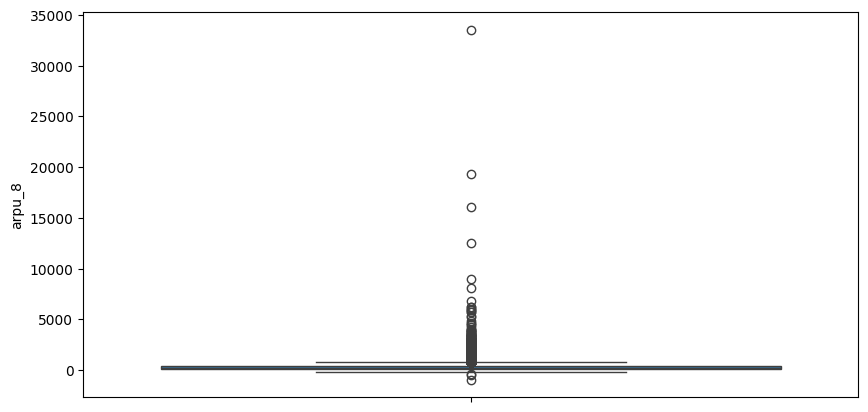

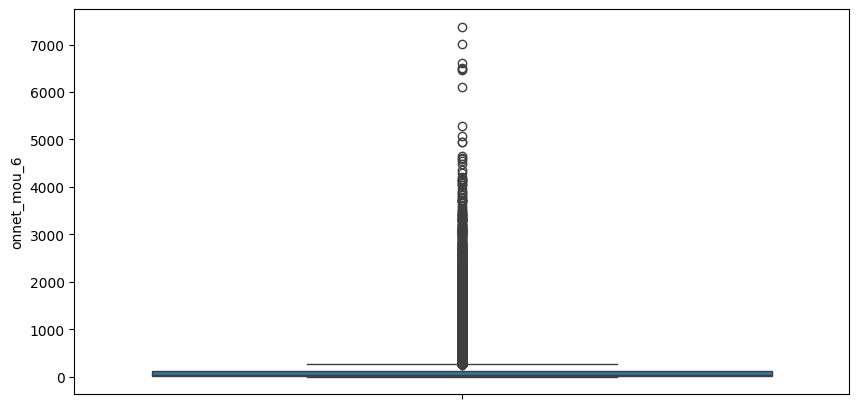

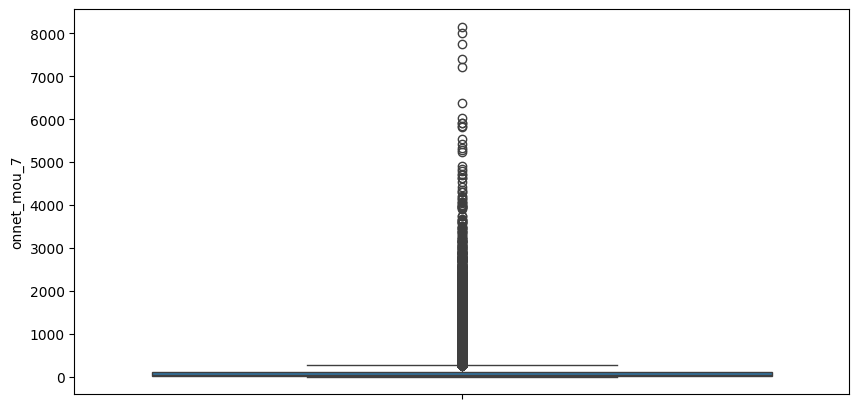

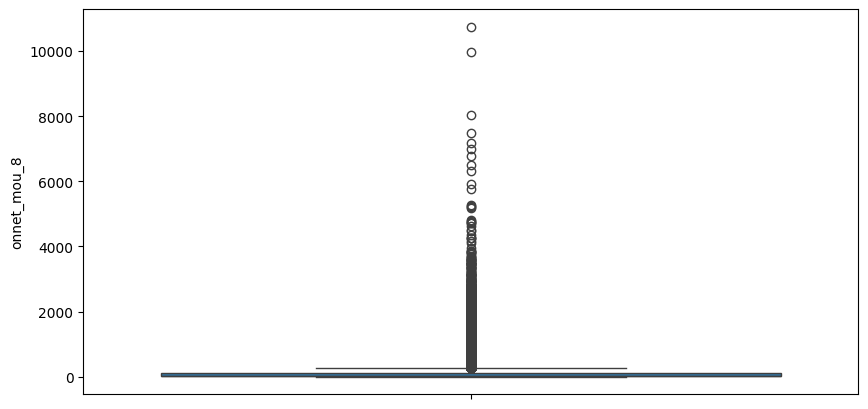

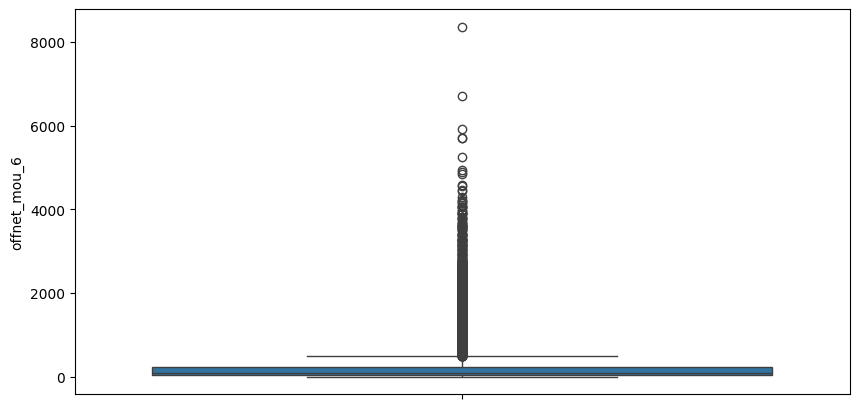

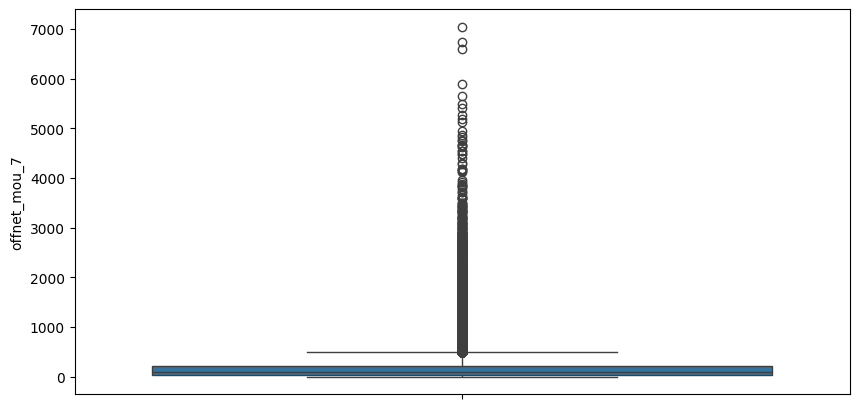

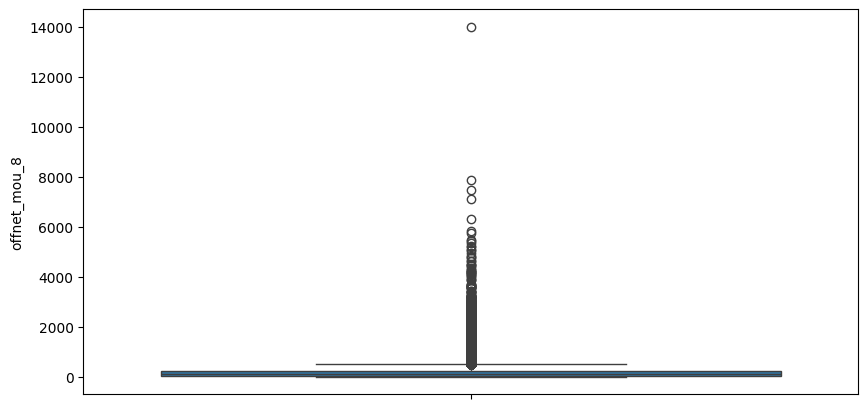

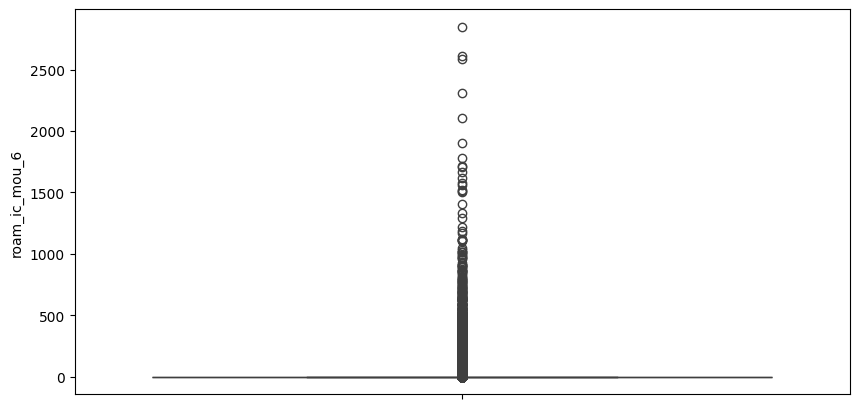

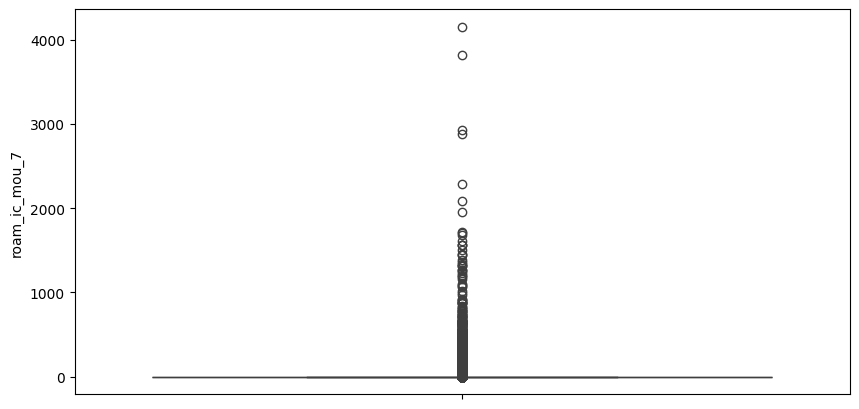

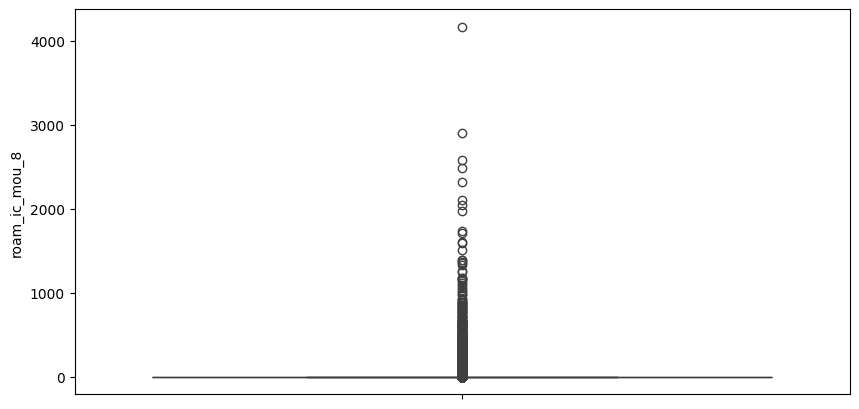

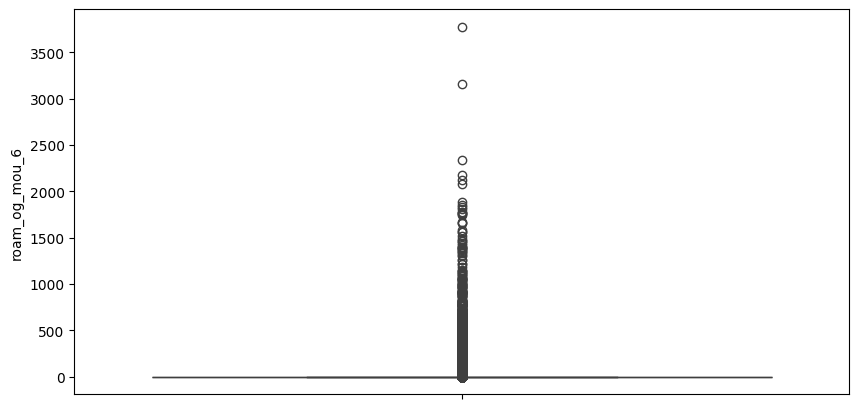

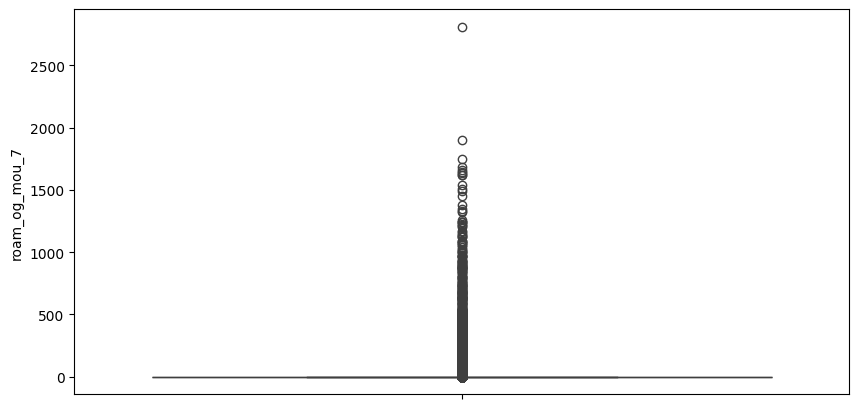

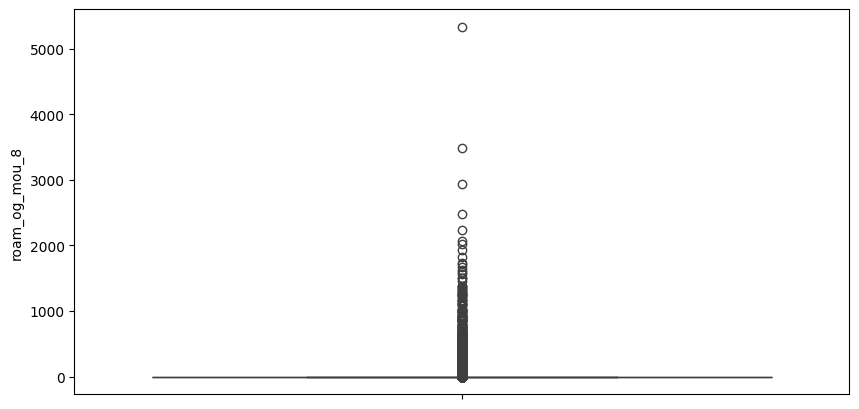

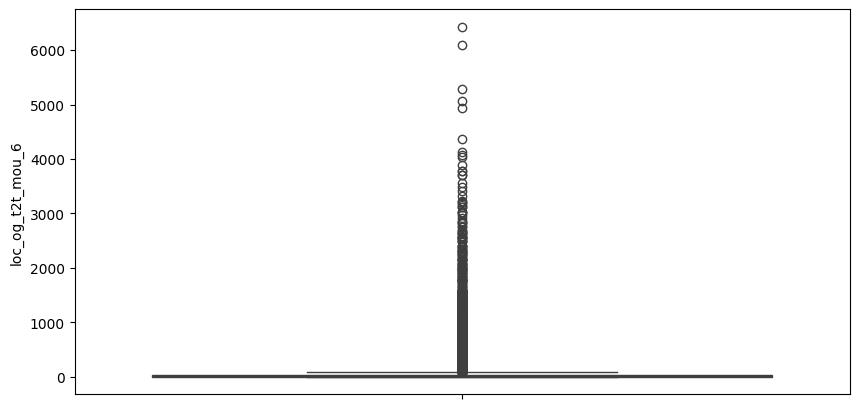

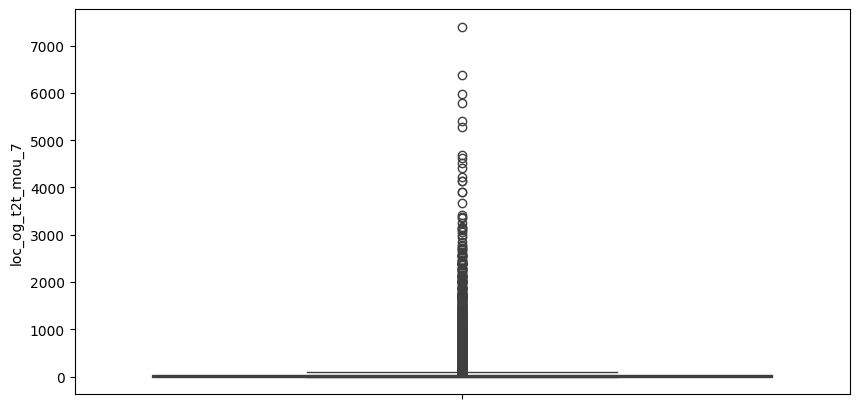

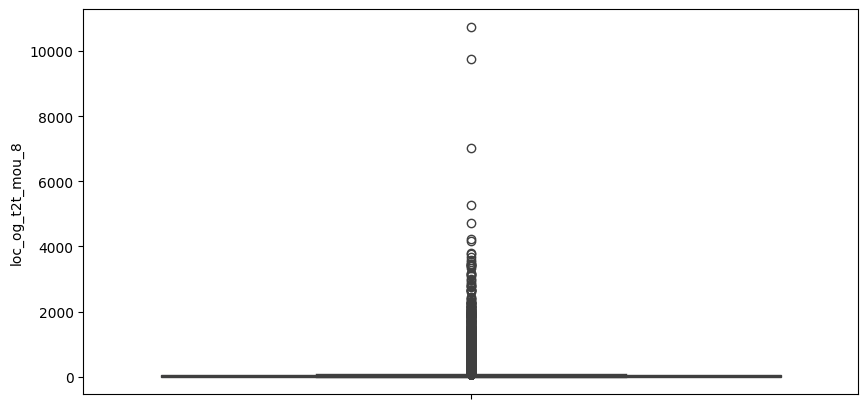

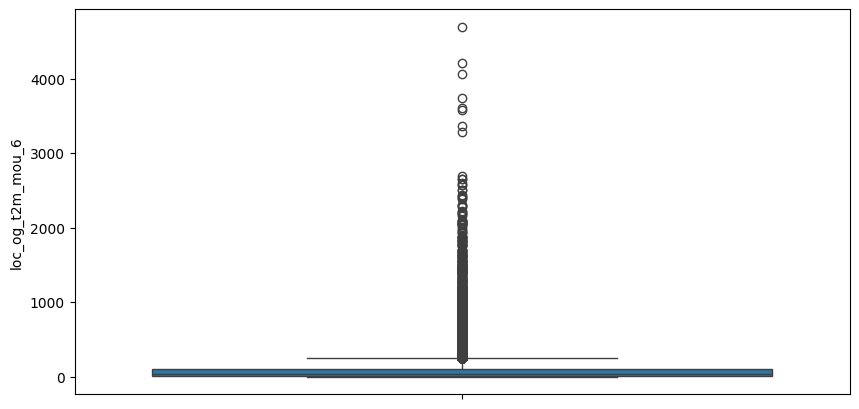

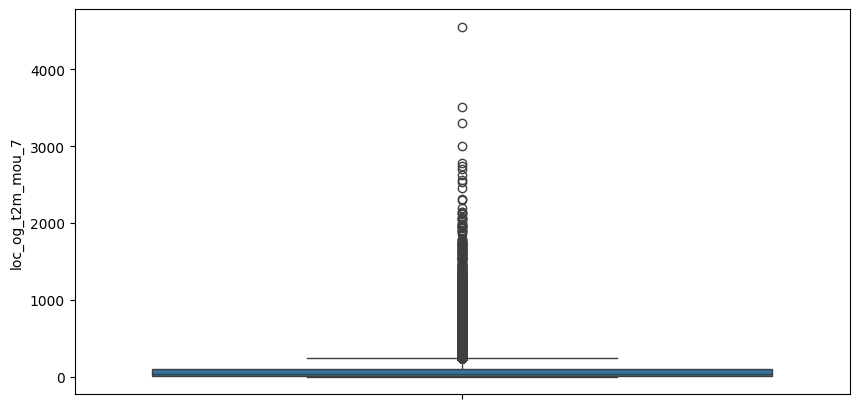

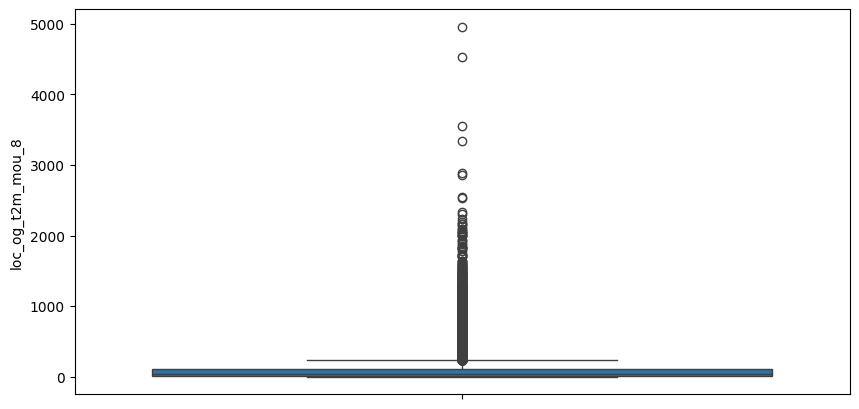

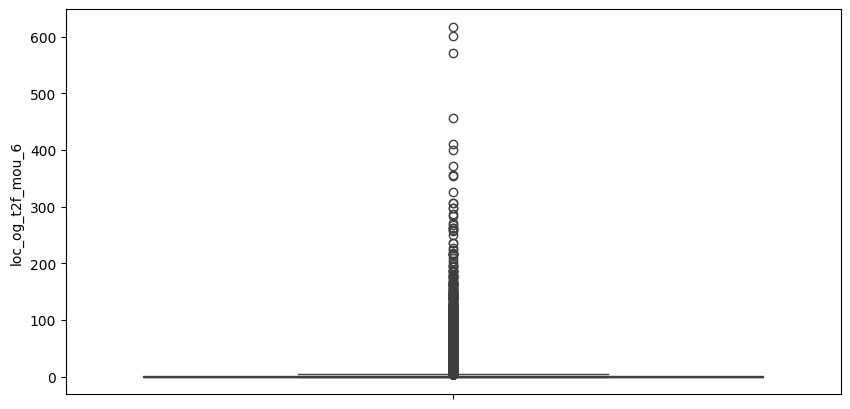

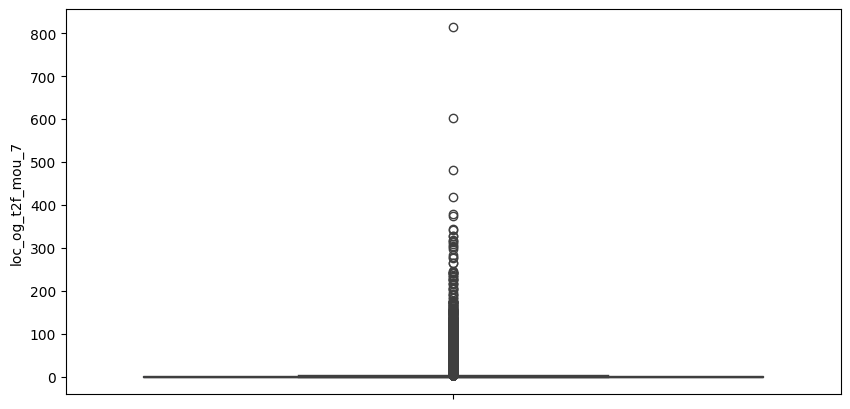

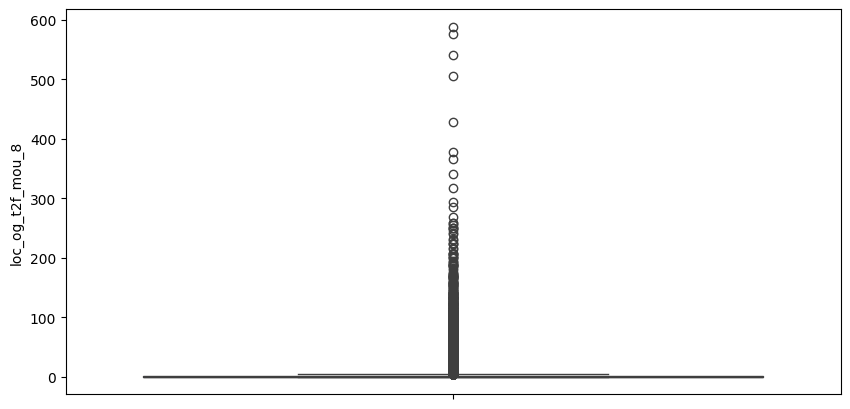

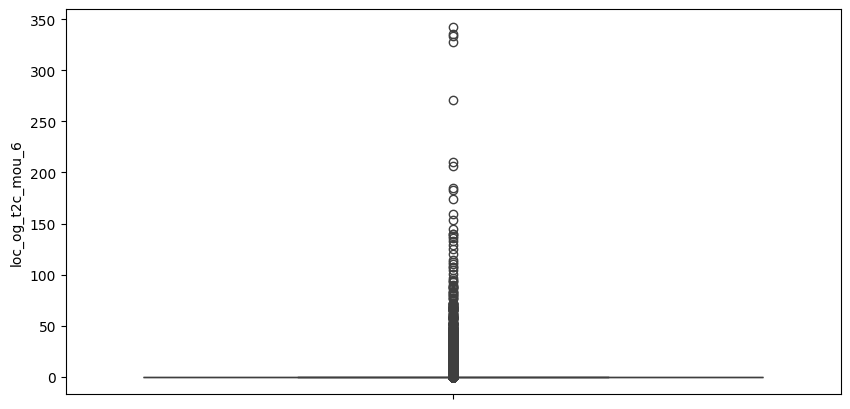

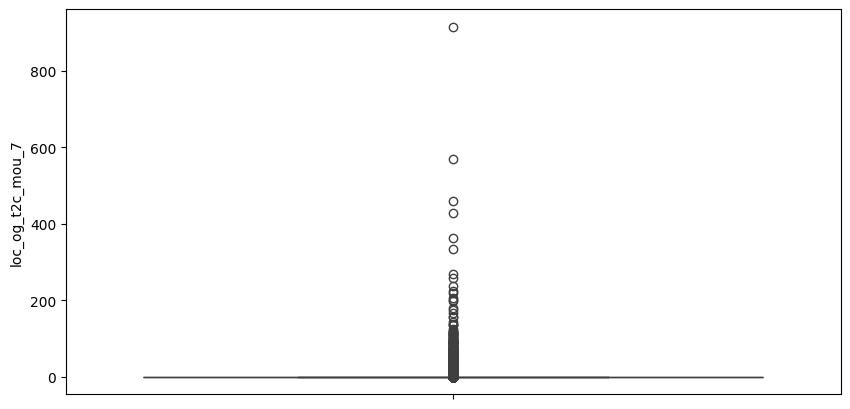

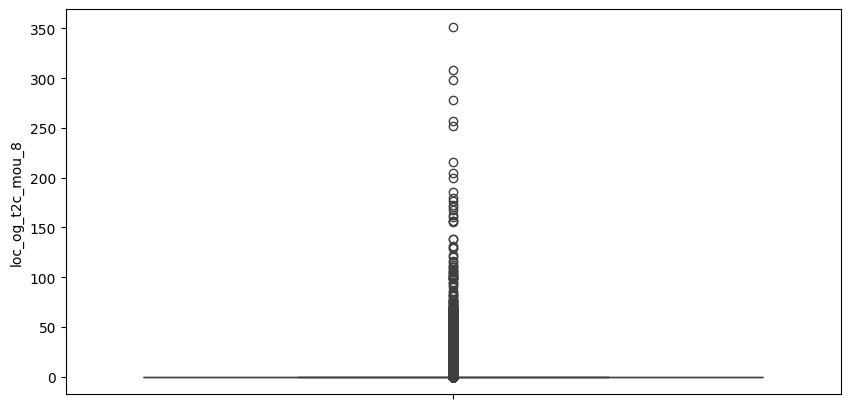

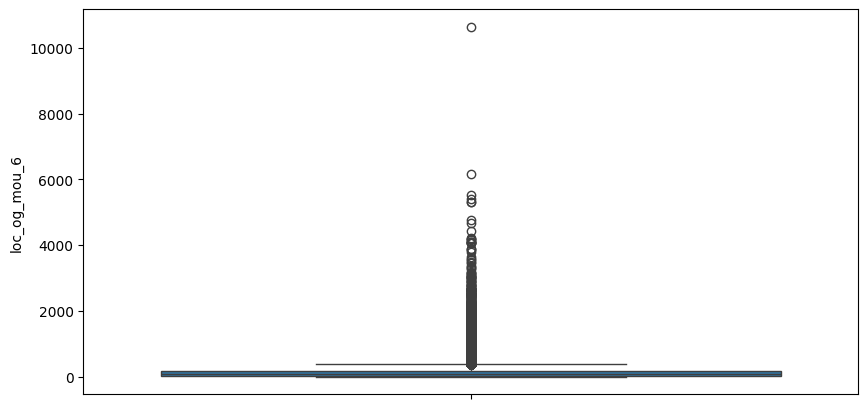

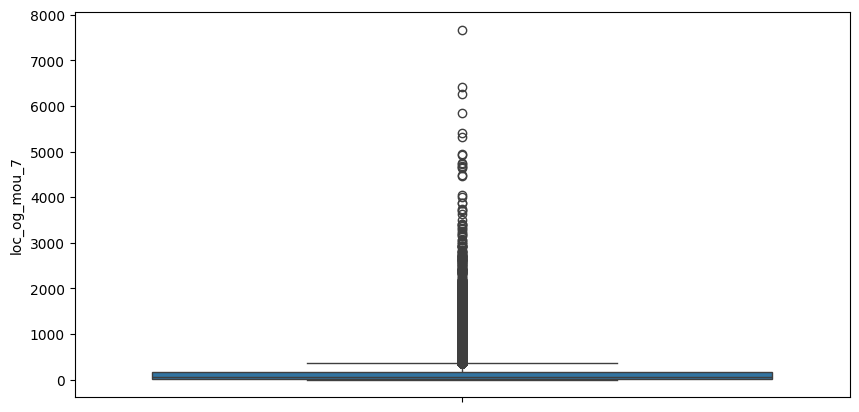

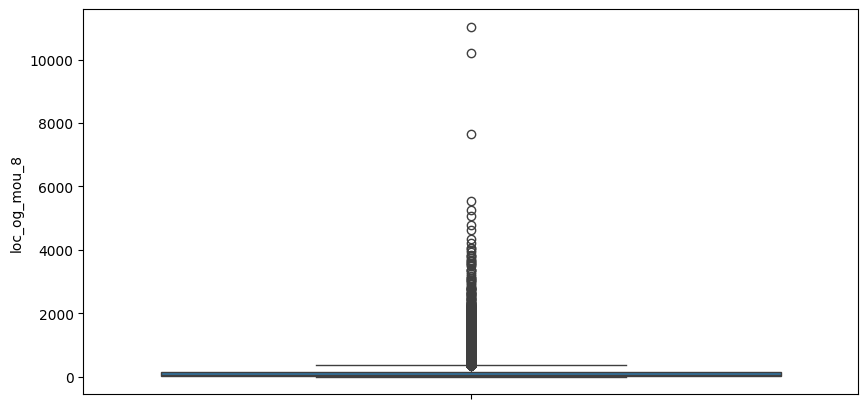

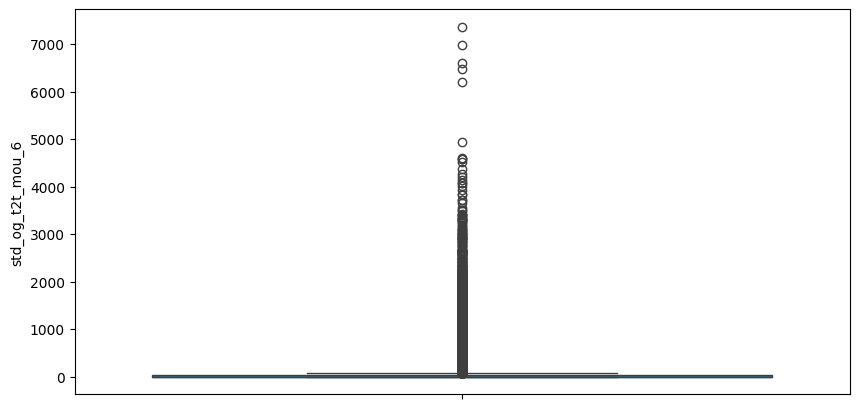

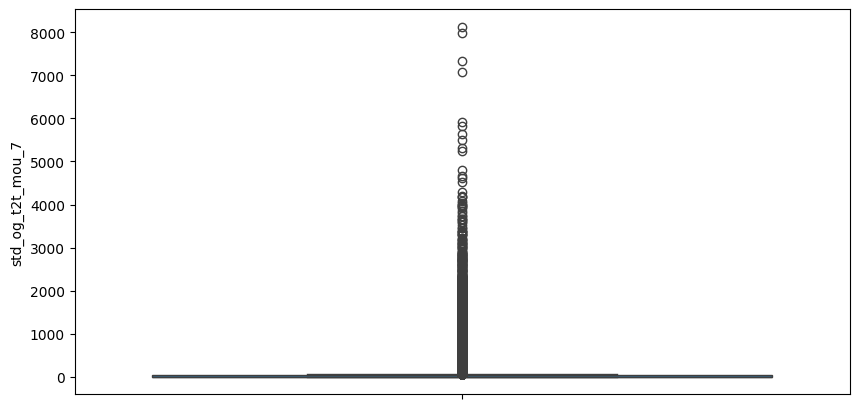

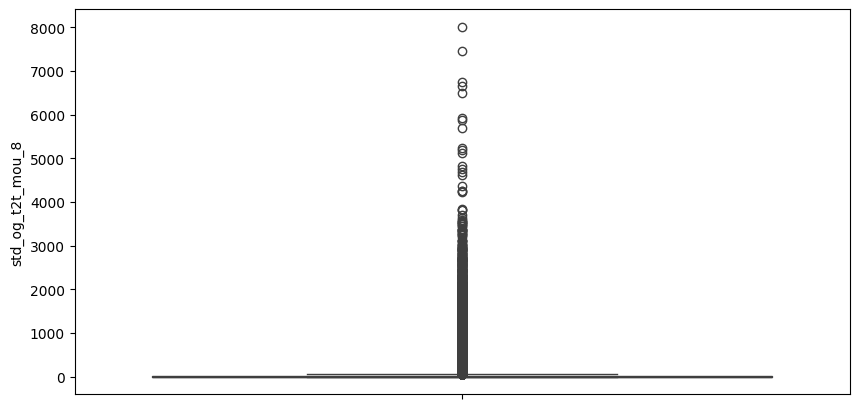

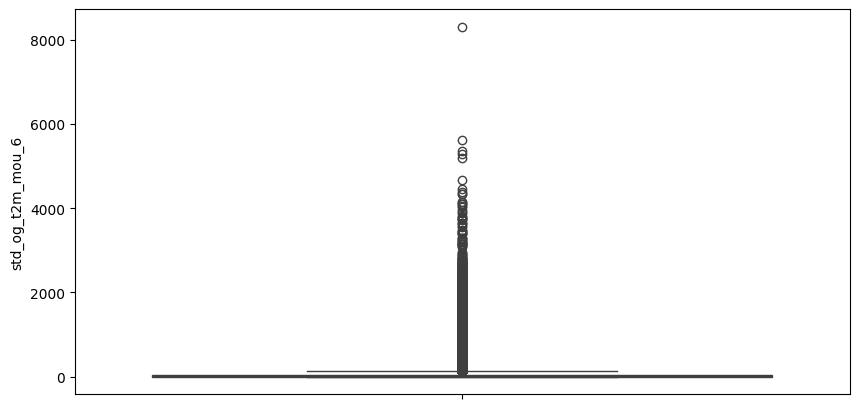

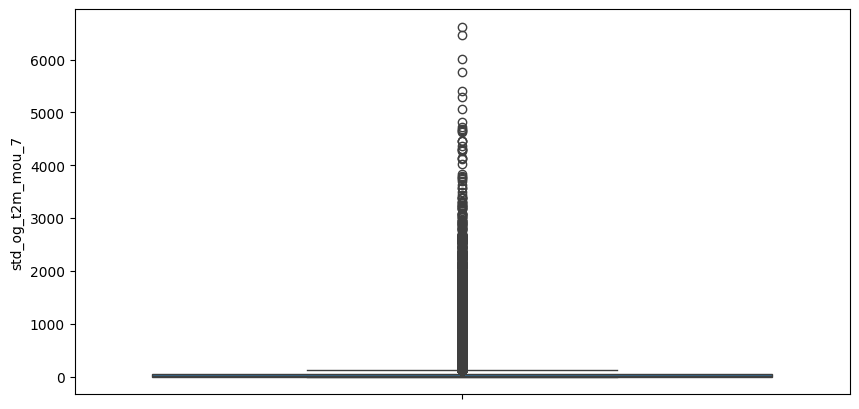

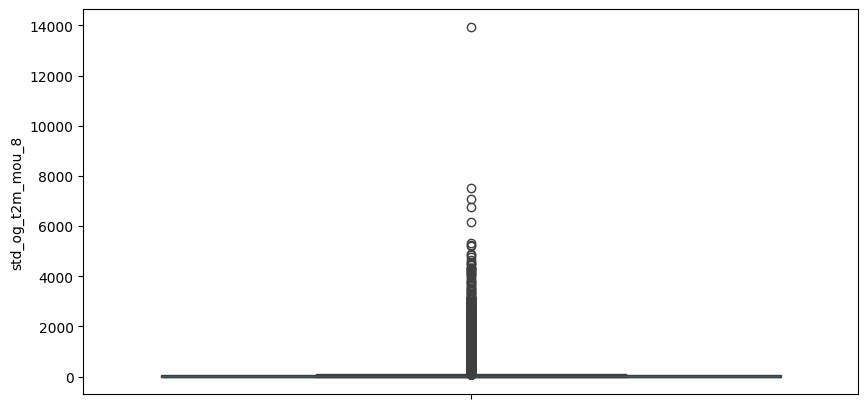

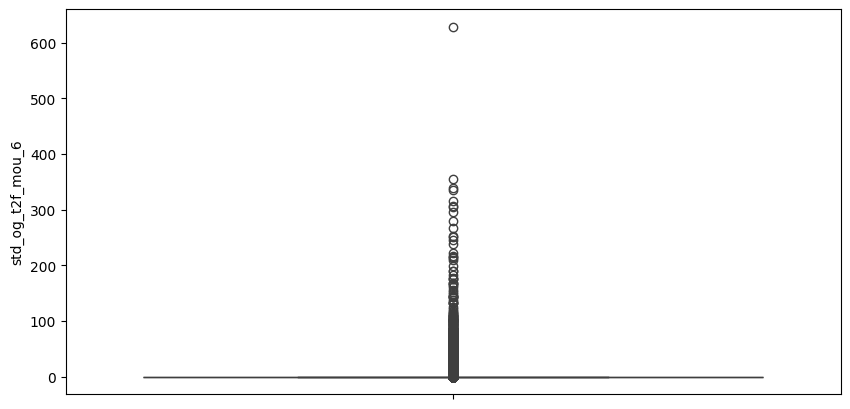

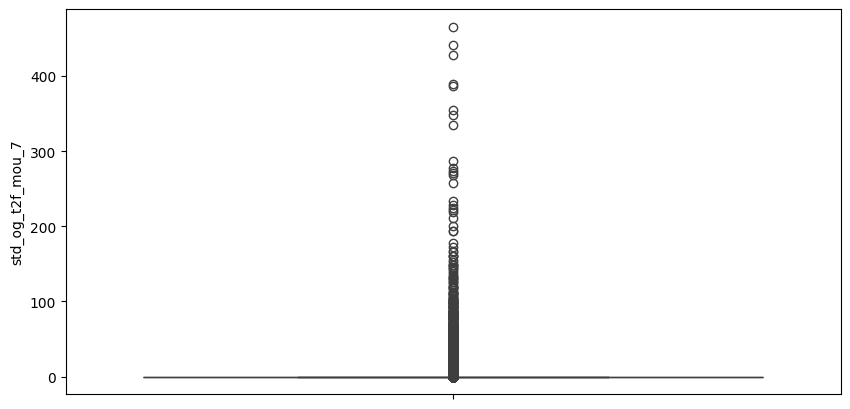

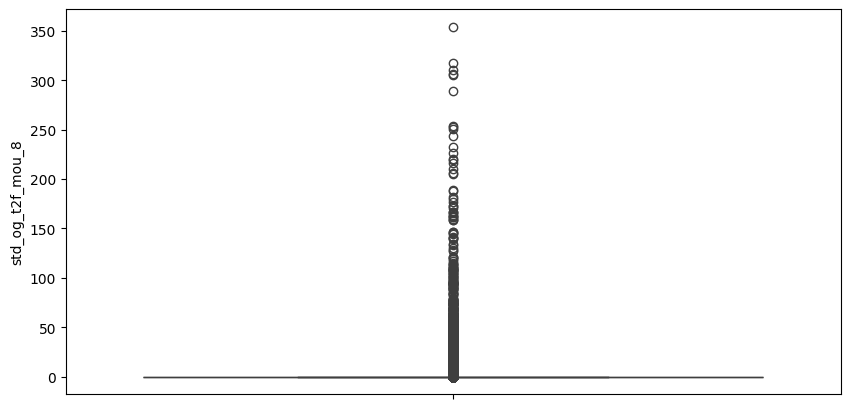

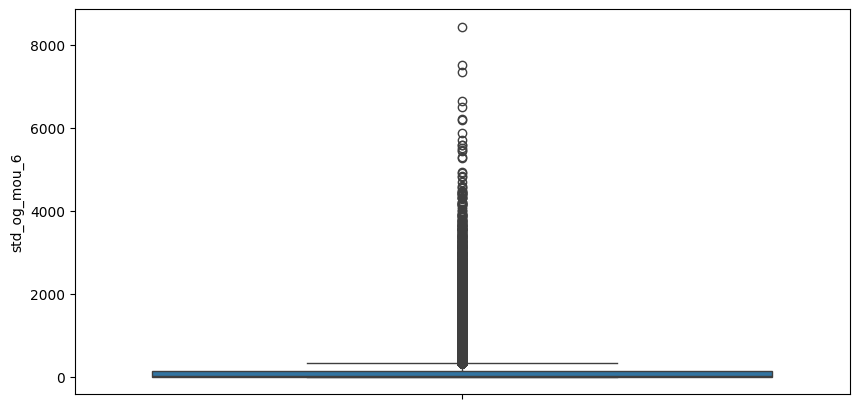

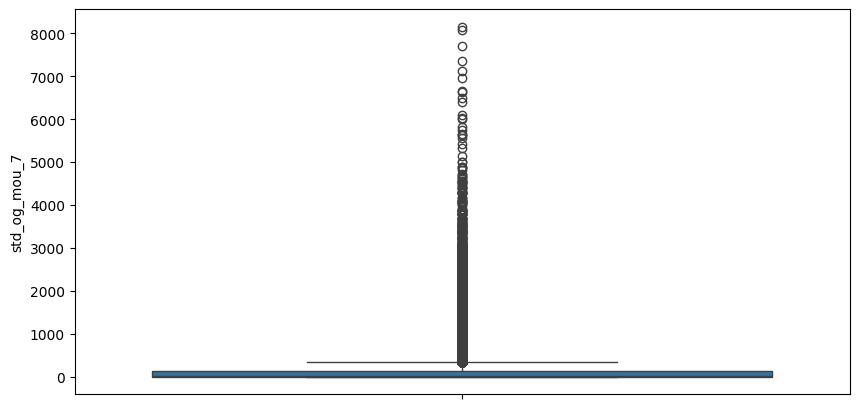

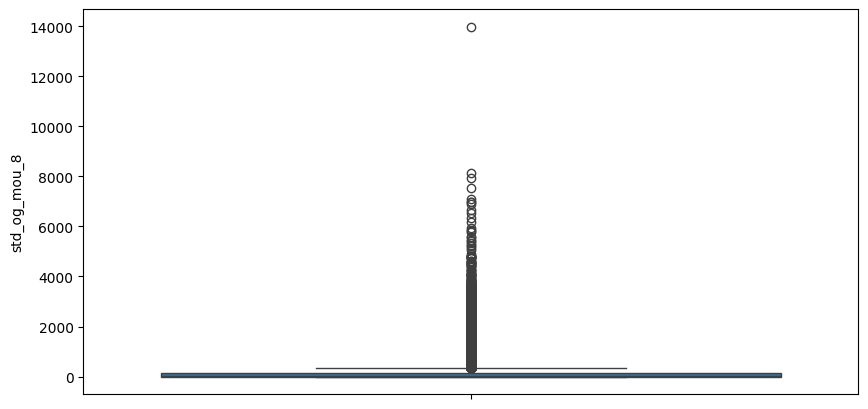

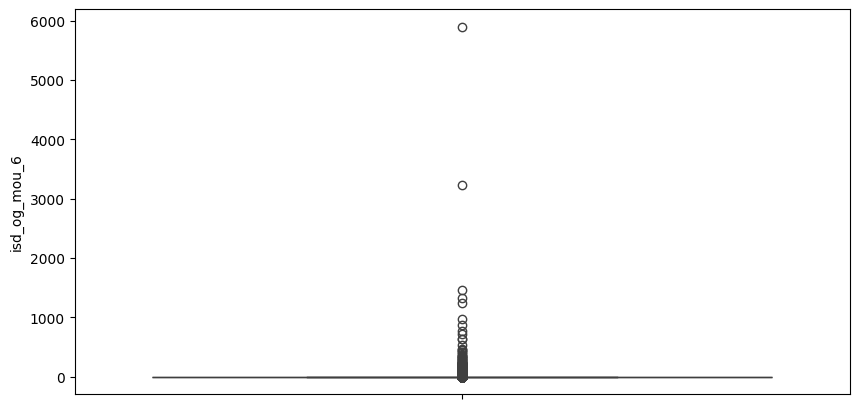

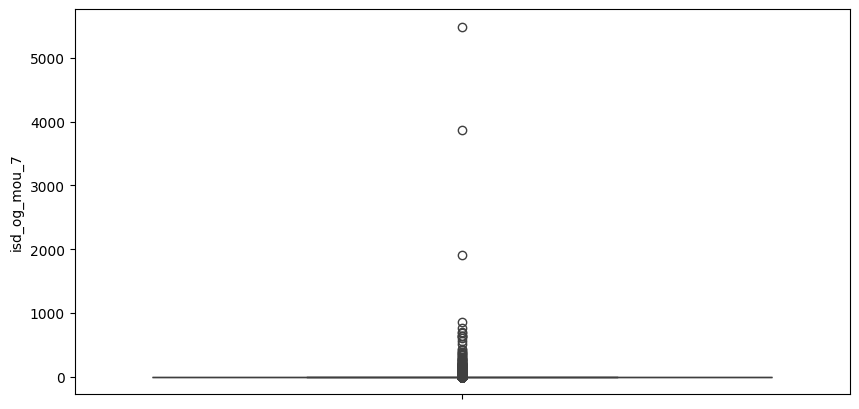

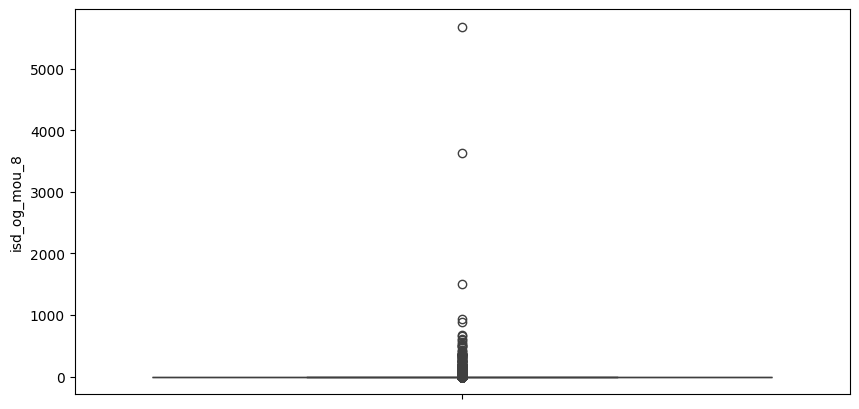

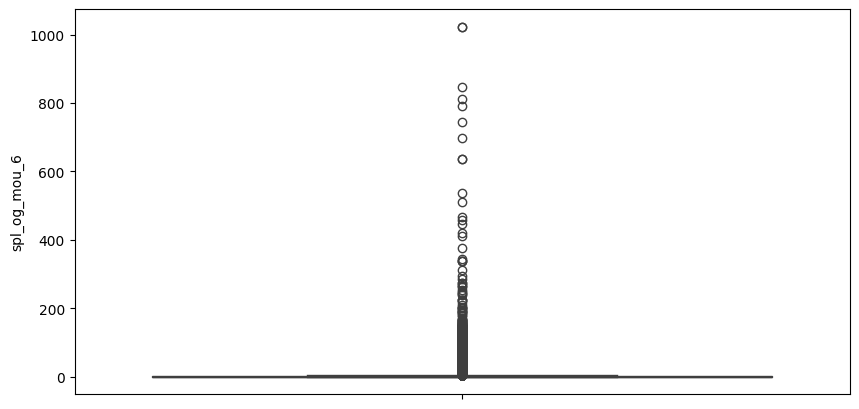

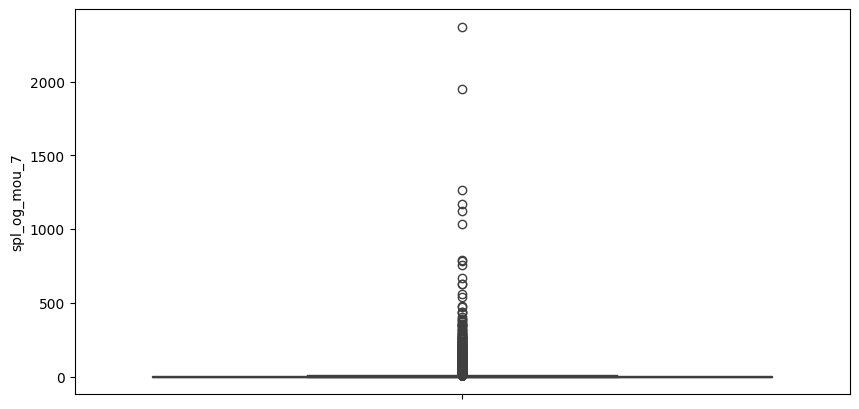

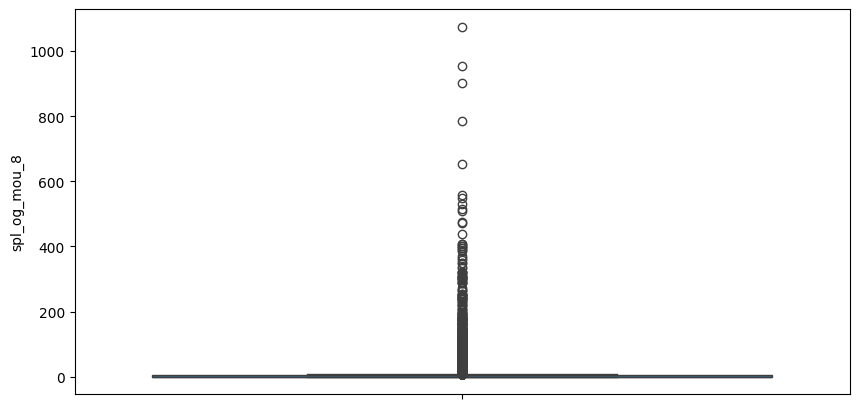

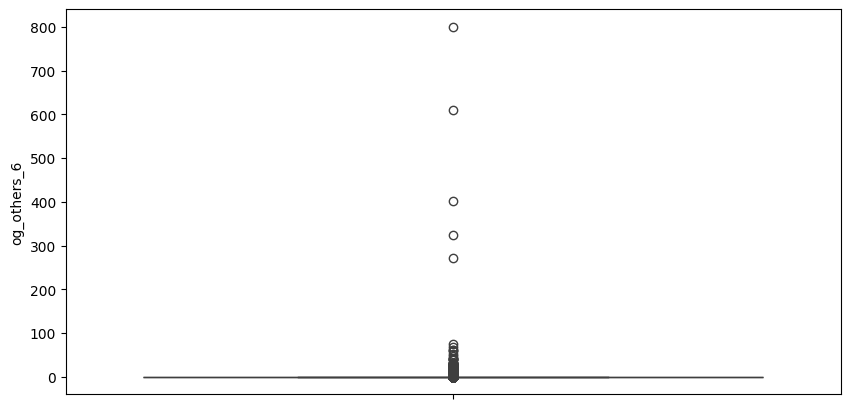

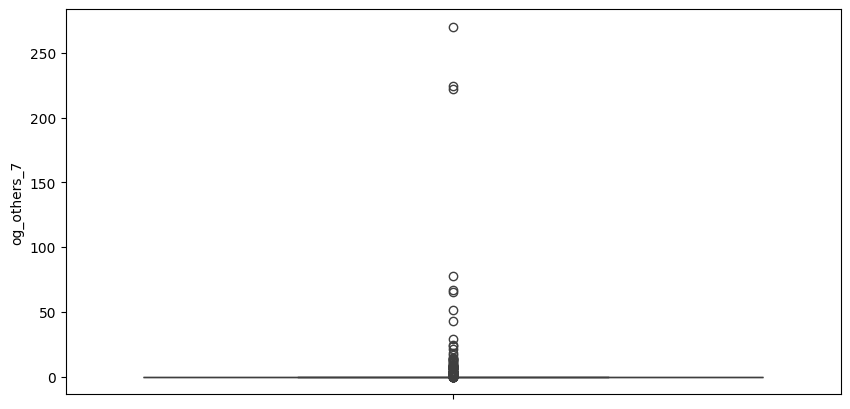

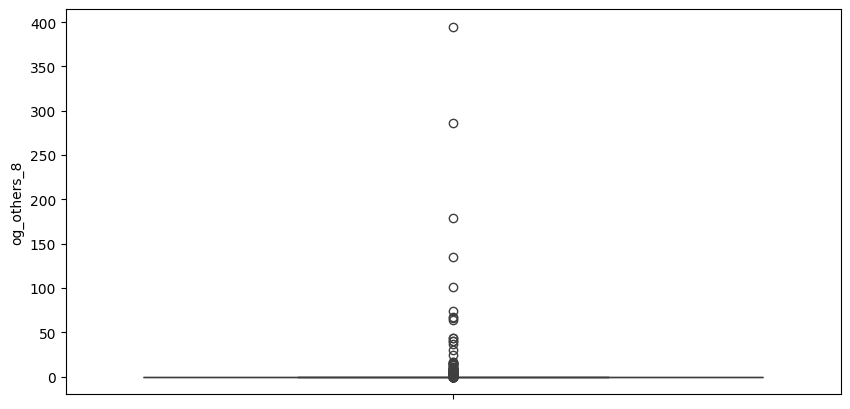

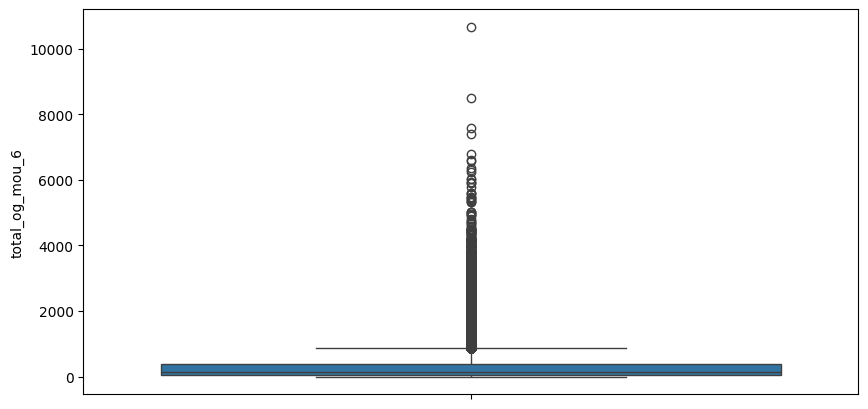

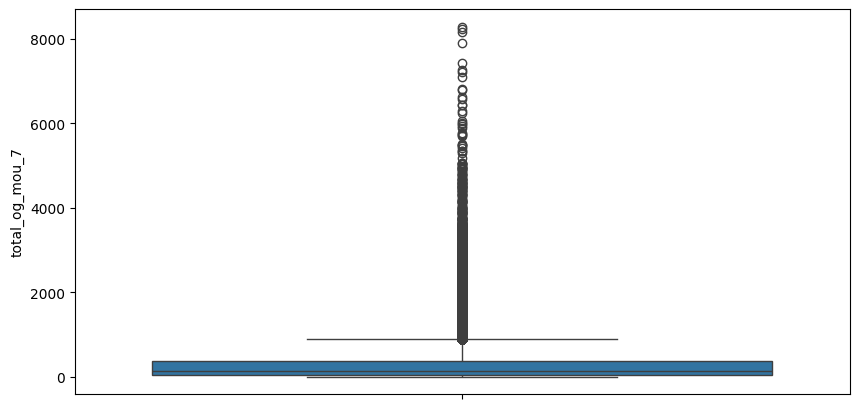

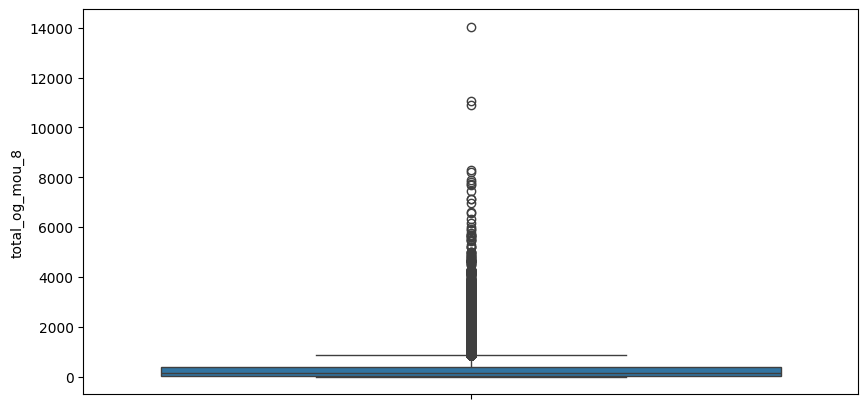

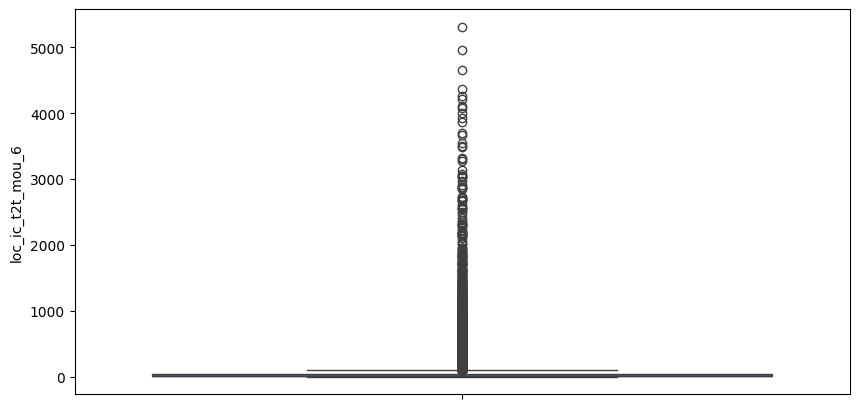

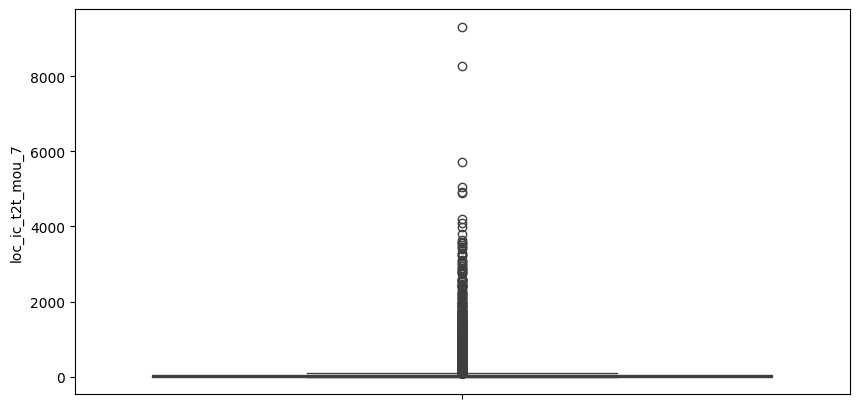

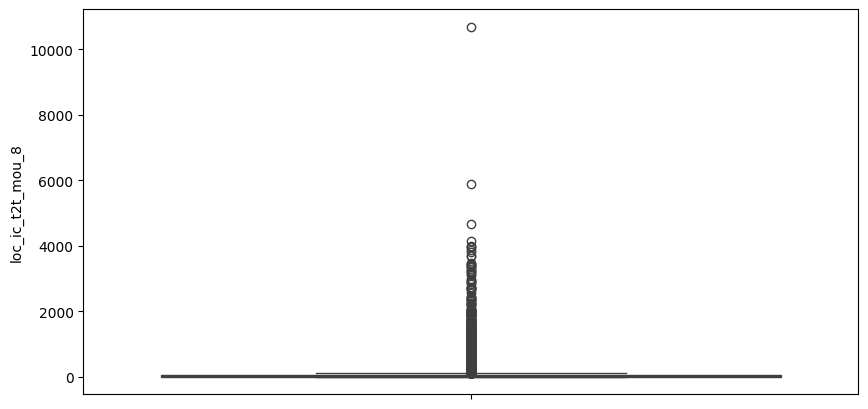

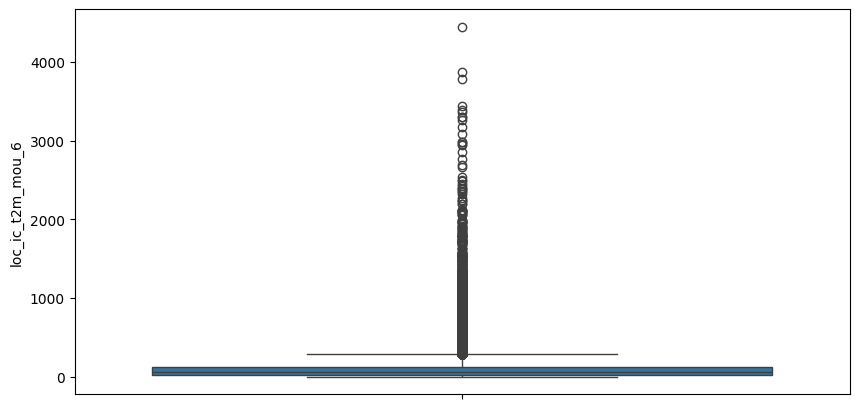

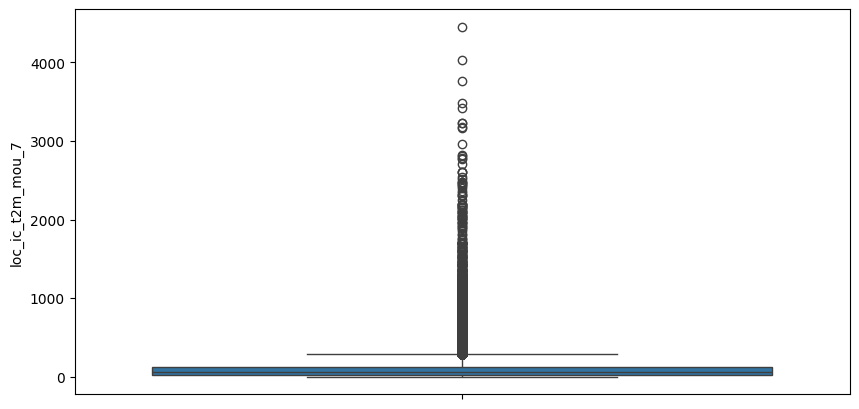

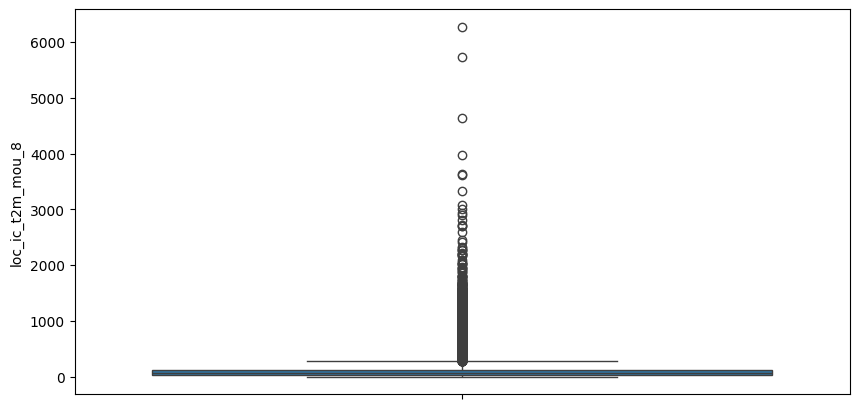

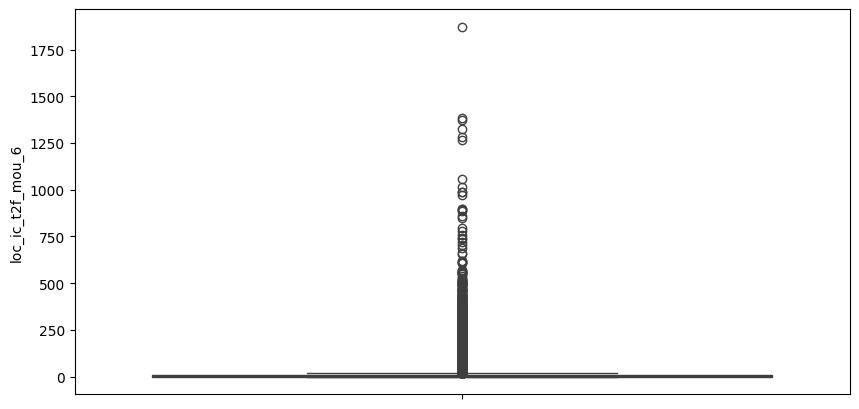

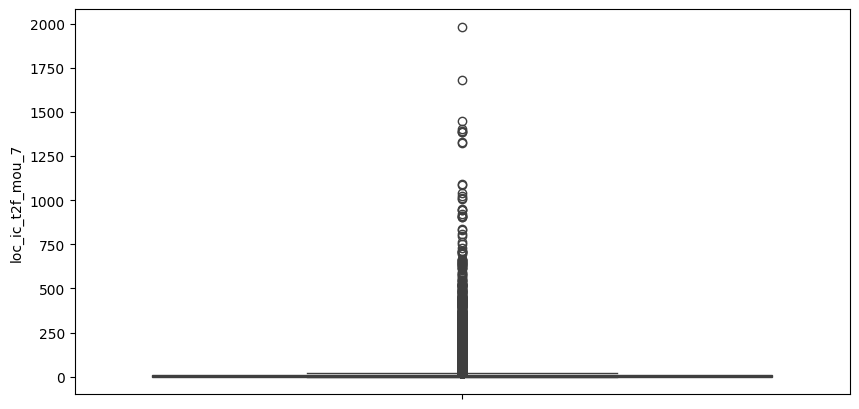

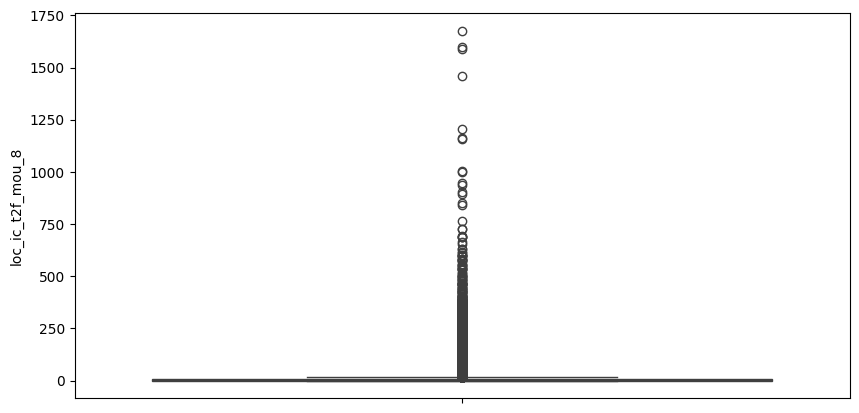

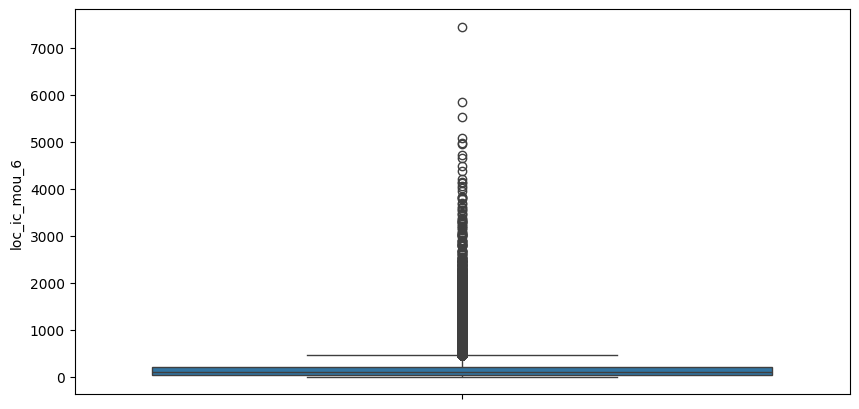

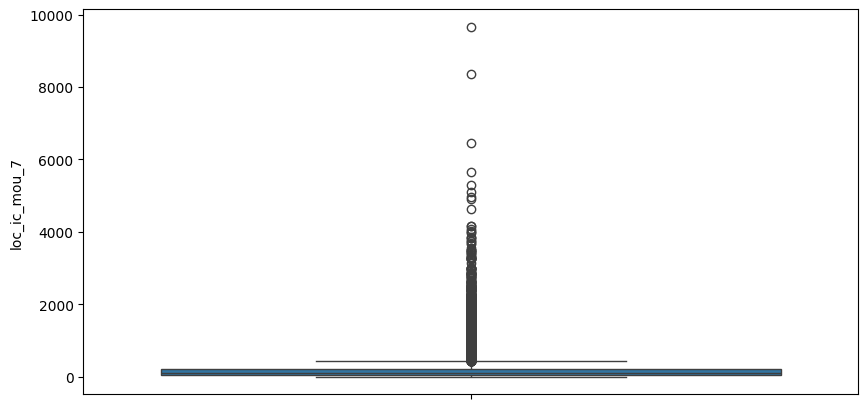

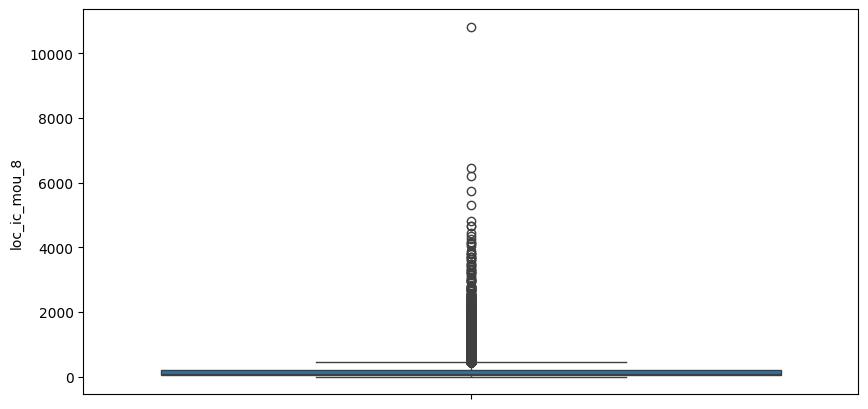

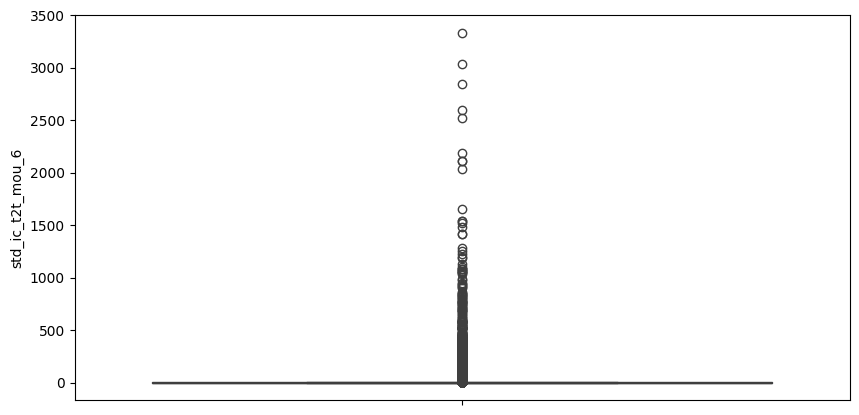

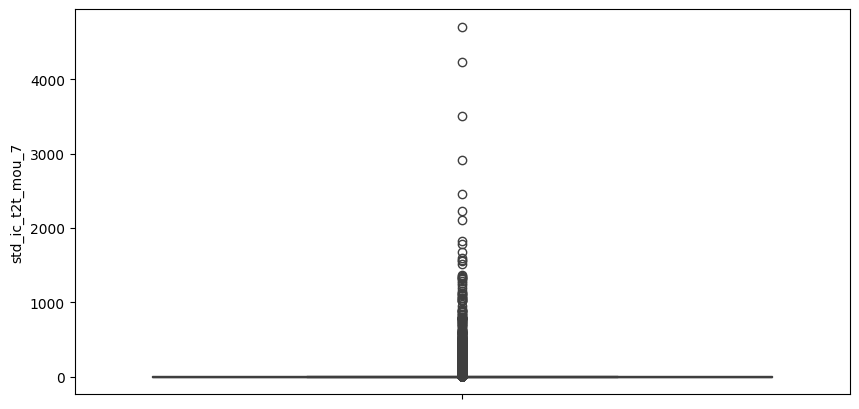

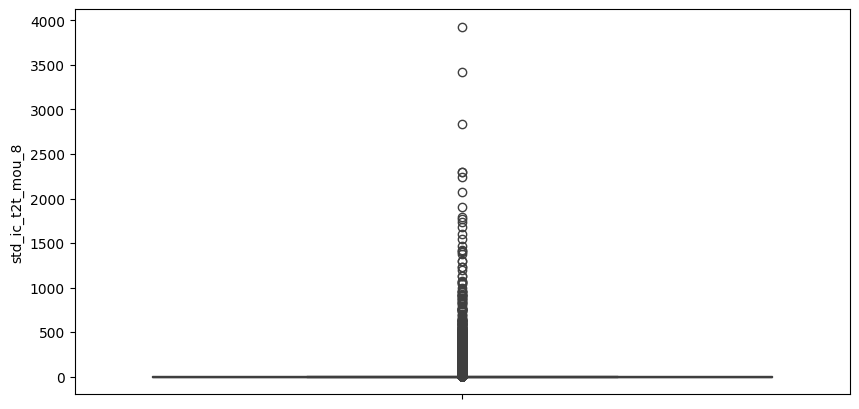

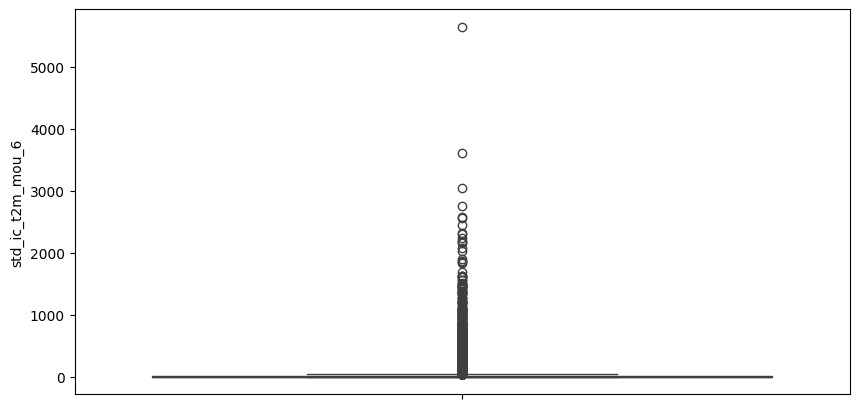

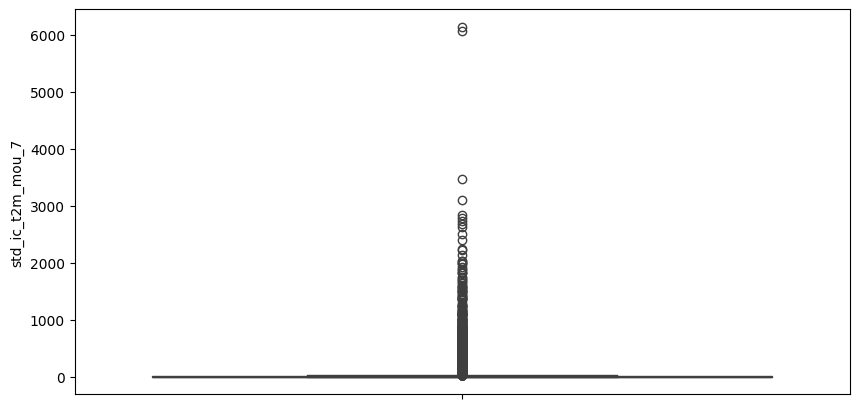

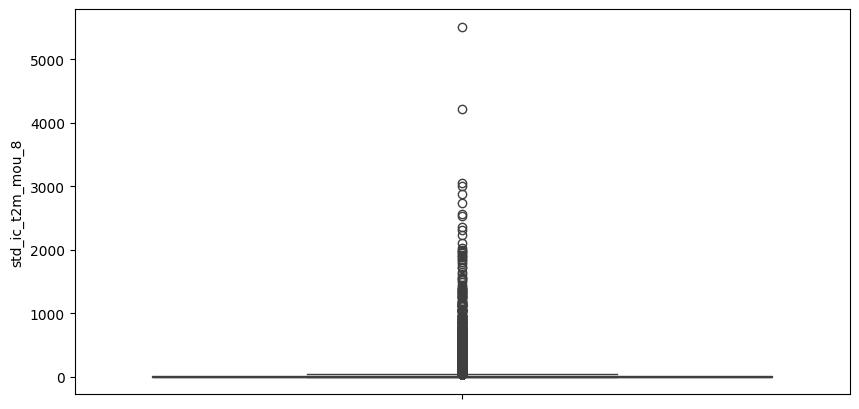

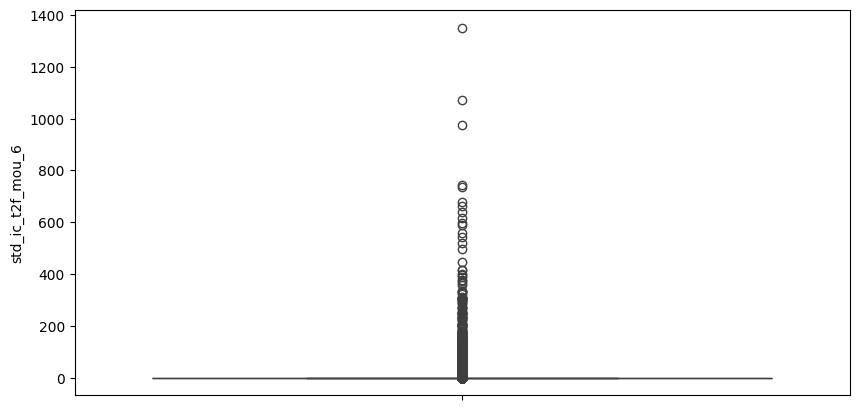

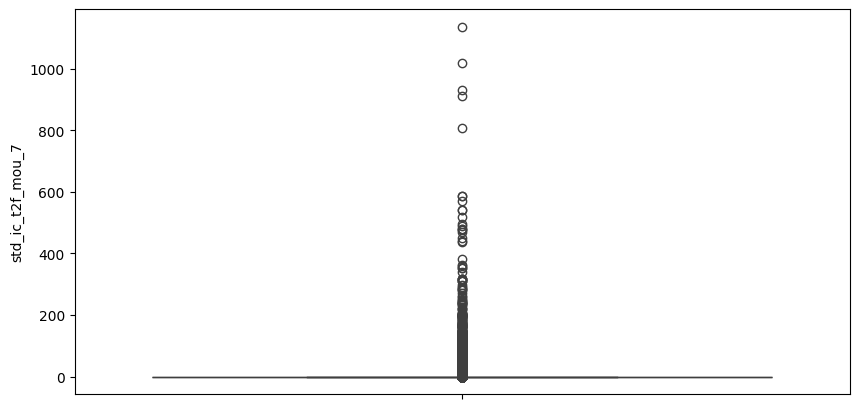

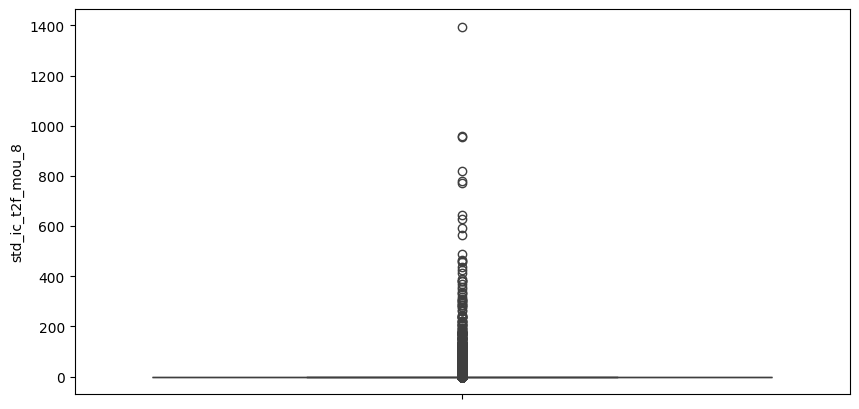

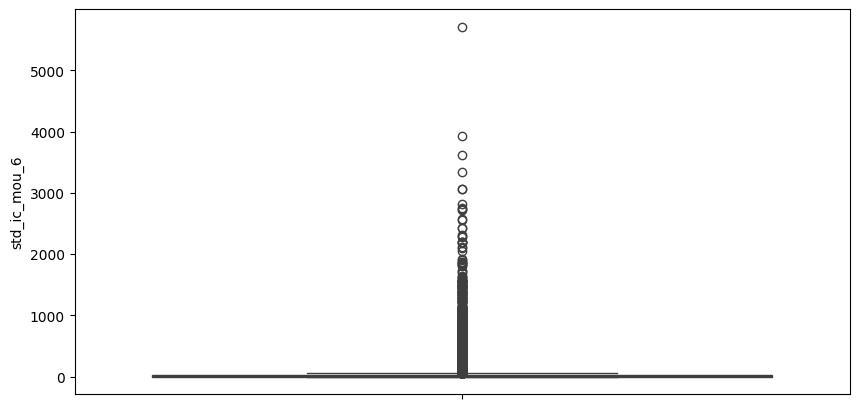

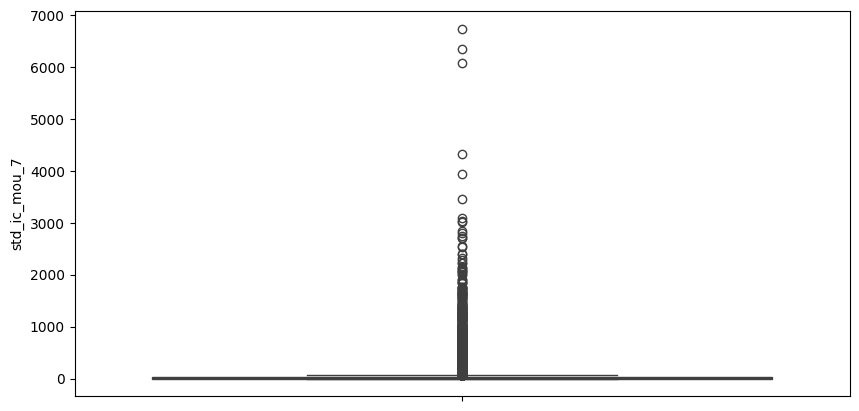

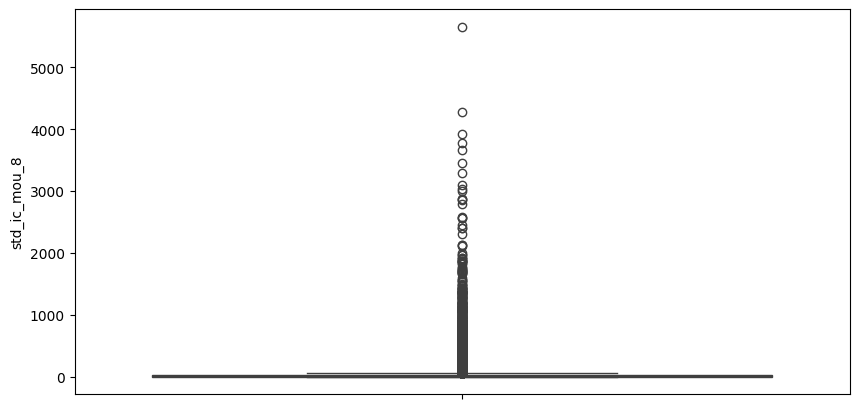

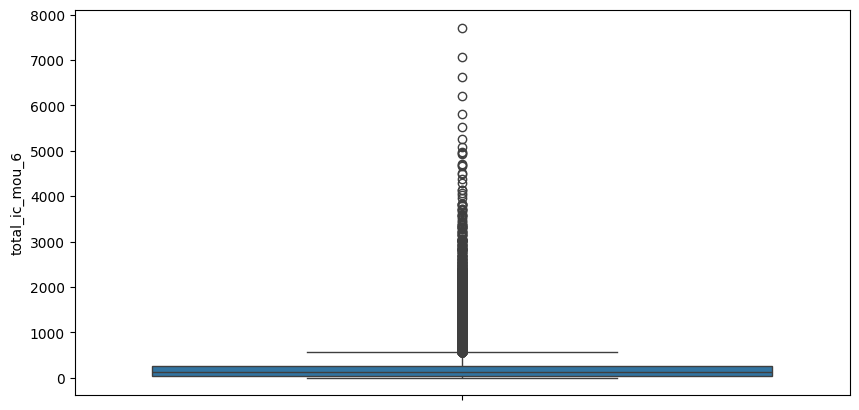

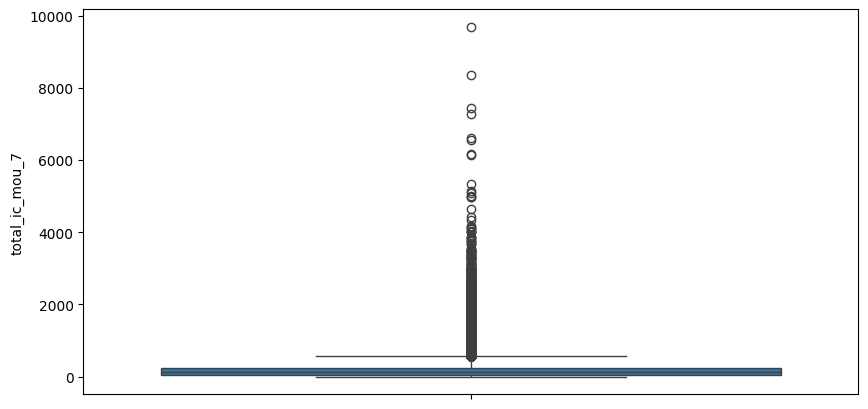

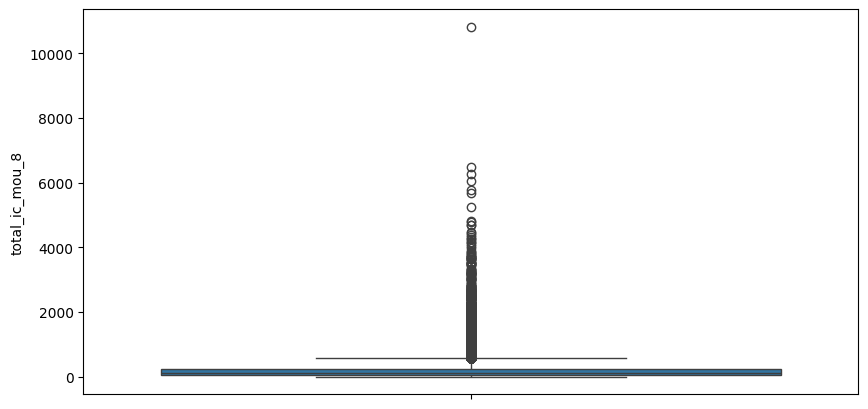

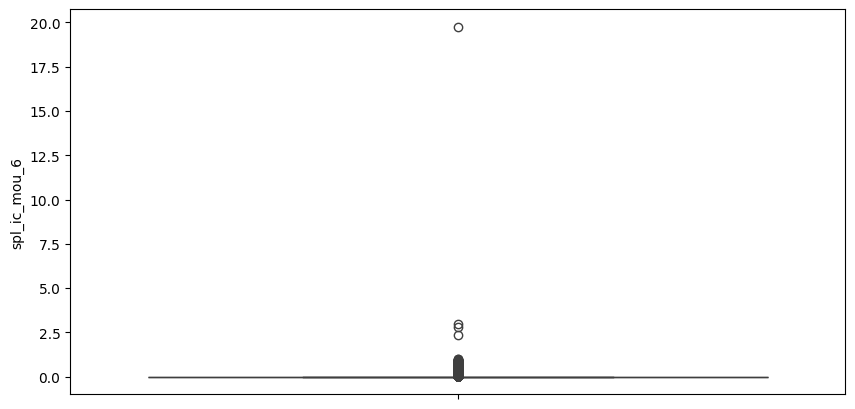

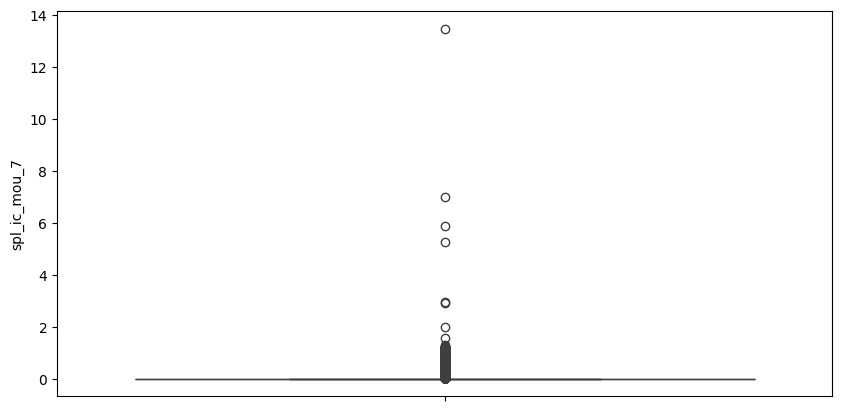

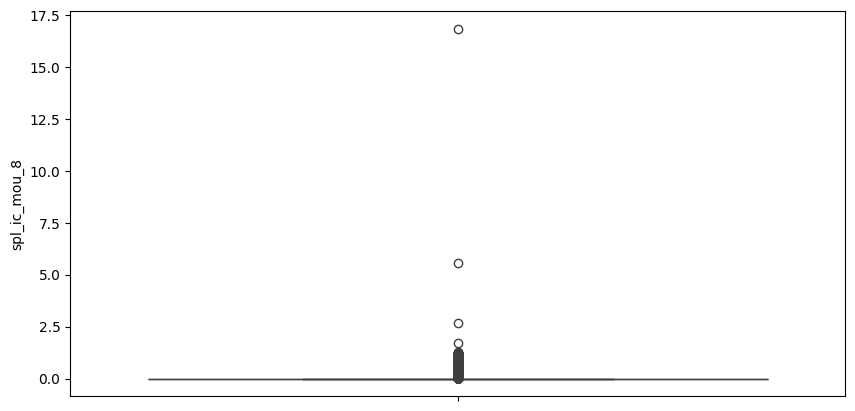

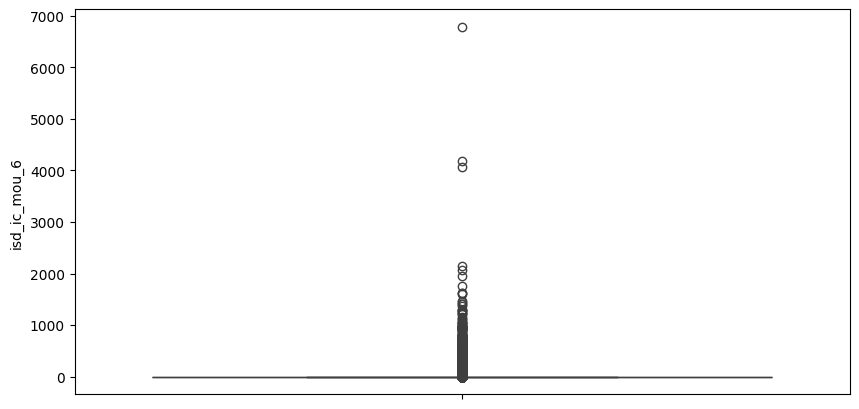

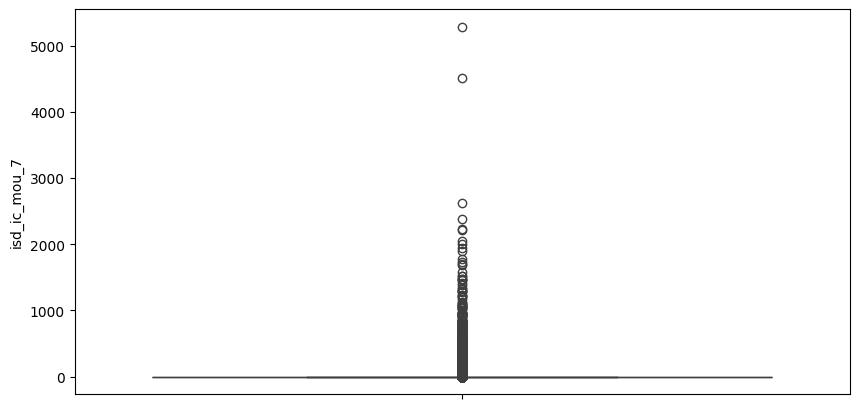

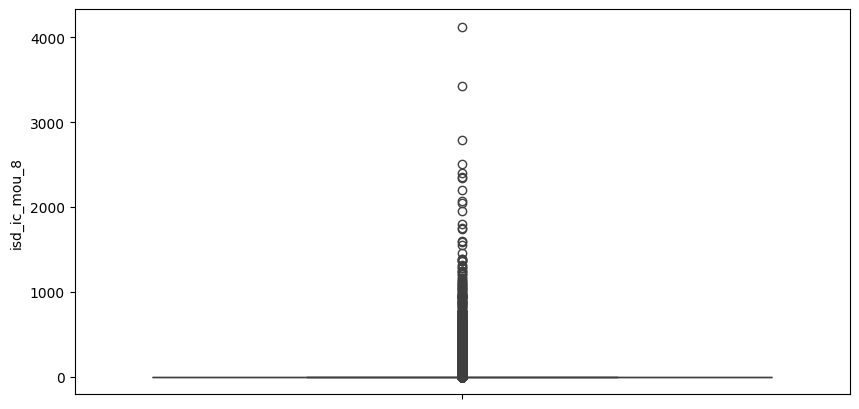

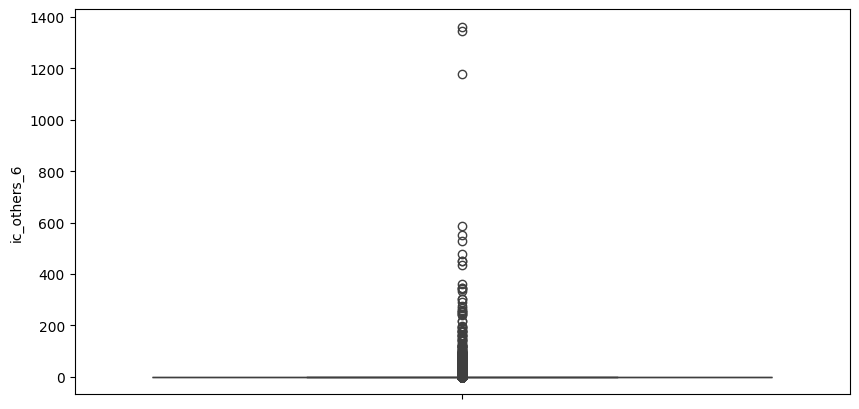

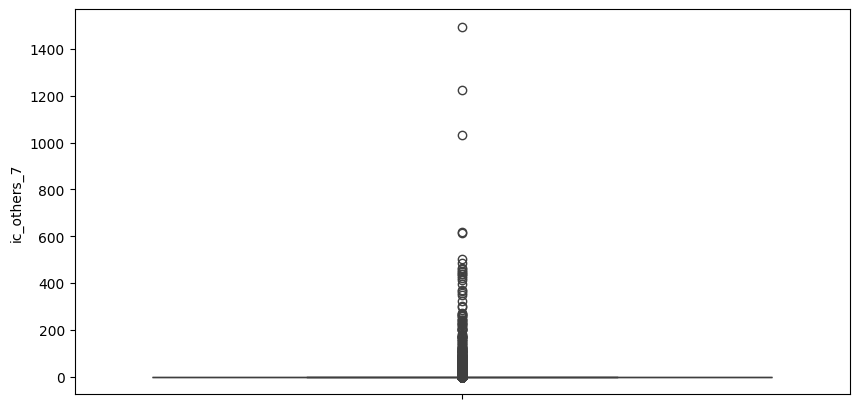

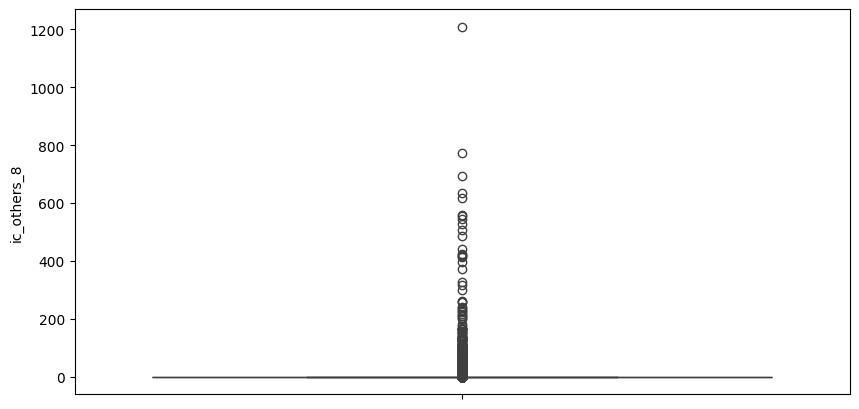

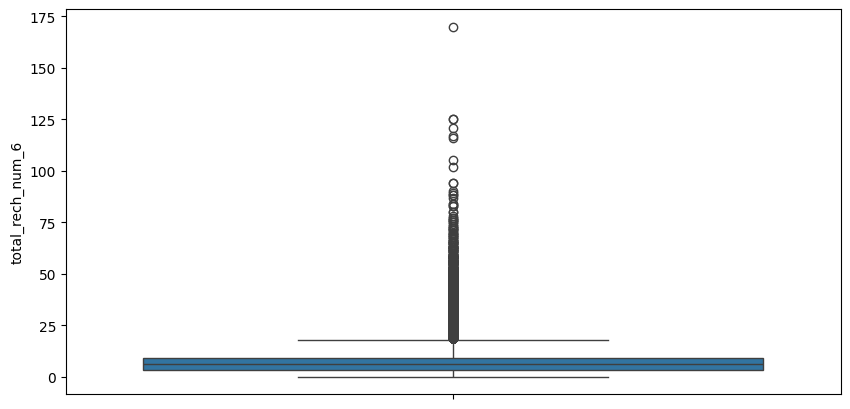

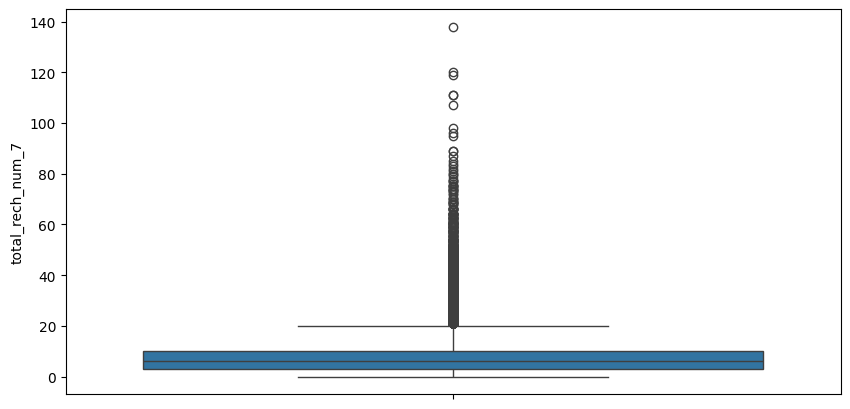

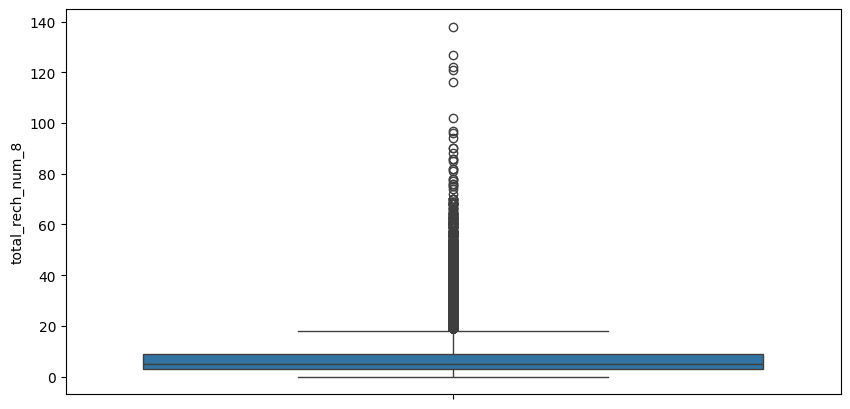

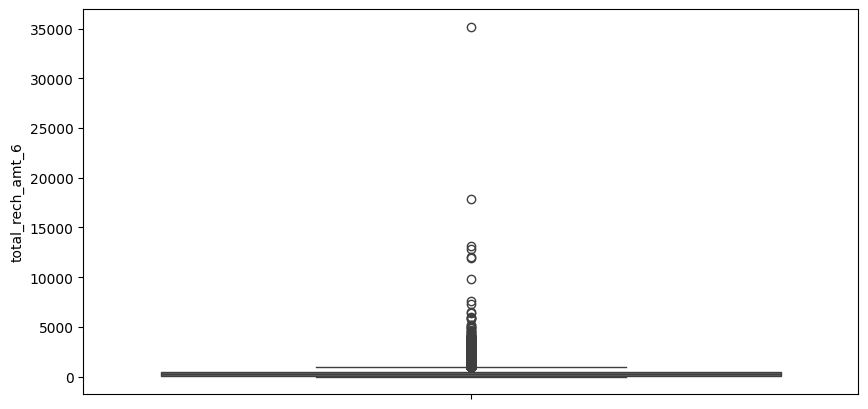

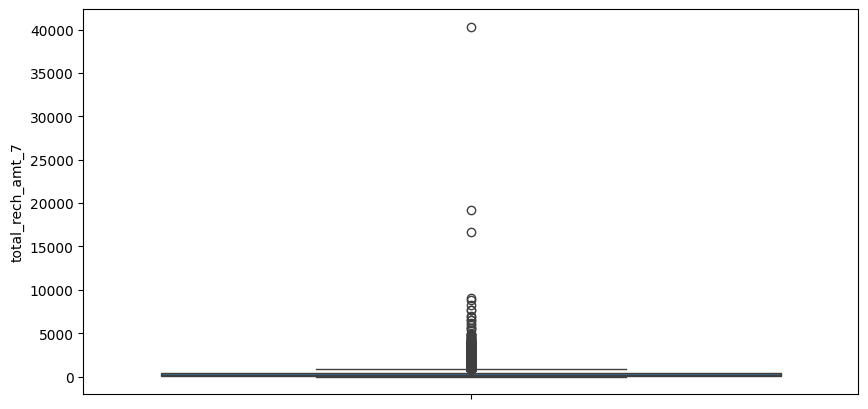

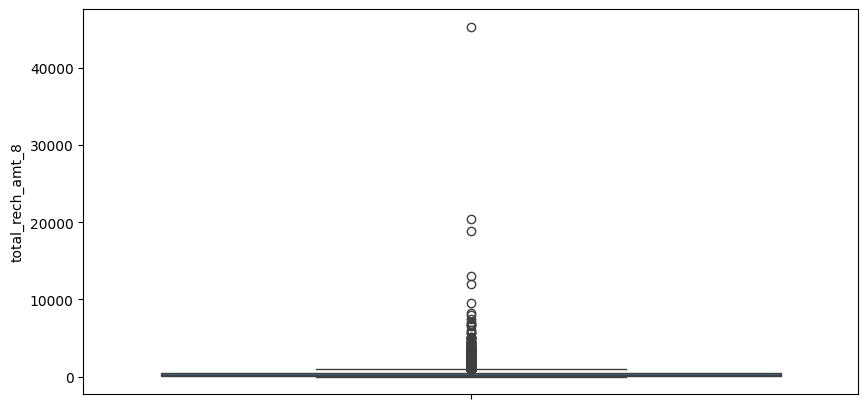

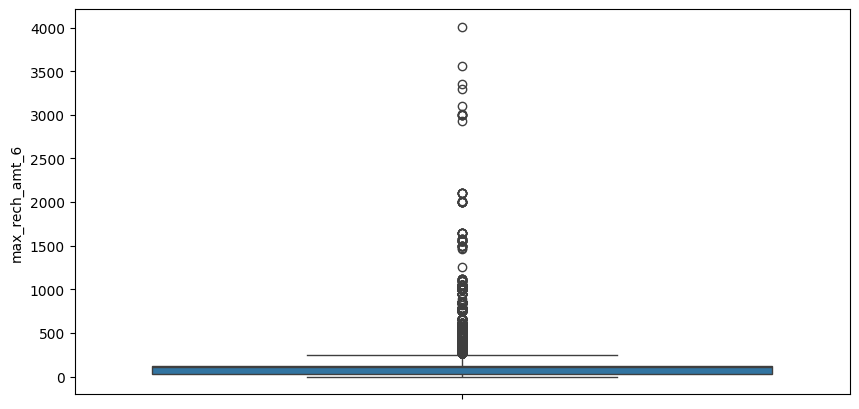

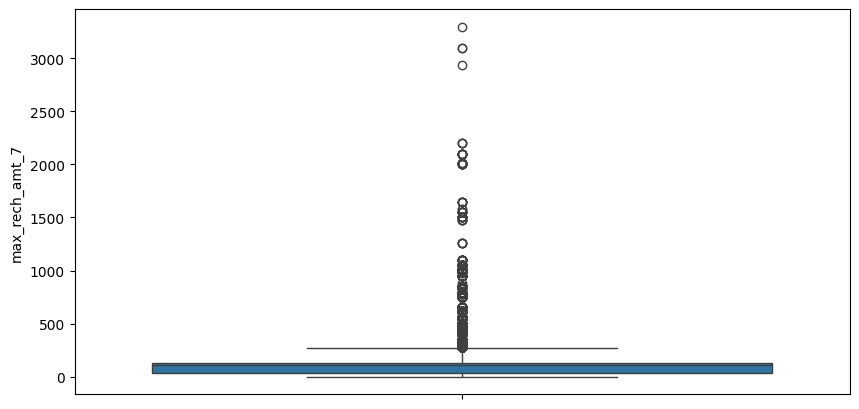

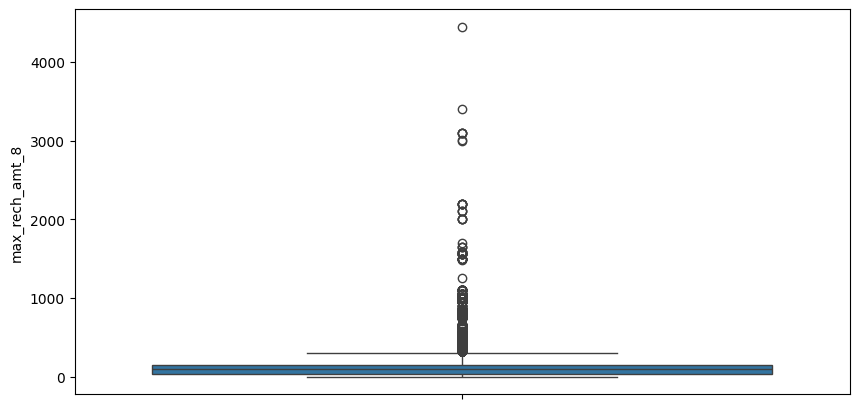

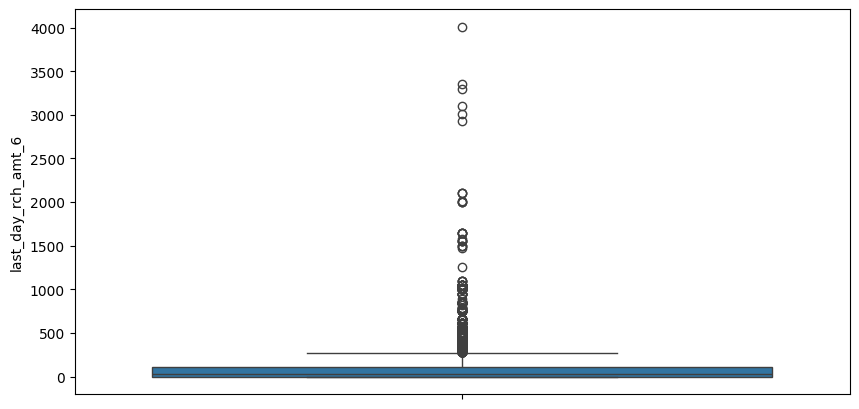

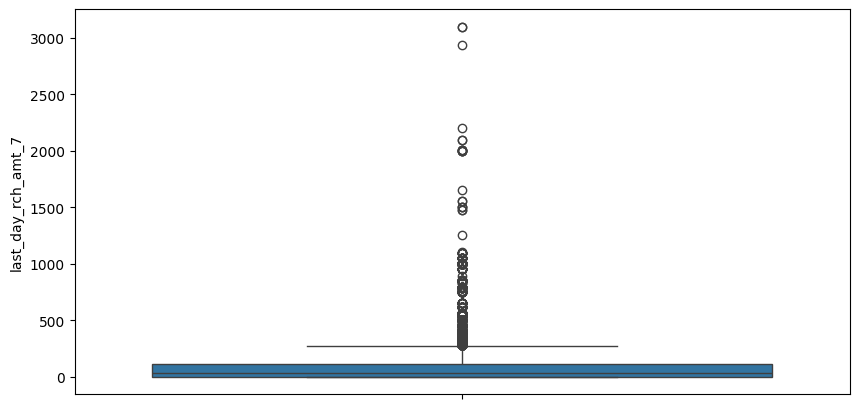

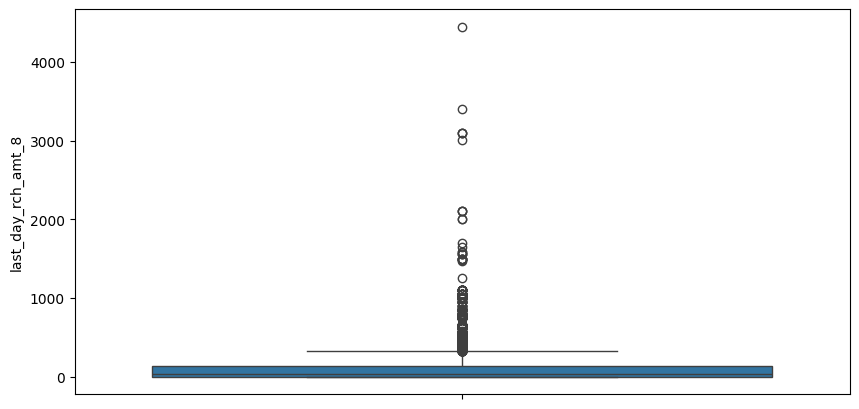

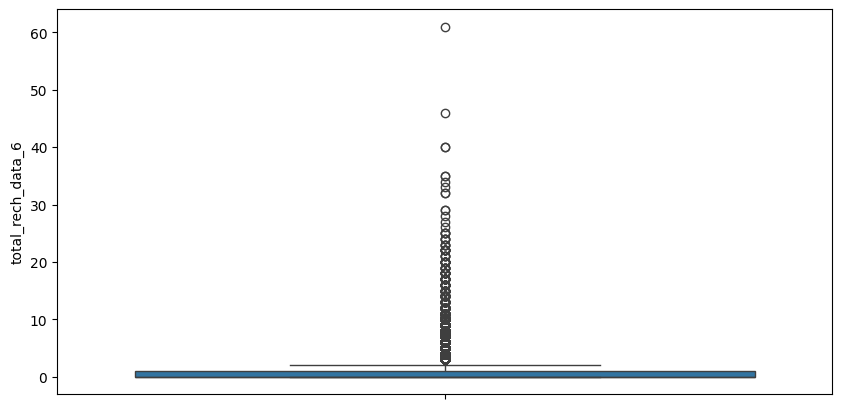

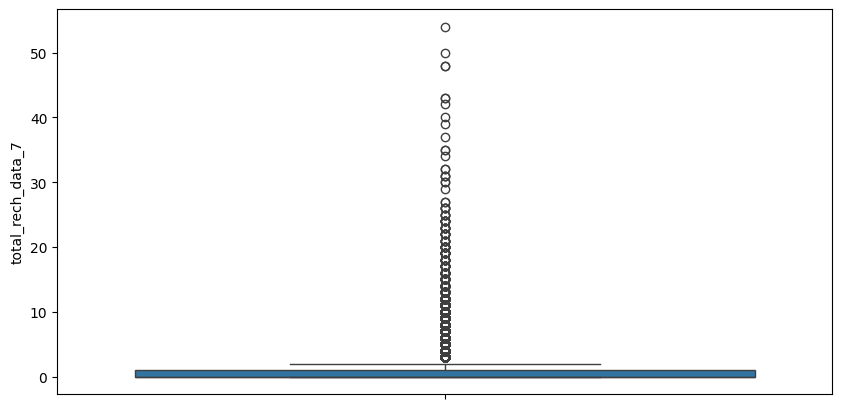

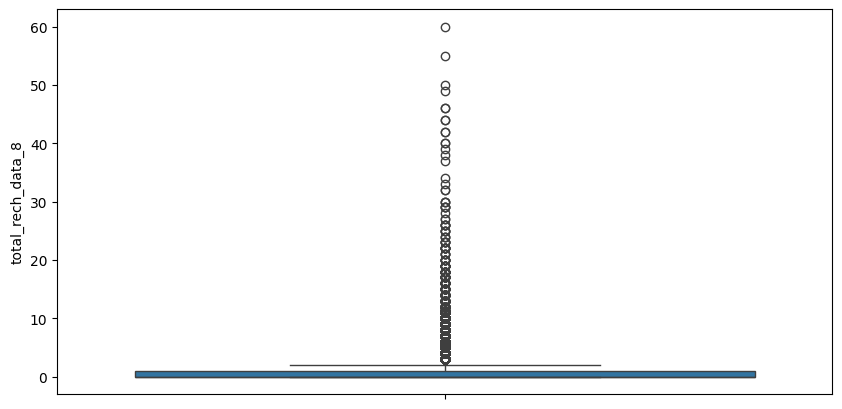

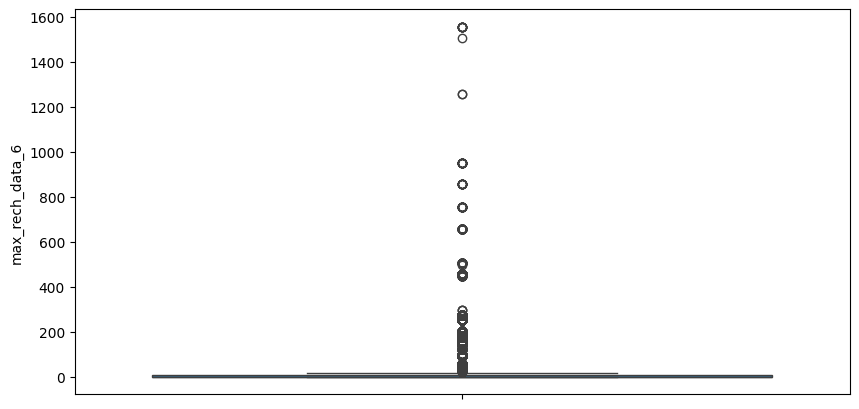

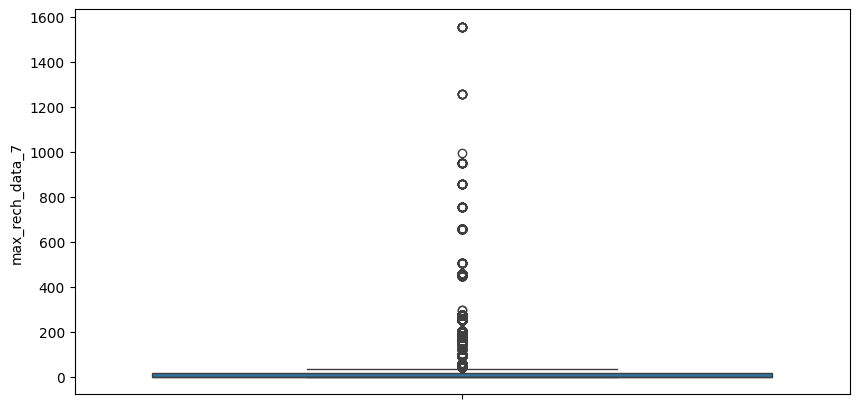

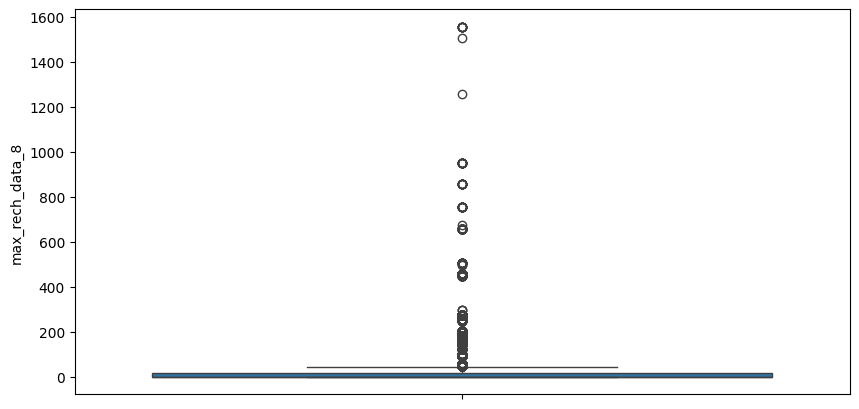

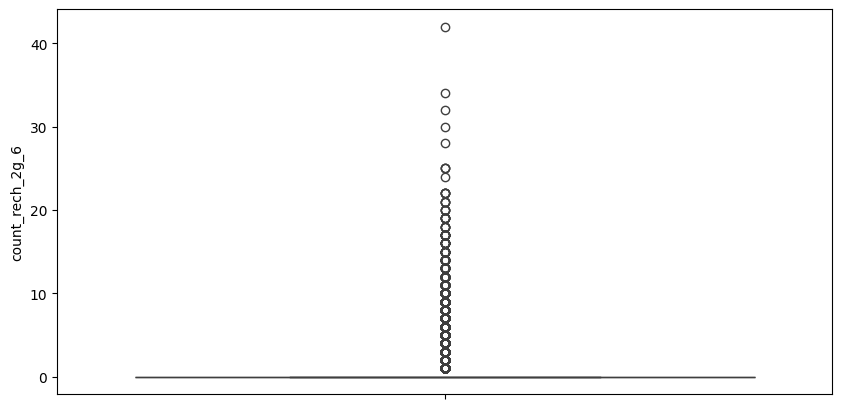

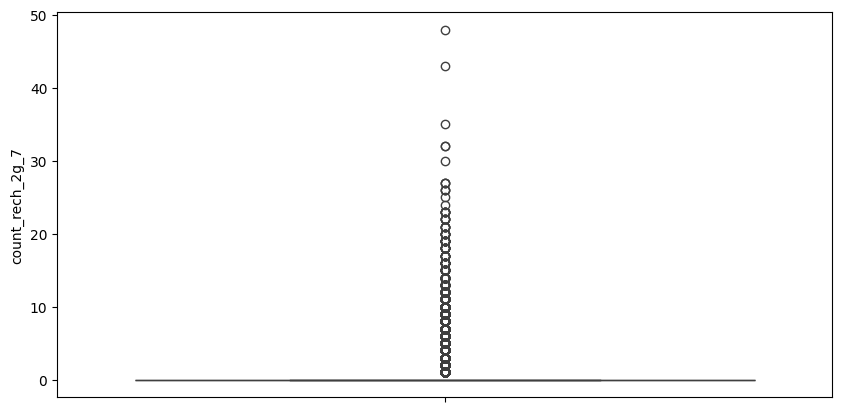

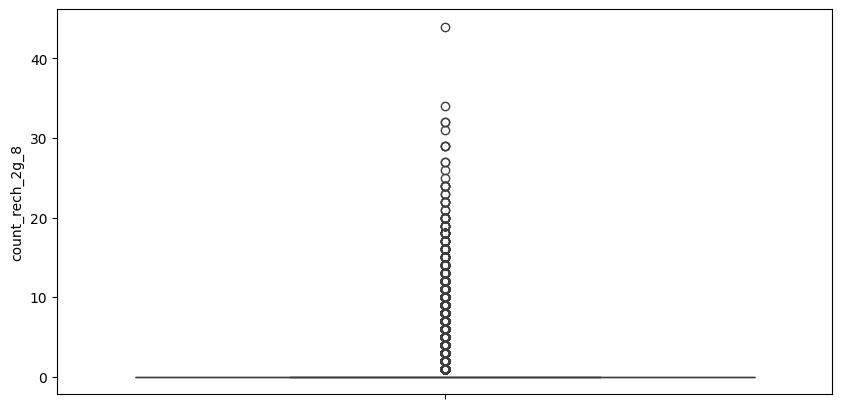

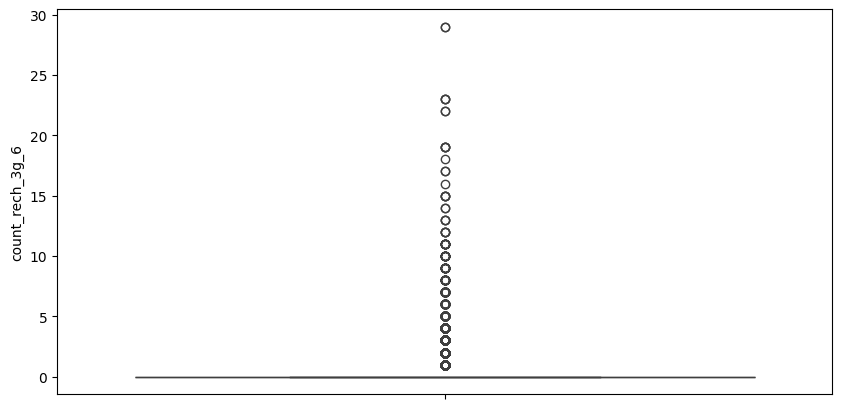

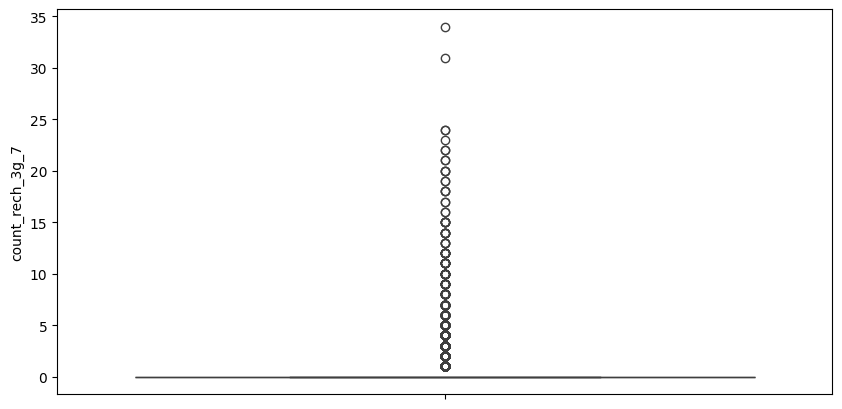

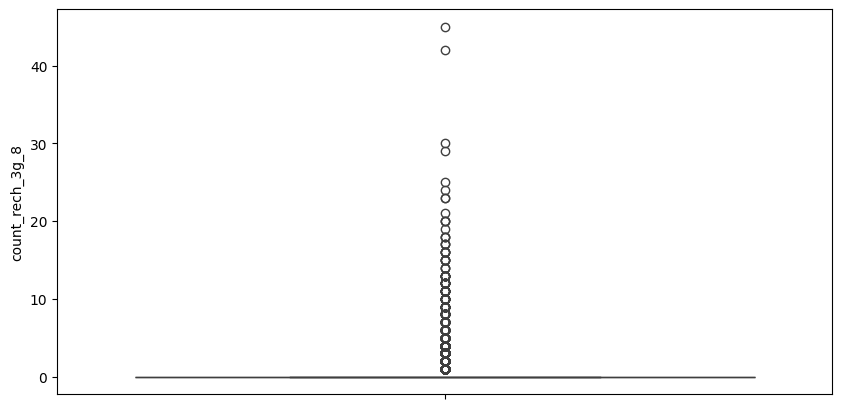

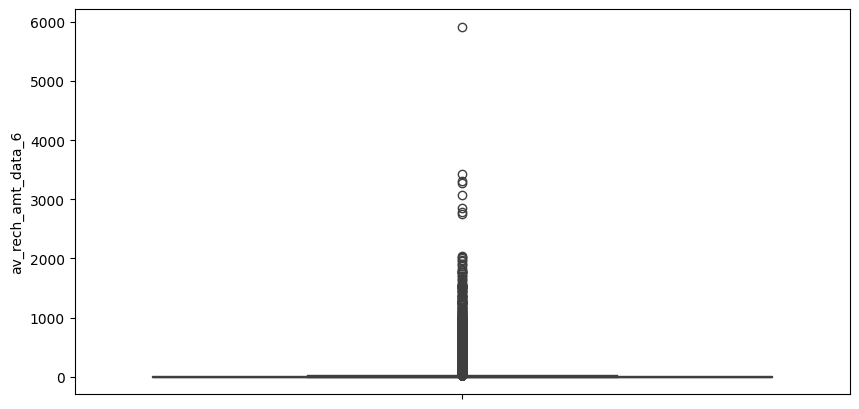

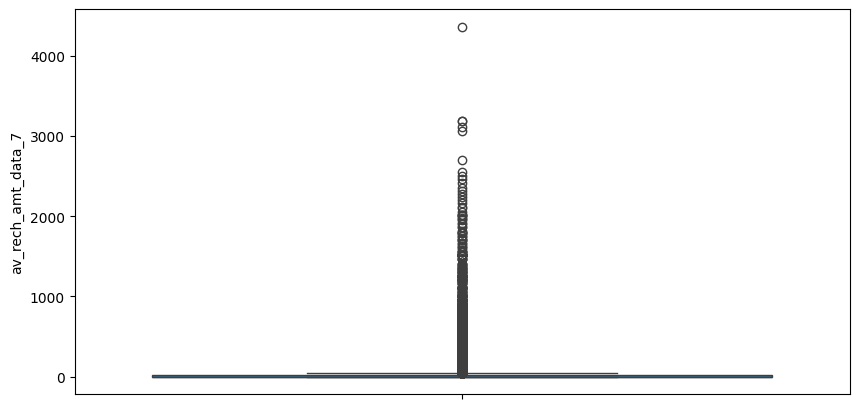

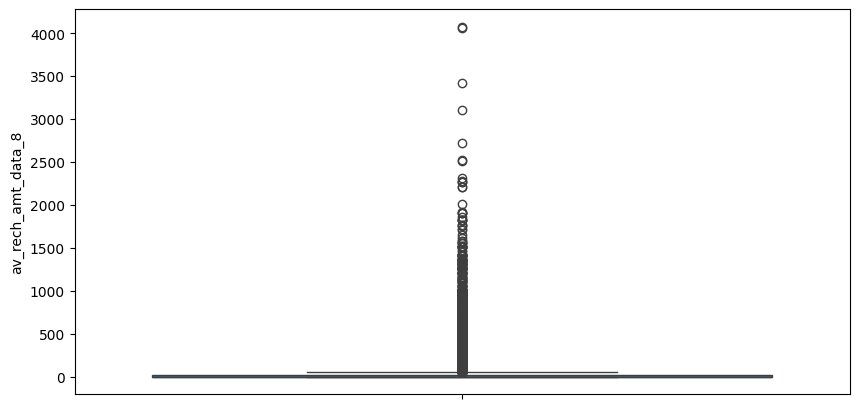

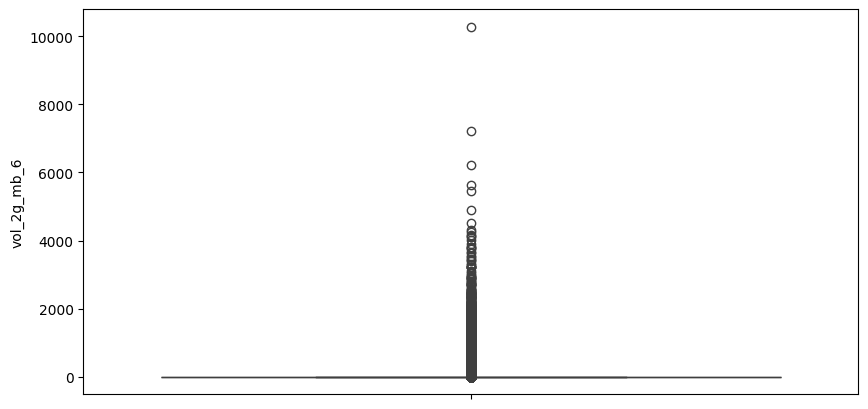

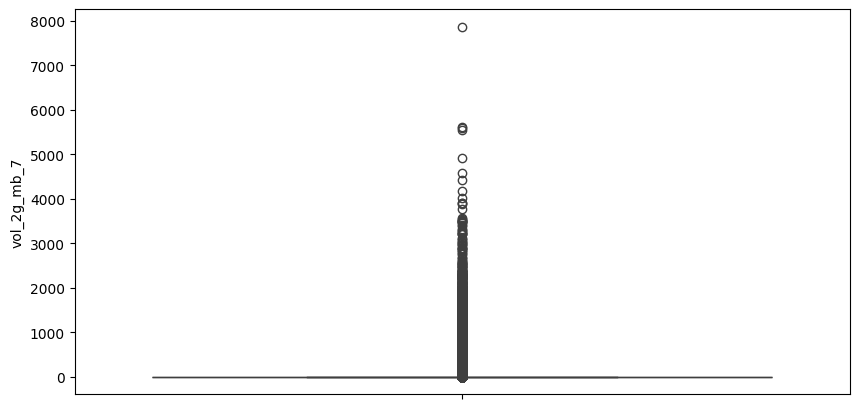

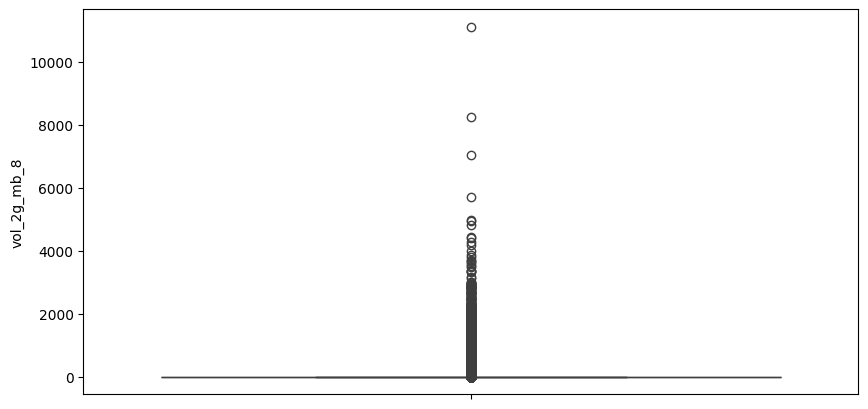

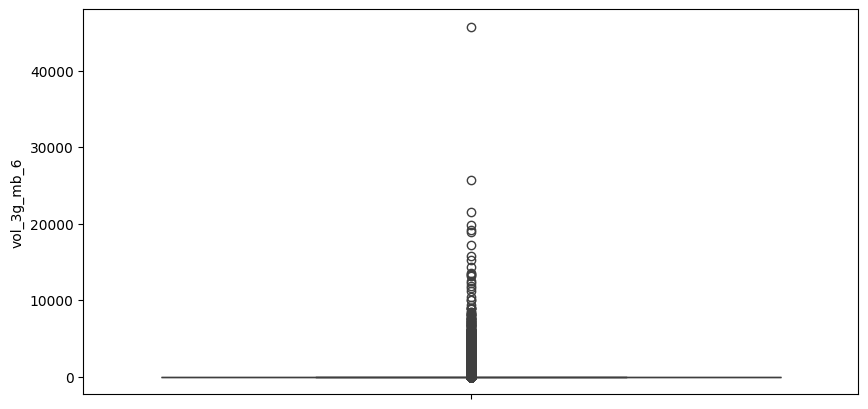

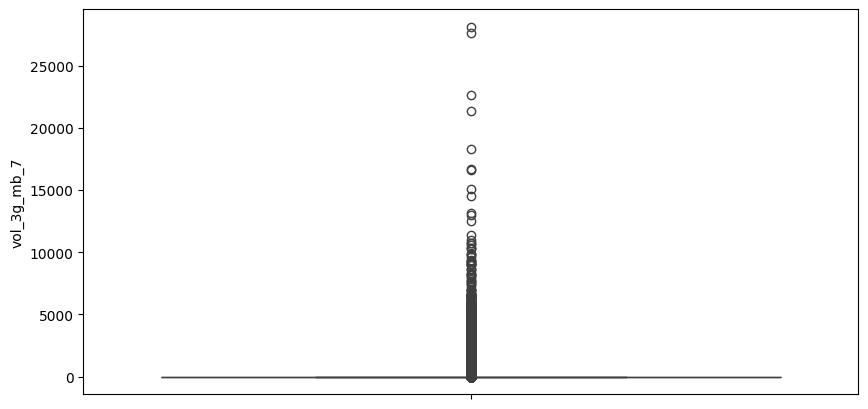

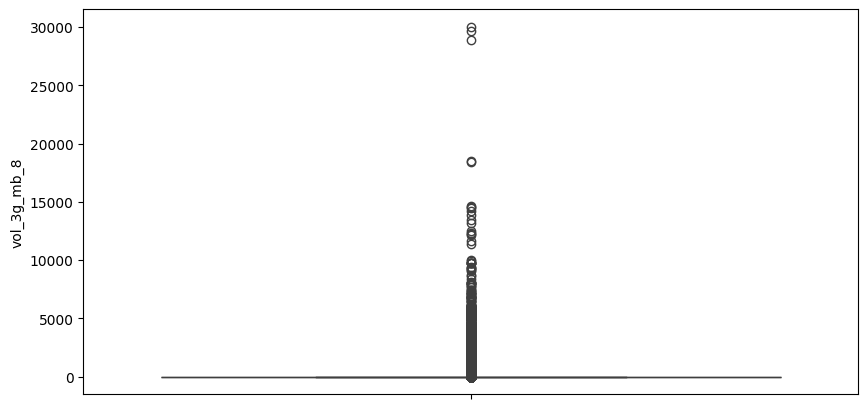

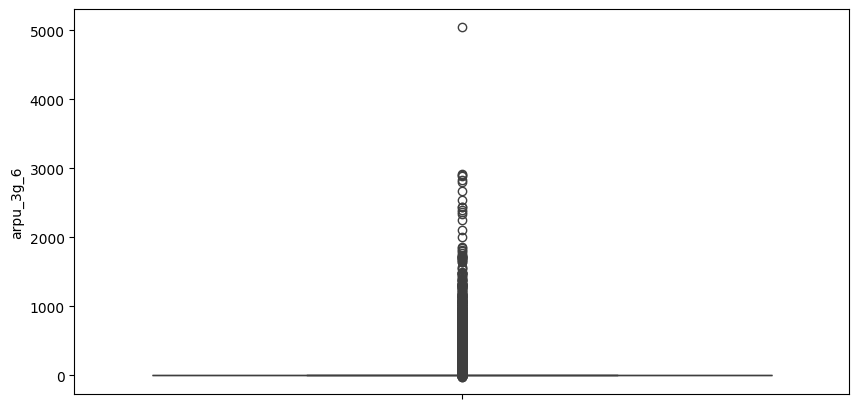

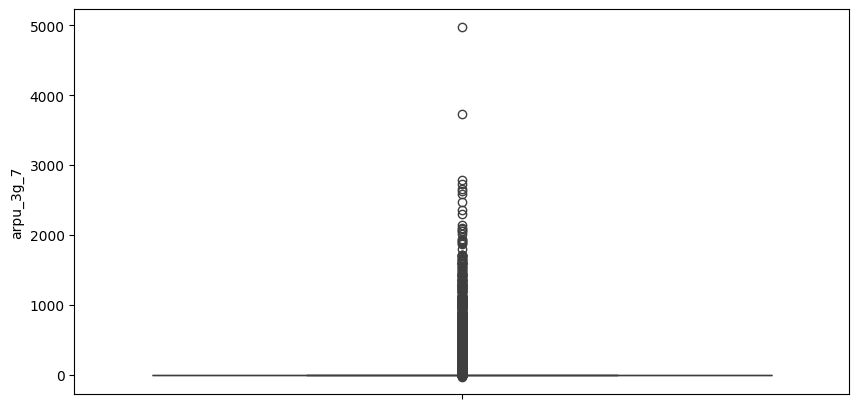

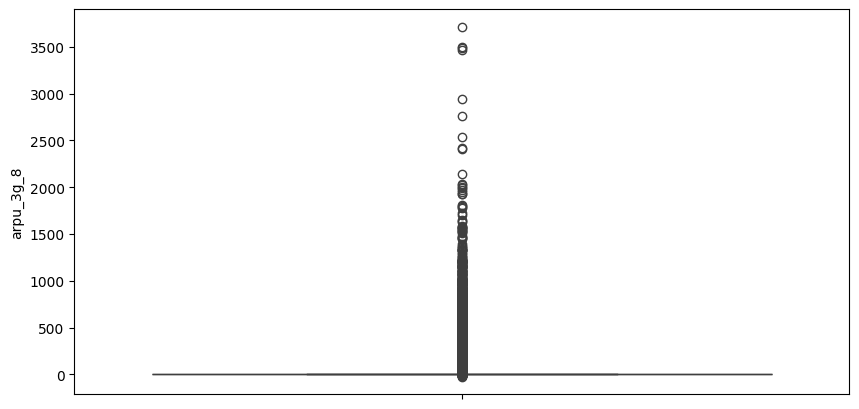

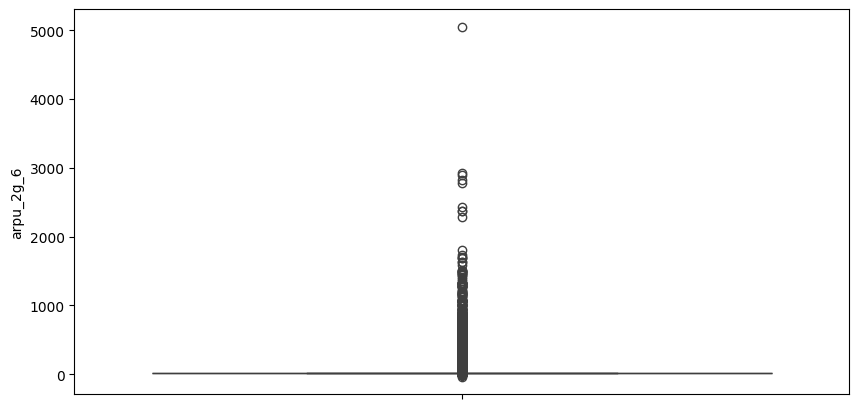

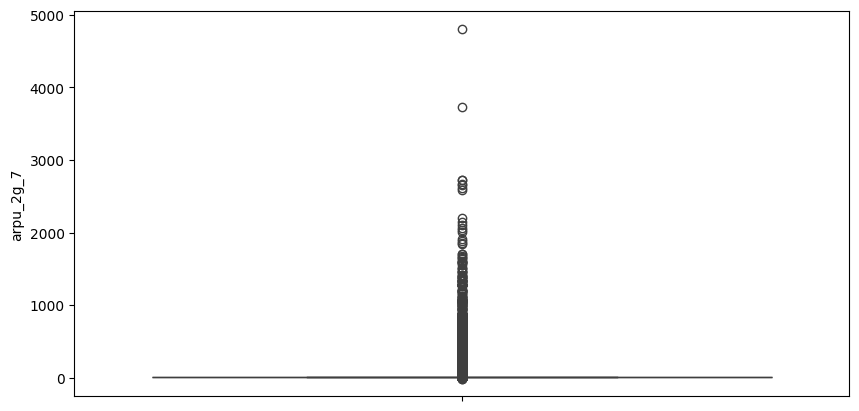

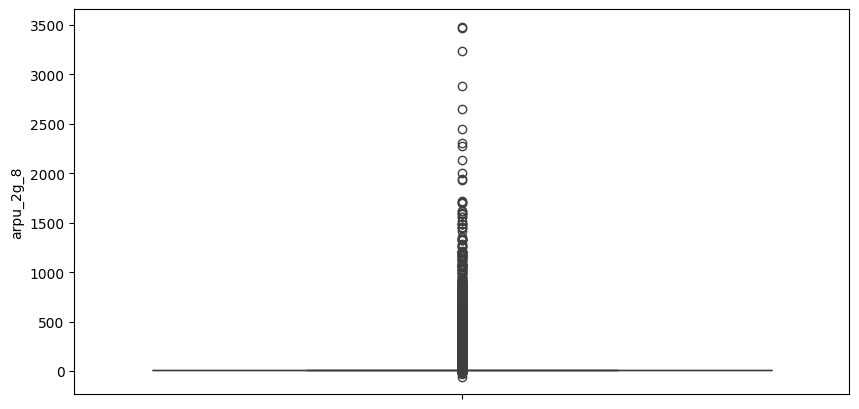

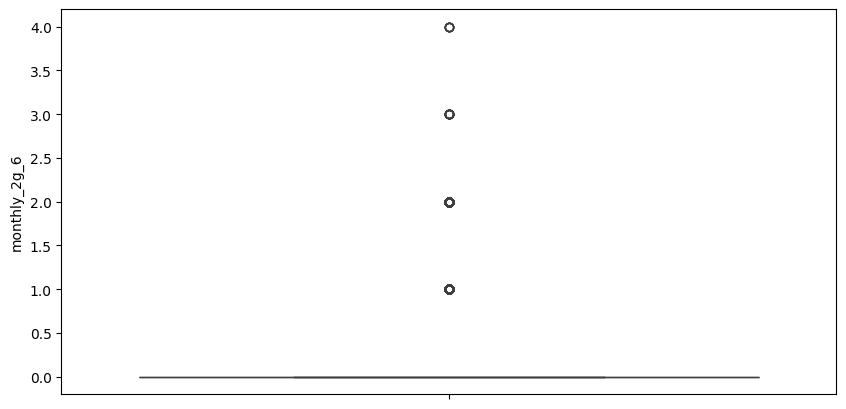

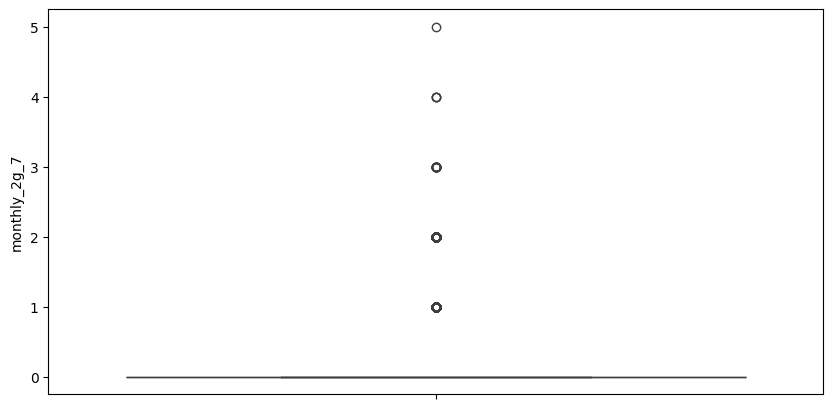

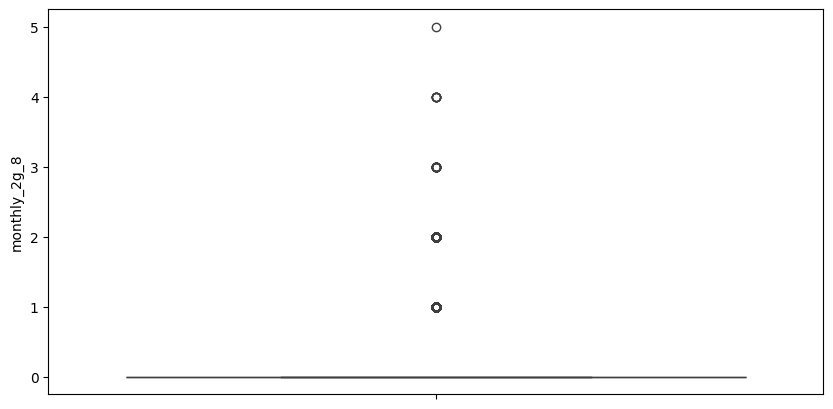

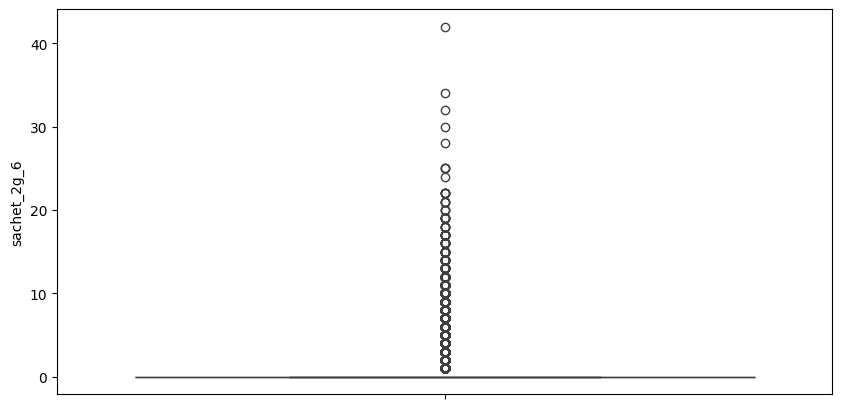

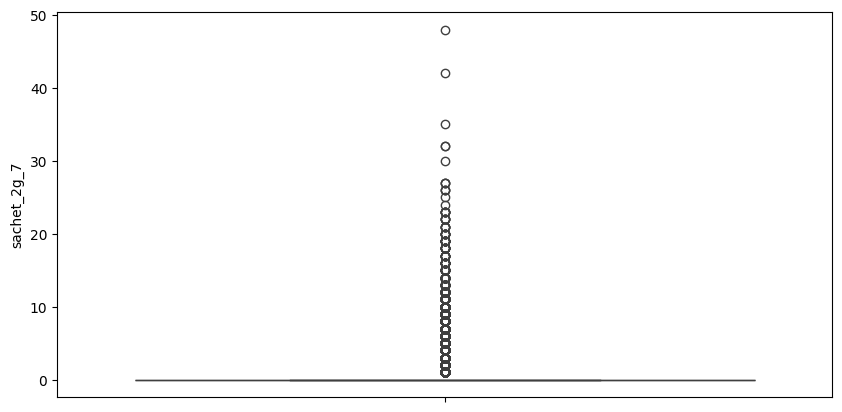

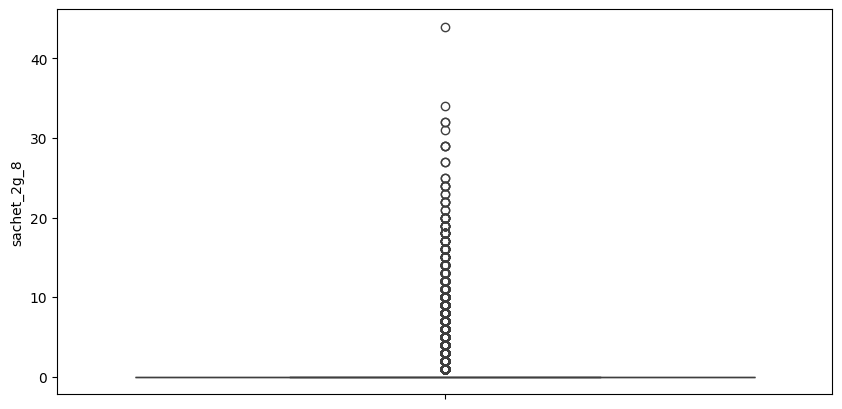

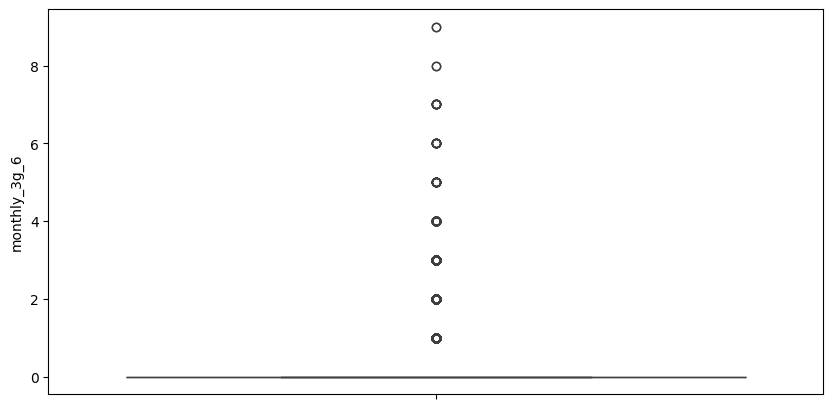

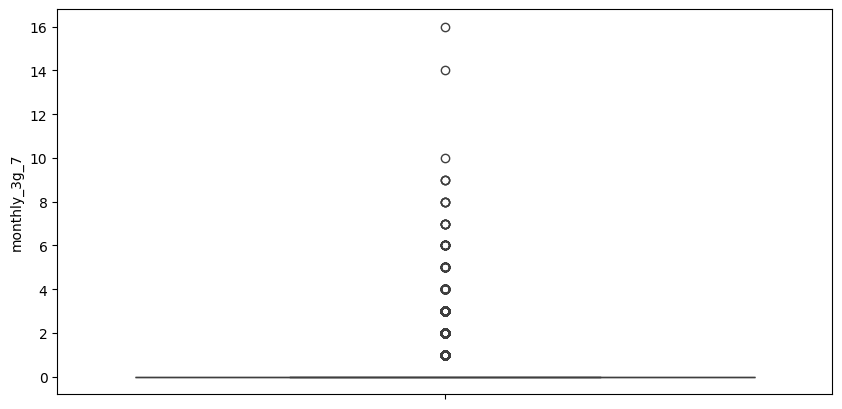

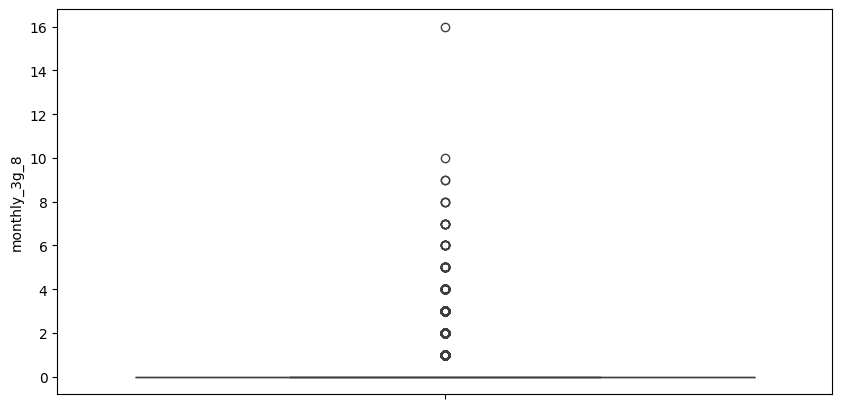

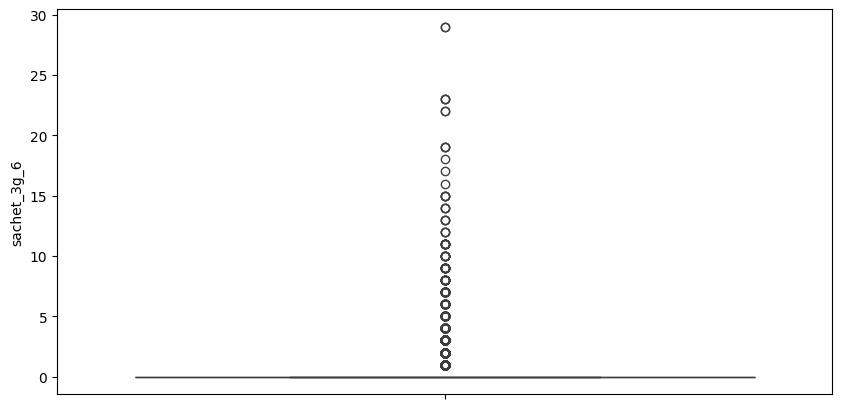

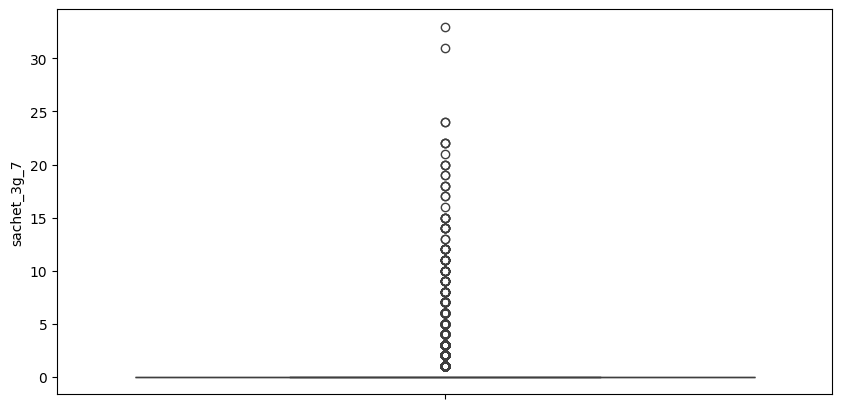

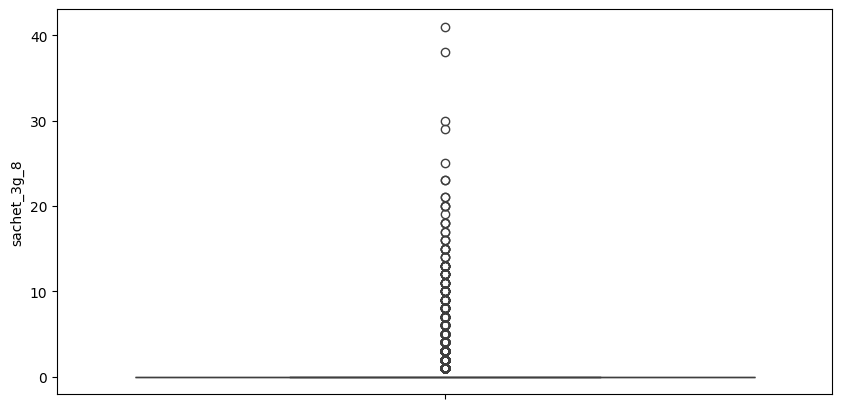

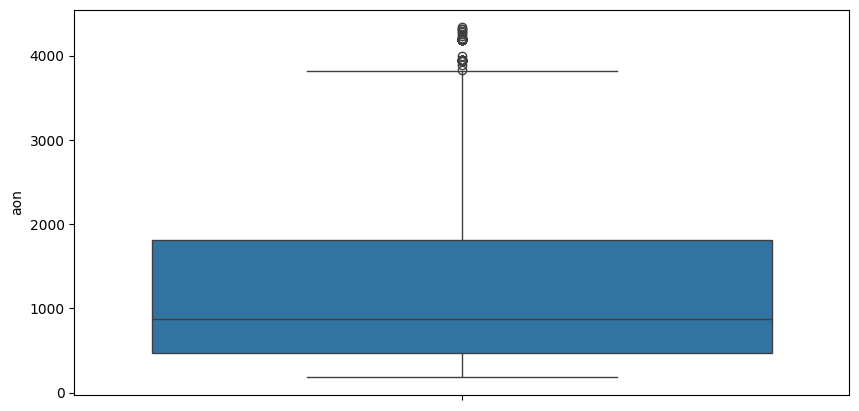

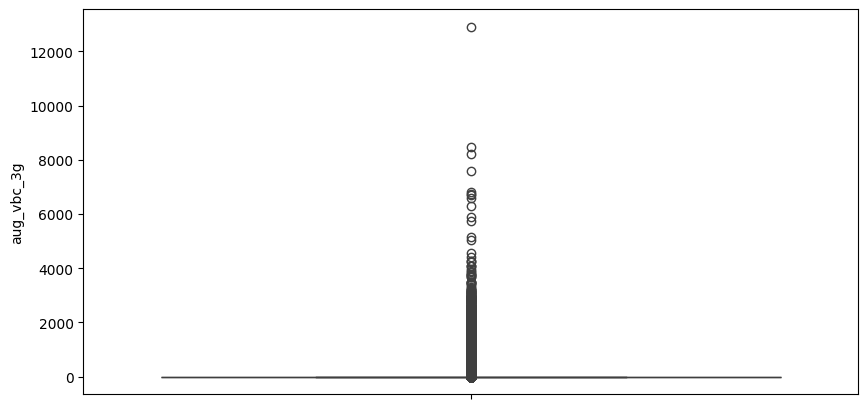

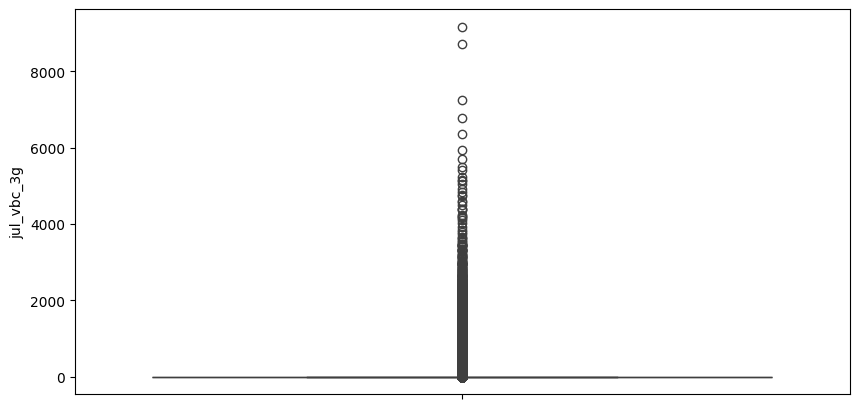

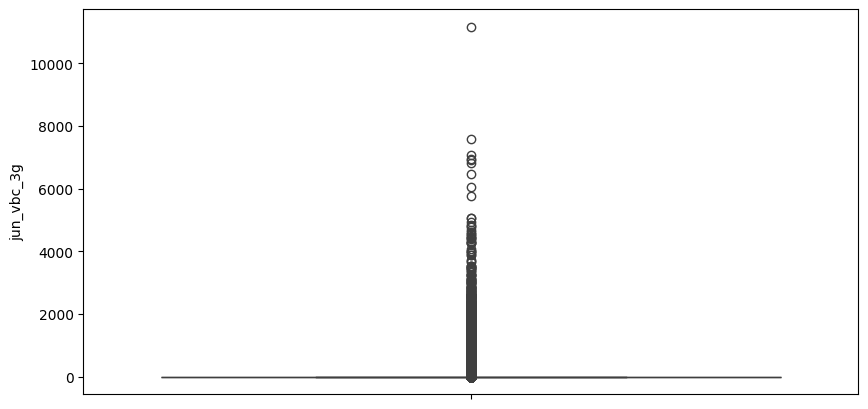

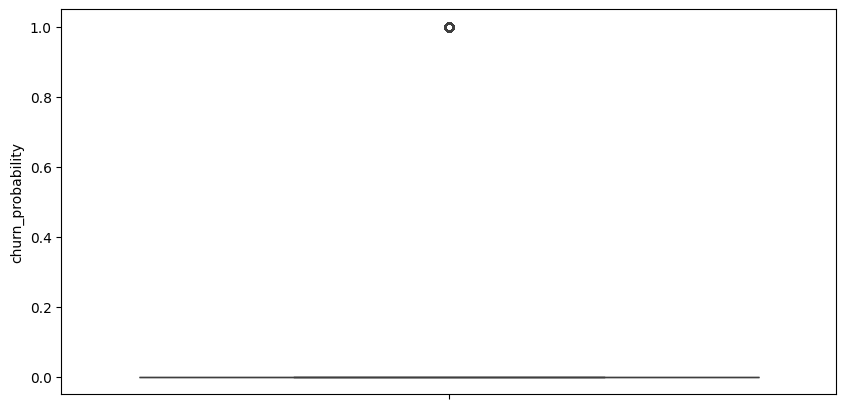

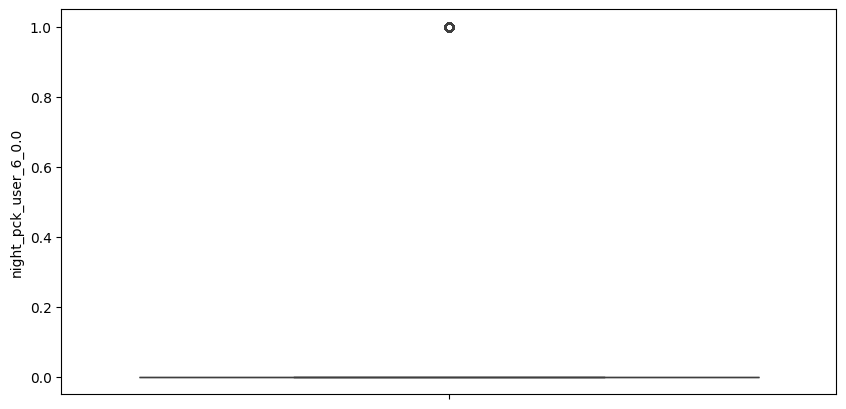

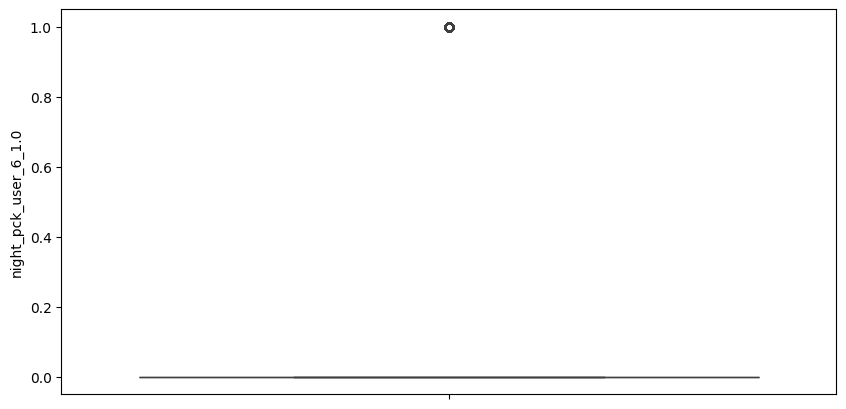

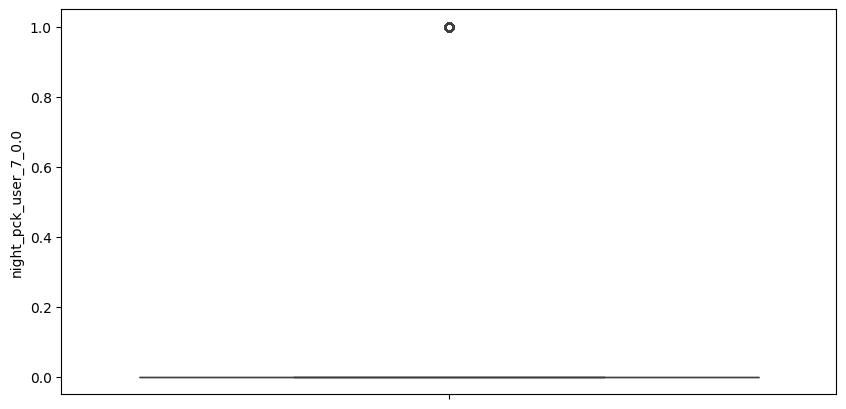

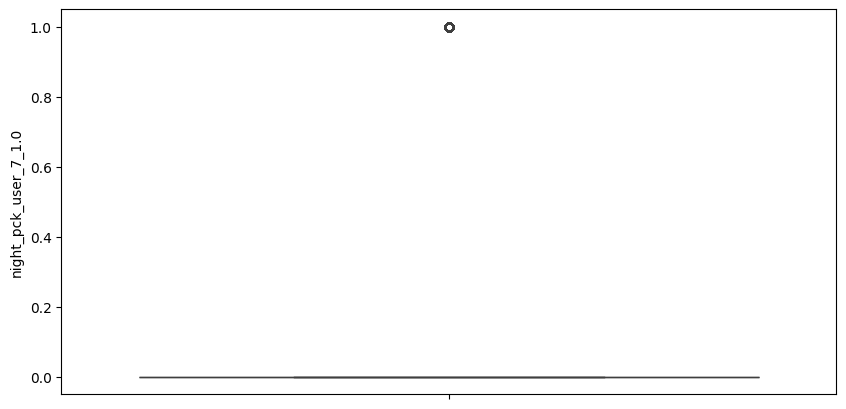

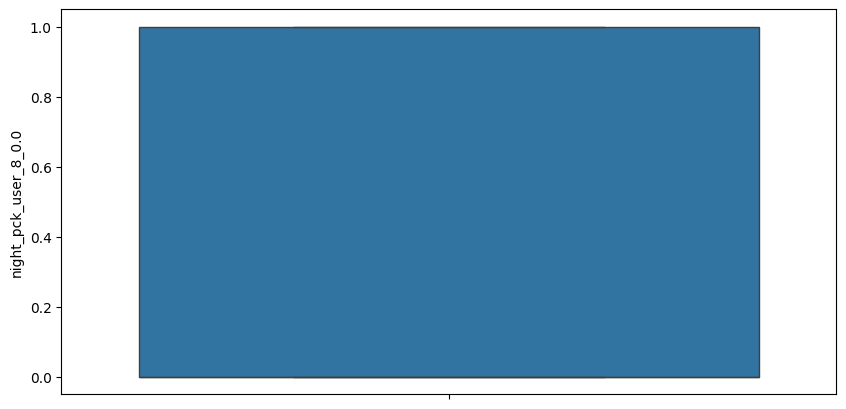

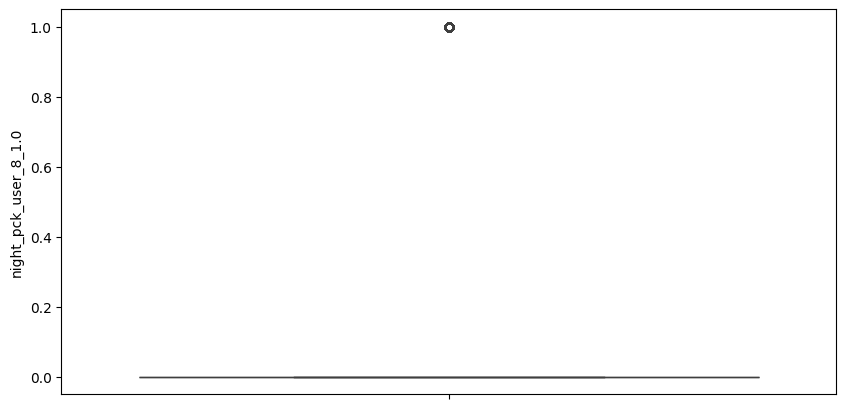

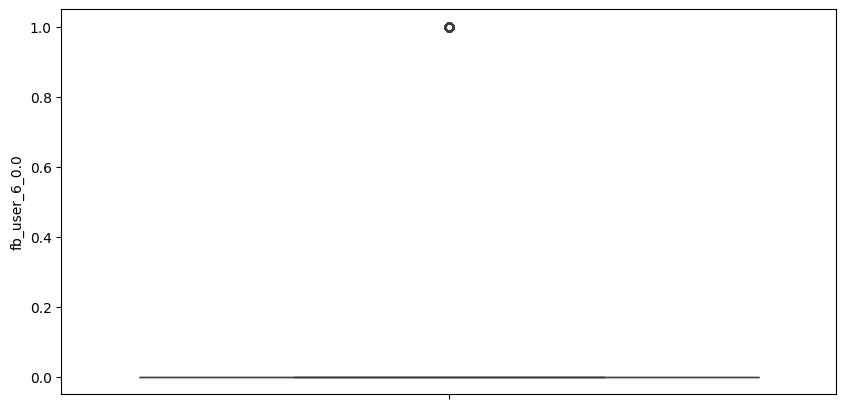

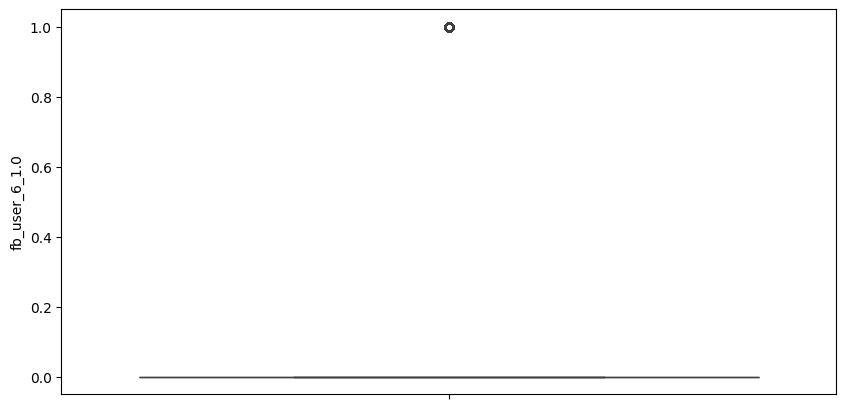

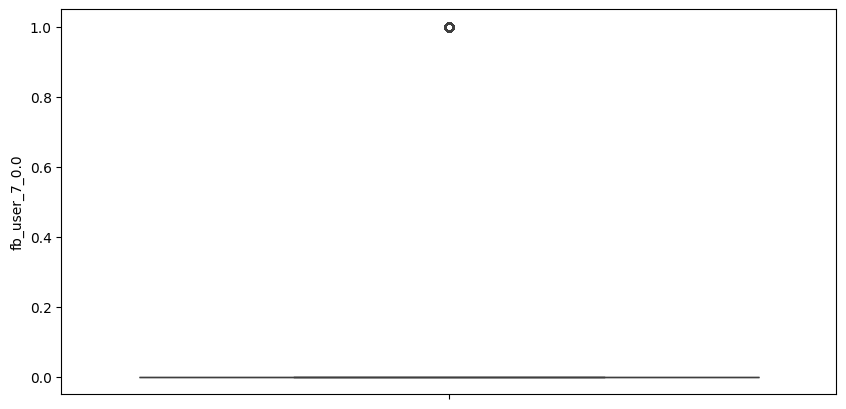

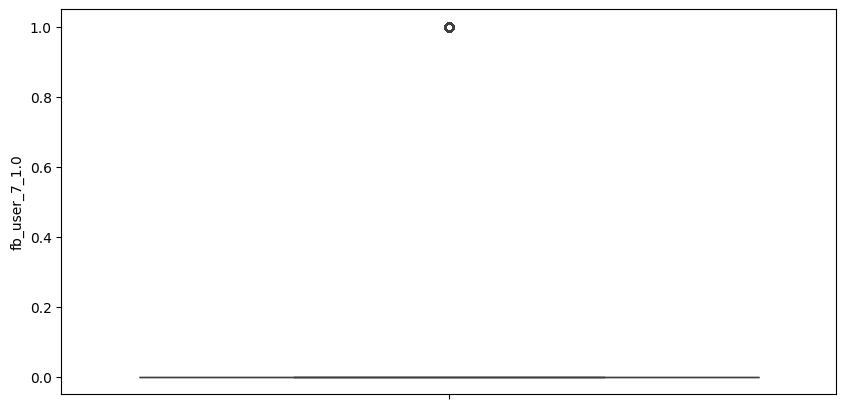

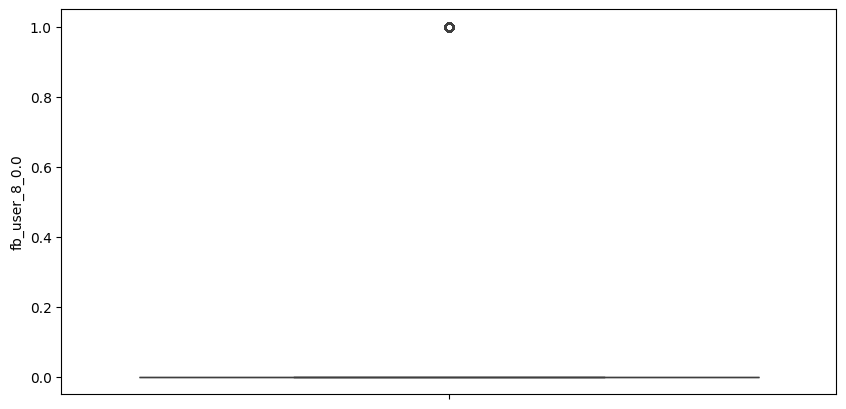

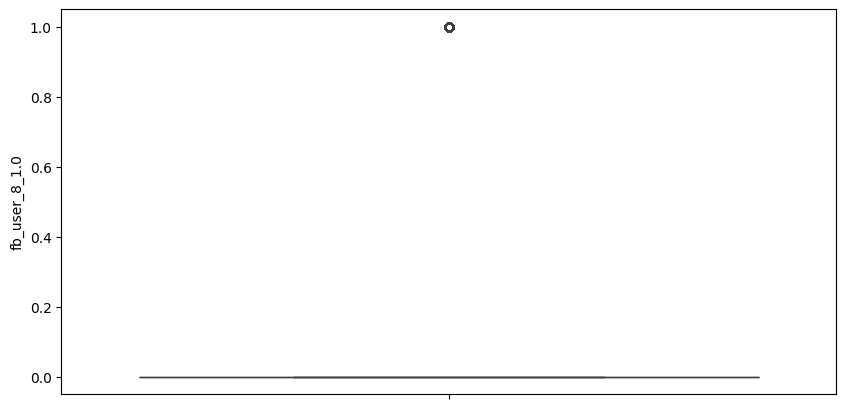

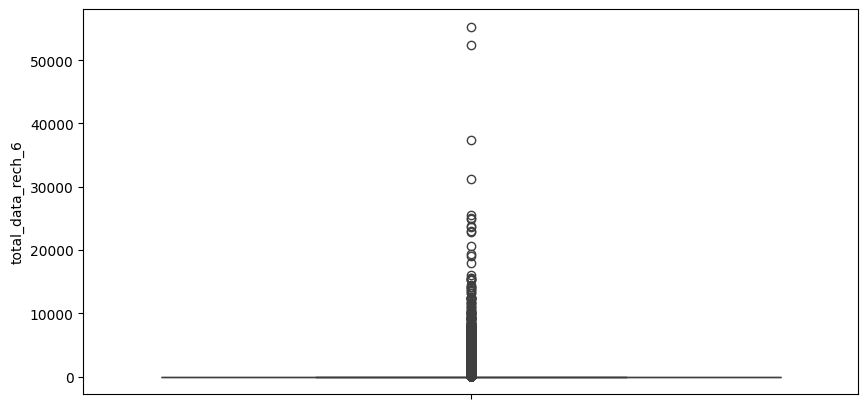

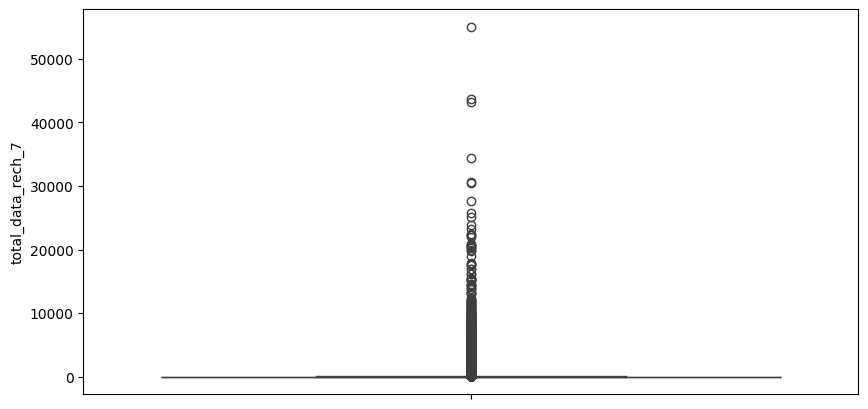

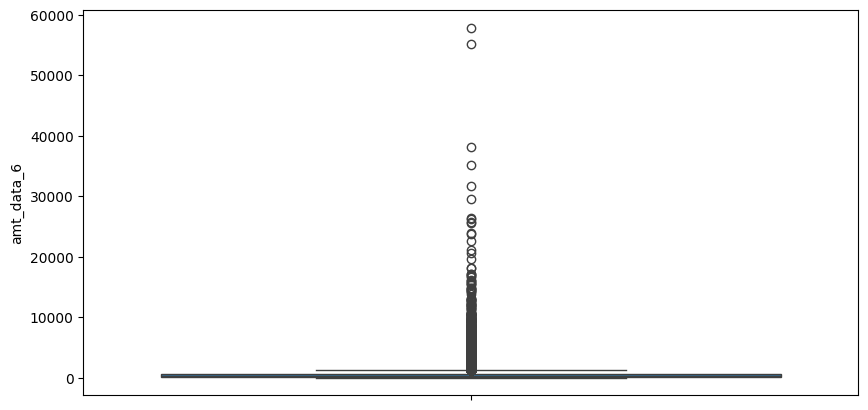

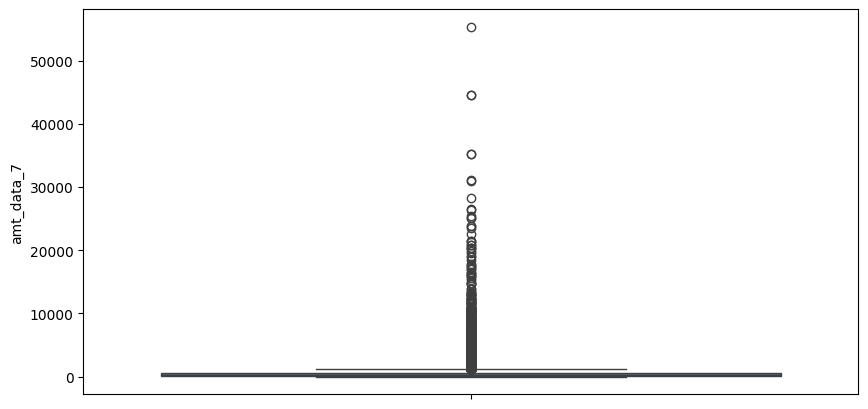

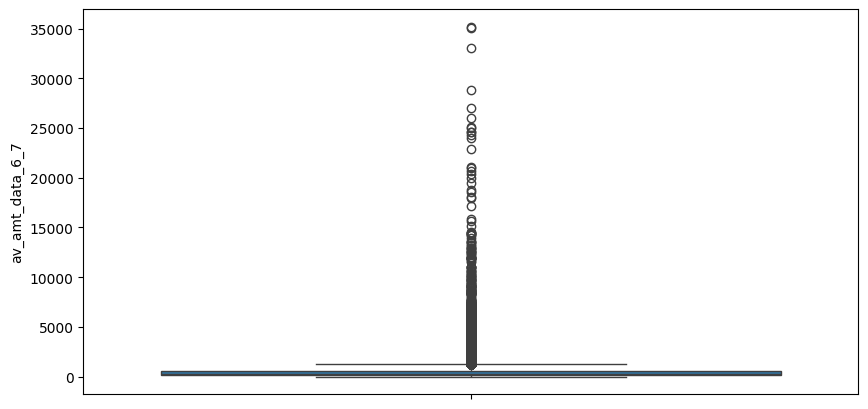

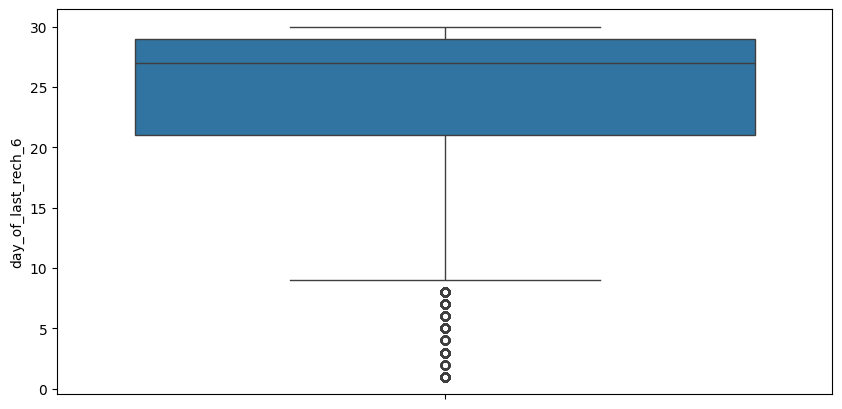

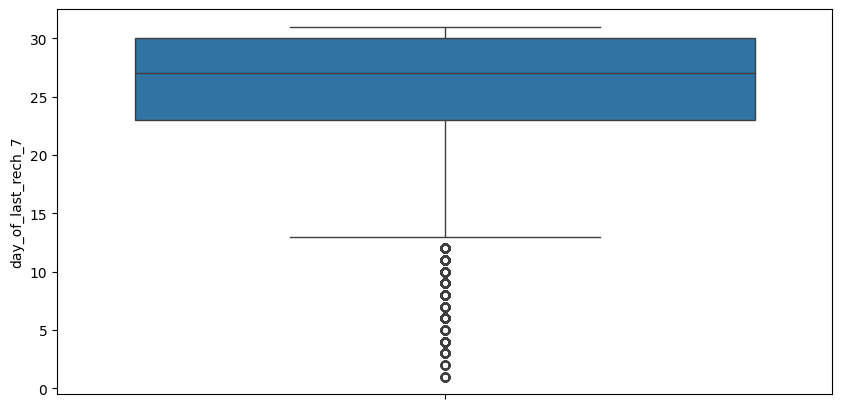

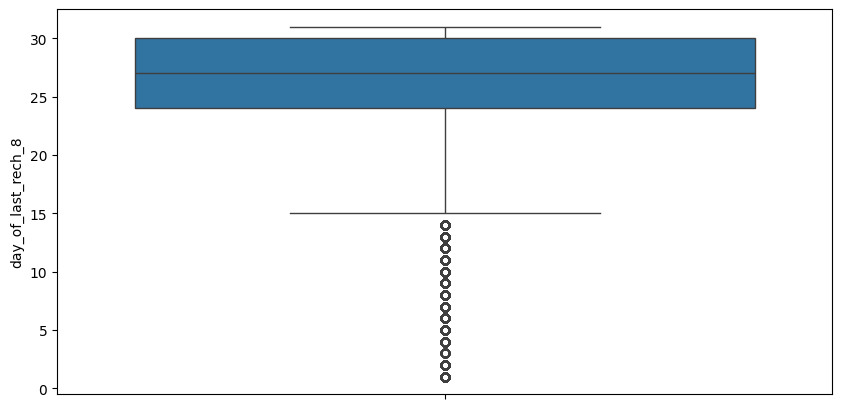

In [60]:
# Show all variable dist plot
for i in df.columns:
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])
    plt.show()

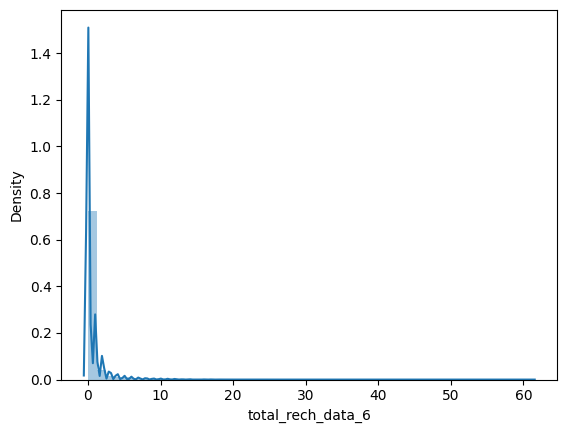

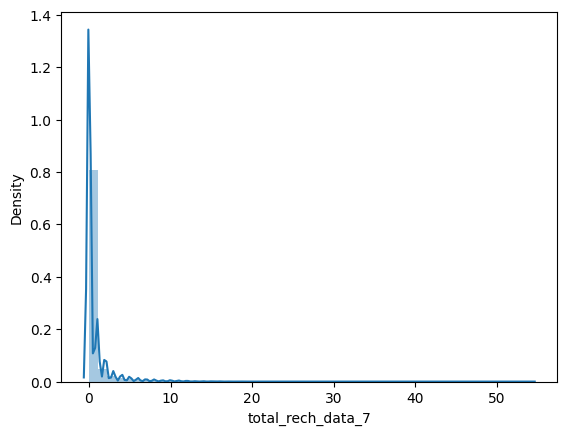

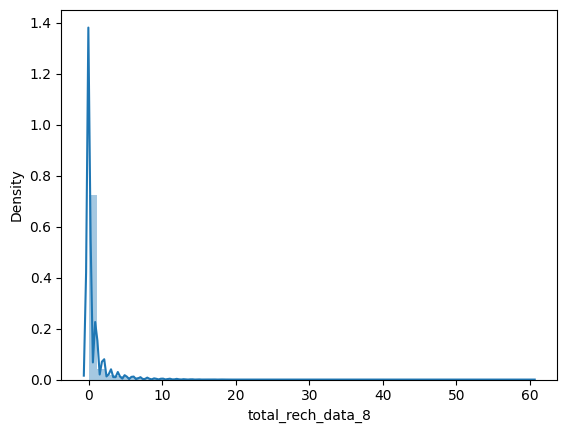

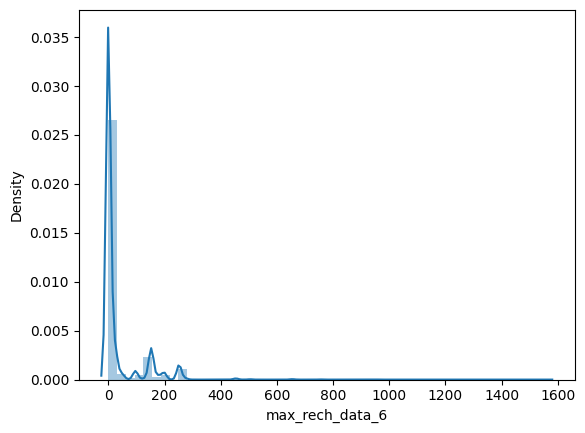

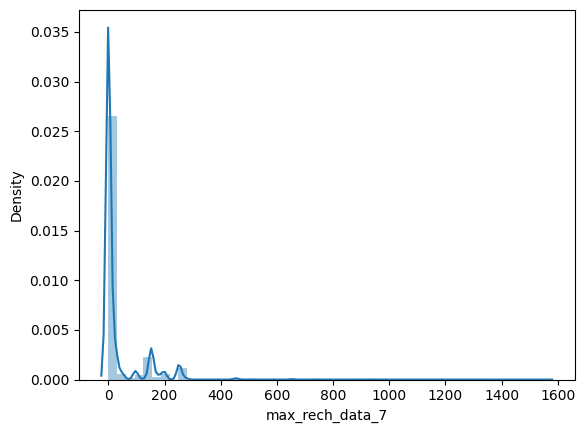

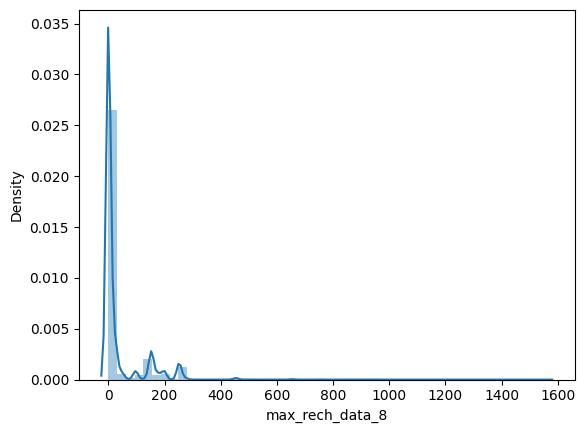

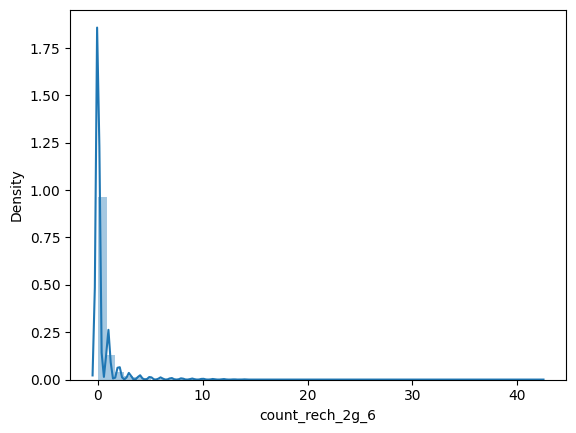

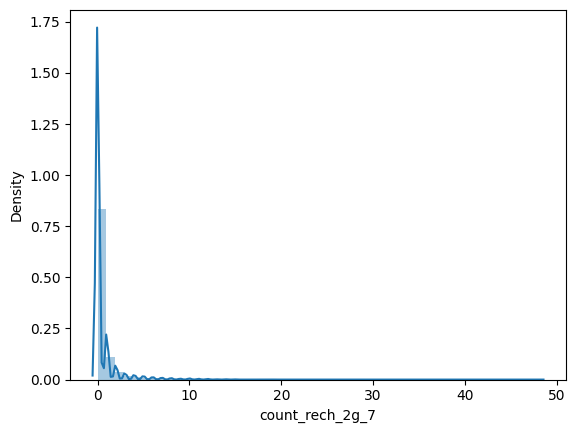

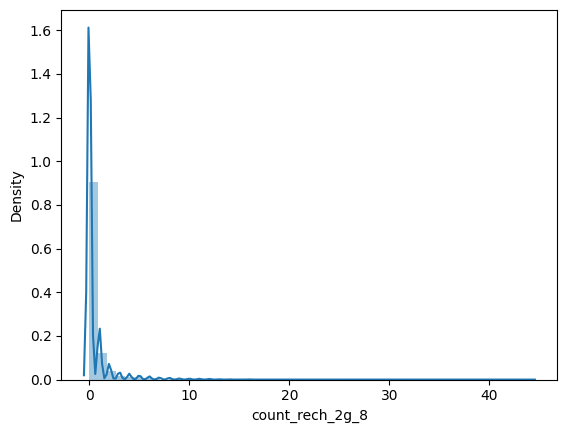

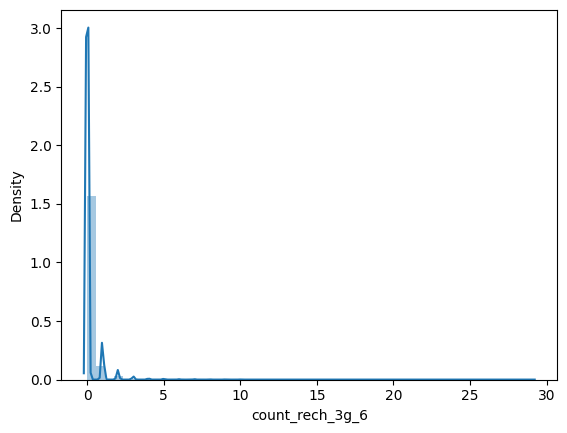

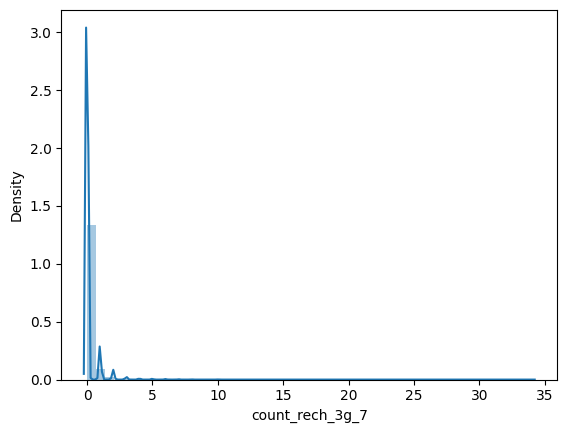

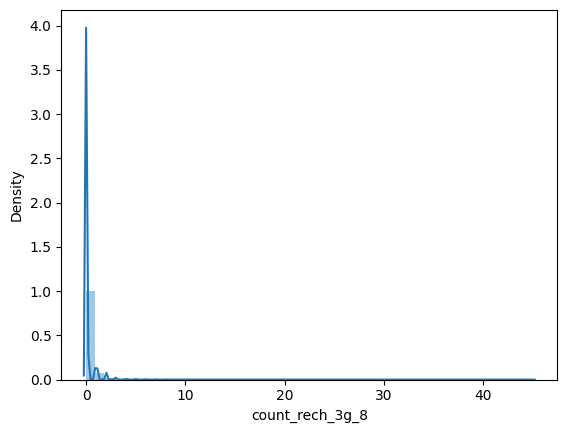

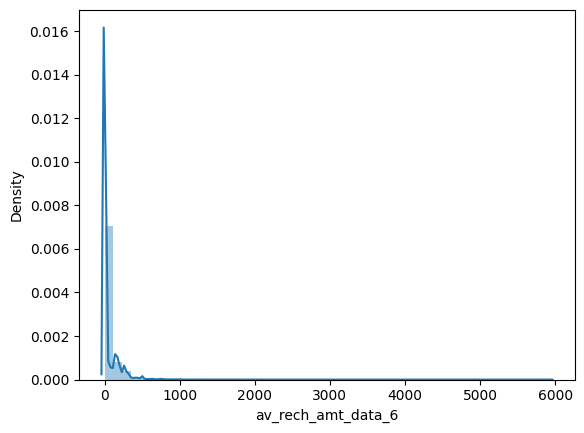

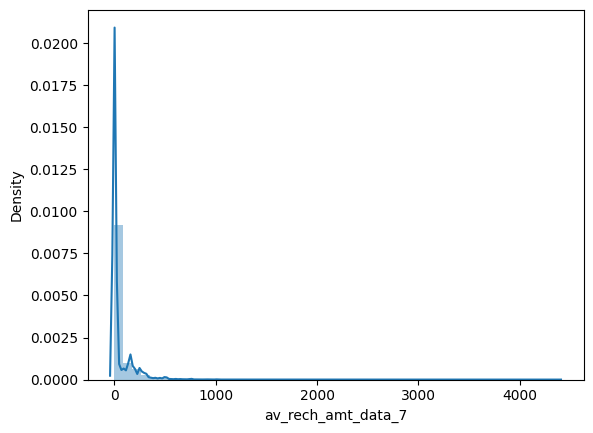

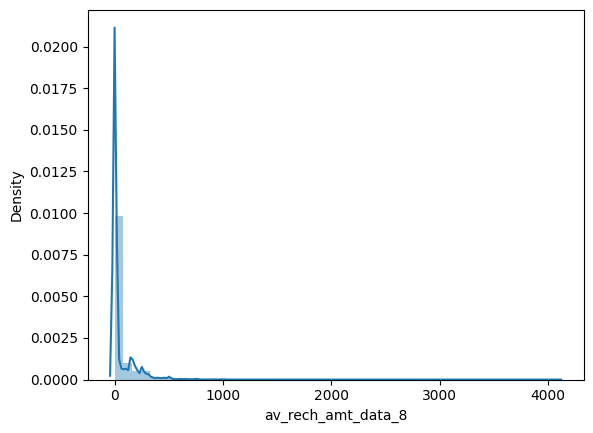

In [62]:
# Show recharge variable dist plot
for i in recharge_col:
    sns.distplot(df[i],label=i);
    plt.show()

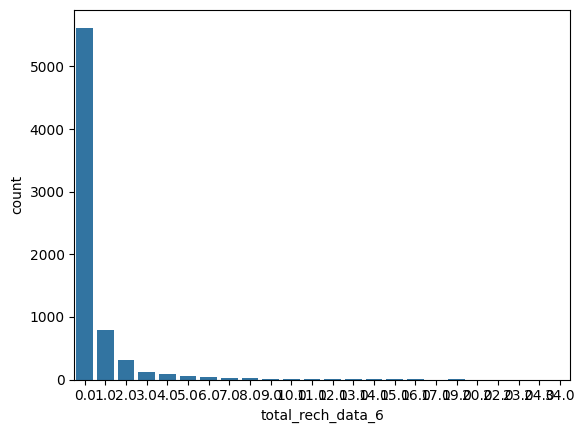

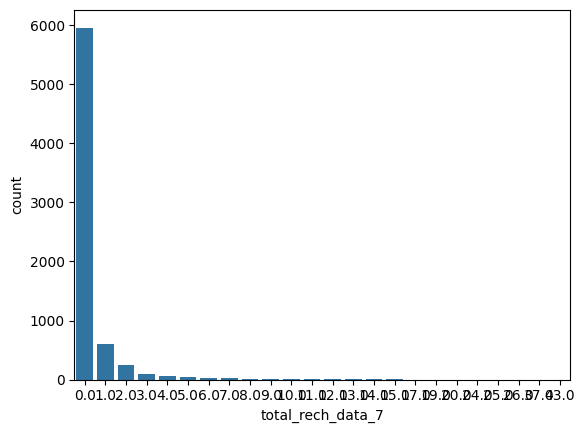

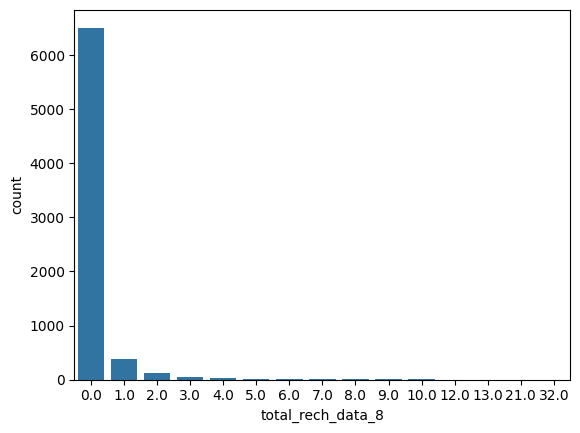

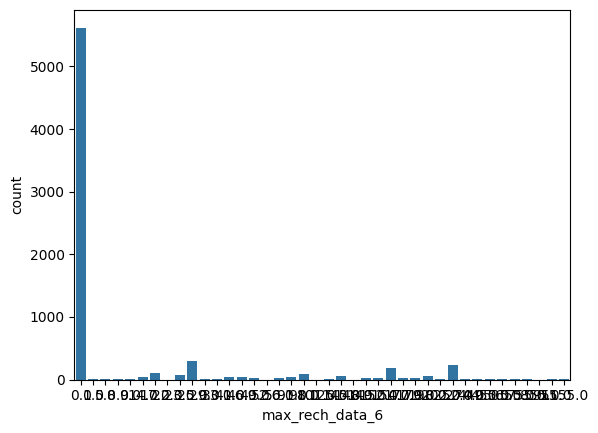

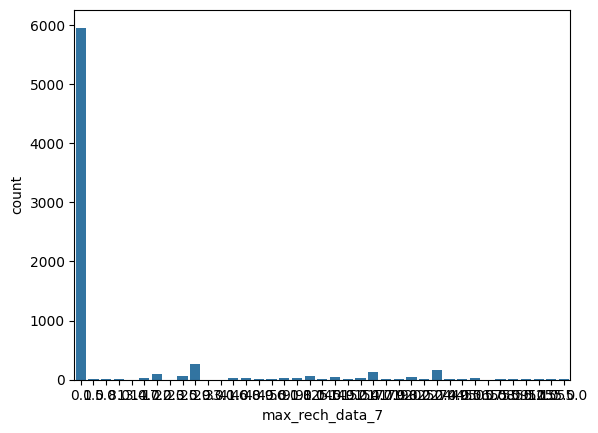

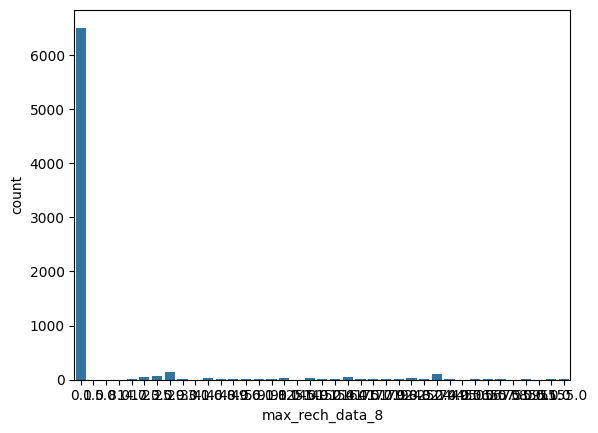

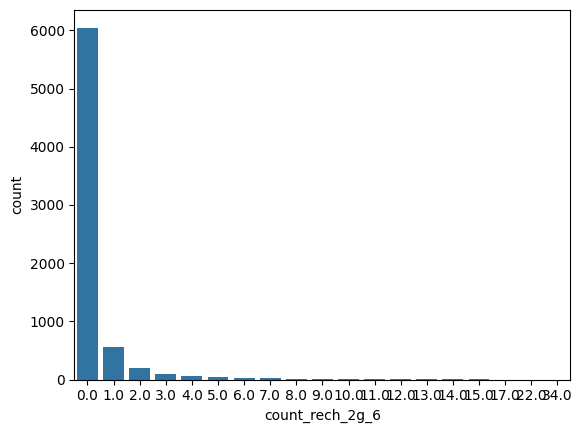

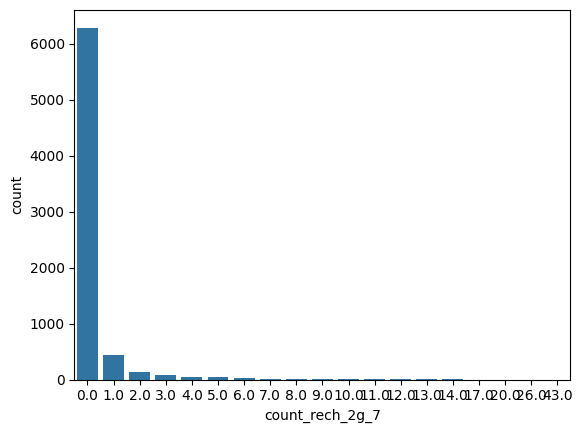

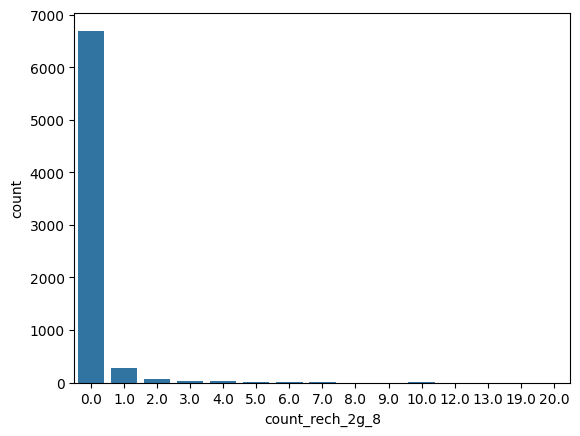

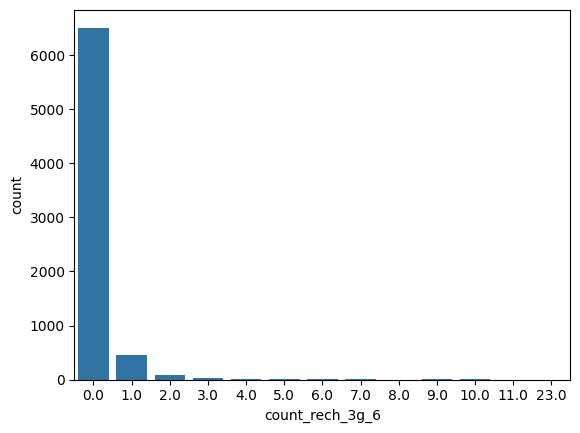

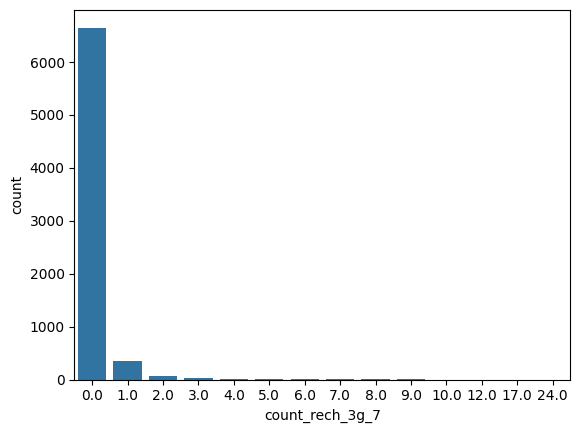

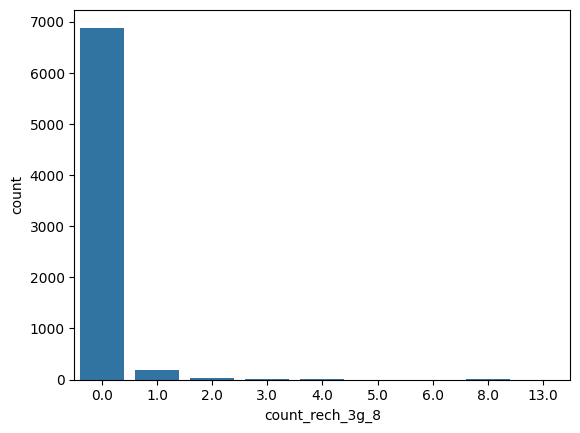

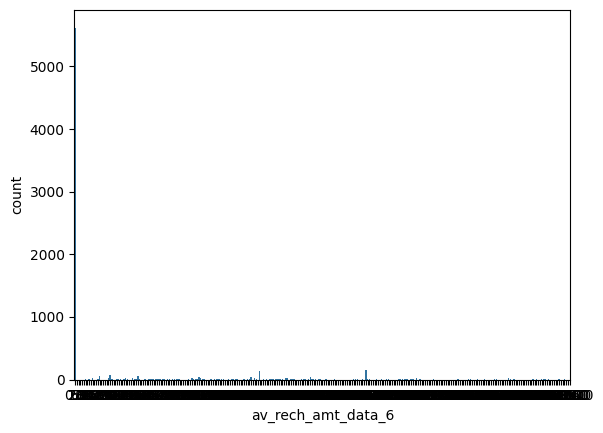

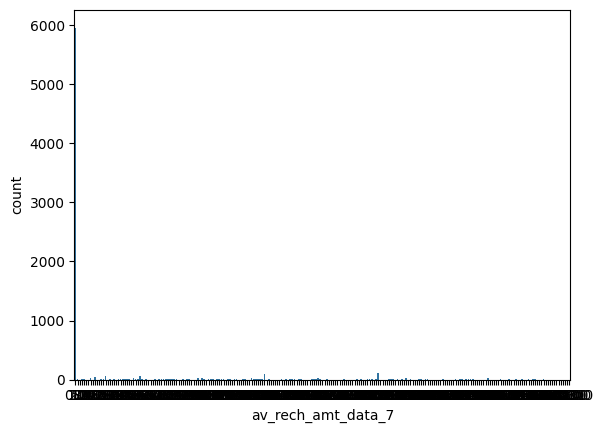

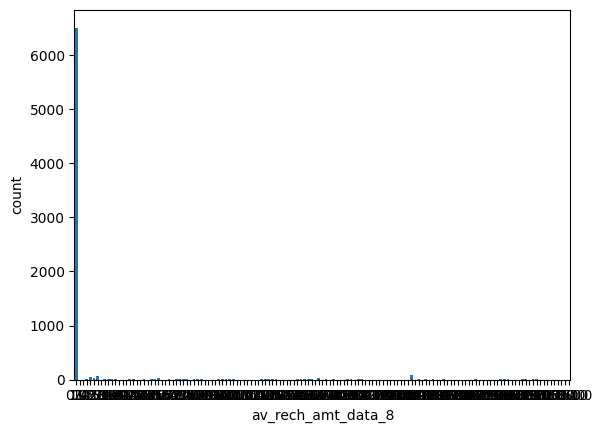

In [64]:
#Checking Recharge impact on Churn
for i in recharge_col:
    sns.countplot(x=i, data=df[df['churn_probability'] == 1]);
    plt.show()

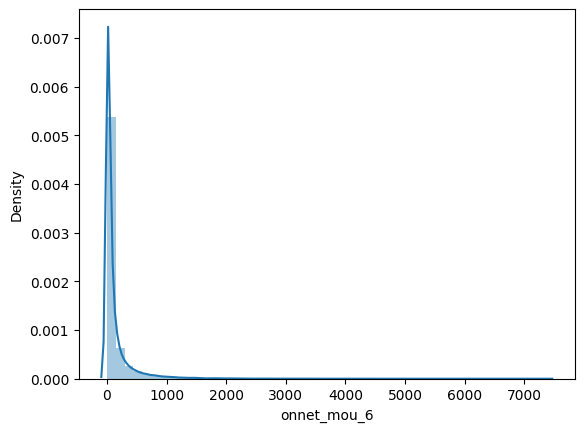

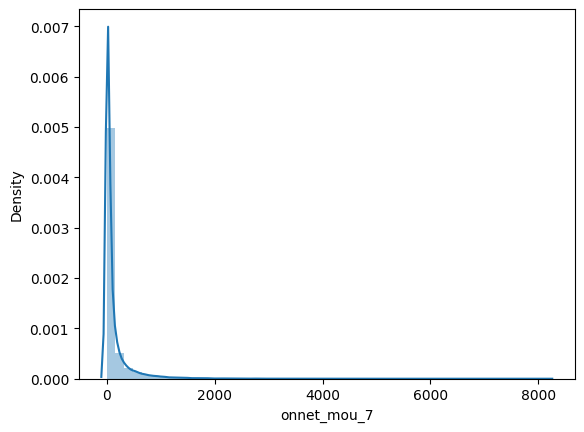

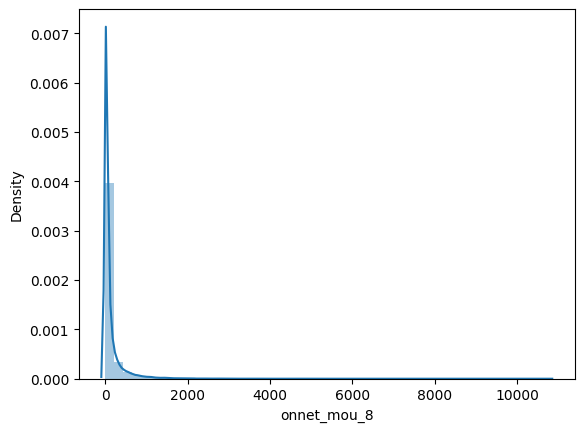

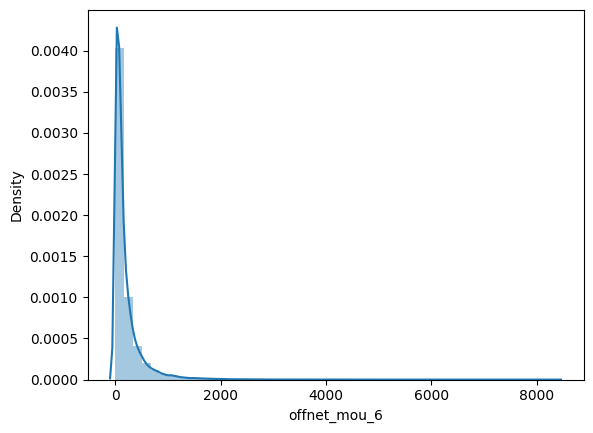

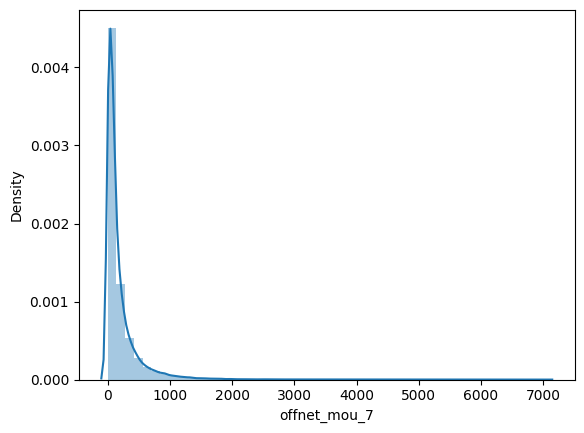

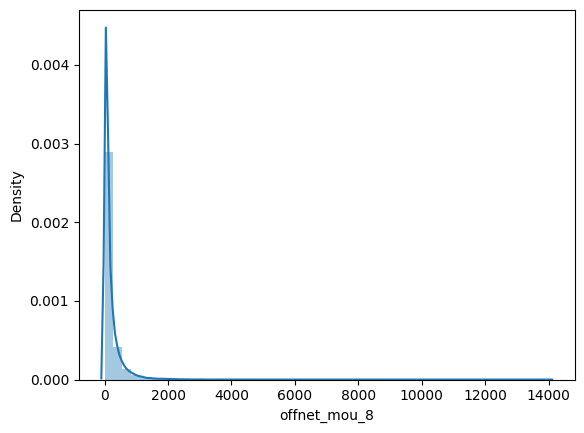

In [66]:
#Checking onnet & Offnet
onnet_offnet = ['onnet_mou_6', 'onnet_mou_7','onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7','offnet_mou_8']
for i in onnet_offnet:
    sns.distplot(df[i],label=i);
    plt.show()

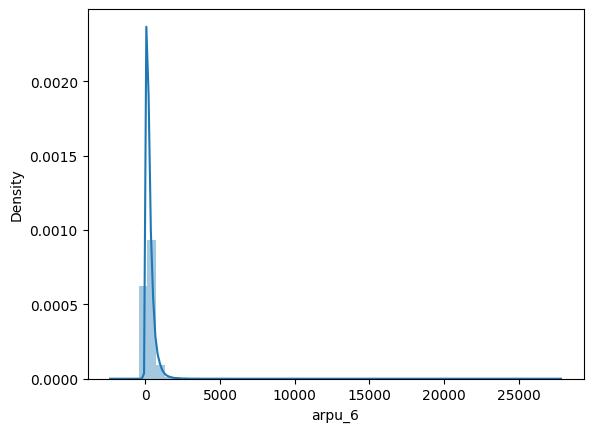

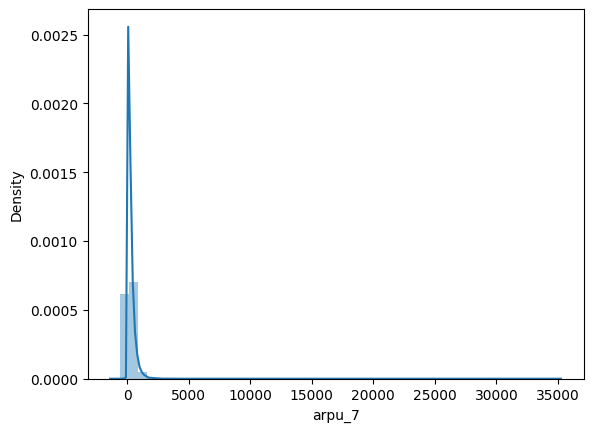

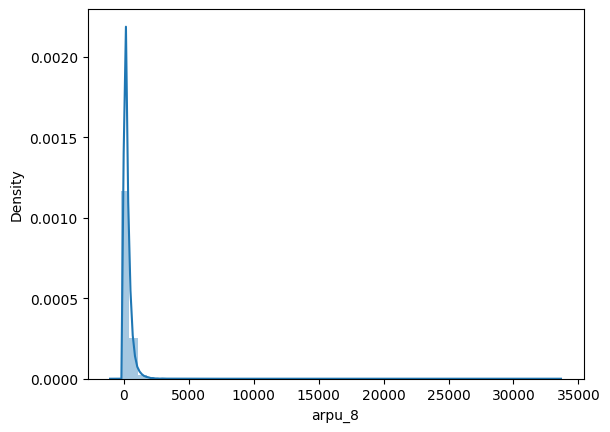

In [68]:
#Checking Arpu impact
arpu = ['arpu_6', 'arpu_7','arpu_8']
for i in arpu:
    sns.distplot(df[i],label=i);
    plt.show()

In [70]:
df['aon'] = df['aon']//365
df['aon'].value_counts()

aon
1     18435
0     11917
2     10853
3      7066
6      4726
4      4334
7      3995
8      3565
5      2986
9      1120
10      960
11       42
Name: count, dtype: int64

In [72]:
df['aon_bin'] = pd.cut(df['aon'], bins=5,precision=0, labels=['0-2yr','2-4yr','4-6yr','6-8yr', '8+ yr'])
df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

<Axes: xlabel='aon_bin', ylabel='count'>

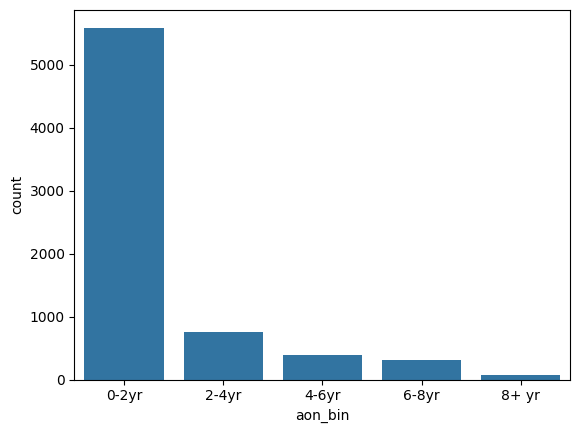

In [74]:
sns.countplot(x='aon_bin', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_2g_6', ylabel='count'>

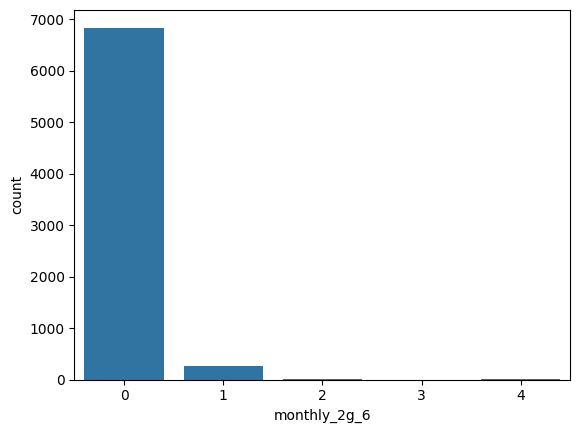

In [76]:
sns.countplot(x='monthly_2g_6', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_2g_7', ylabel='count'>

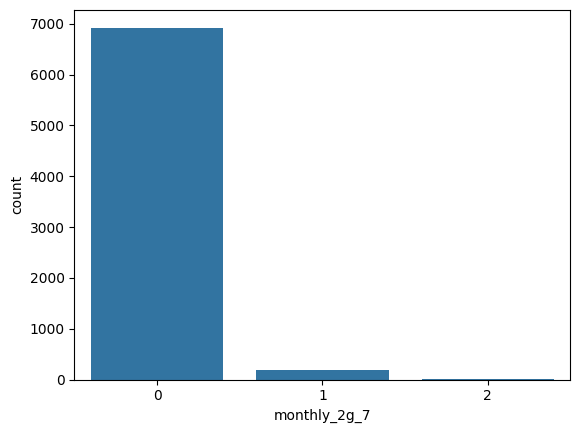

In [78]:
sns.countplot(x='monthly_2g_7', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_2g_8', ylabel='count'>

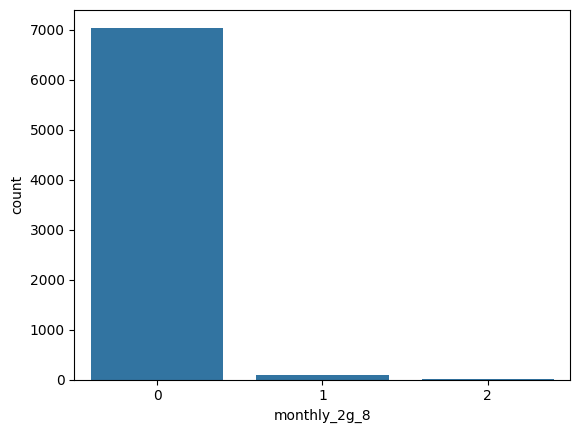

In [80]:
sns.countplot(x='monthly_2g_8', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_3g_6', ylabel='count'>

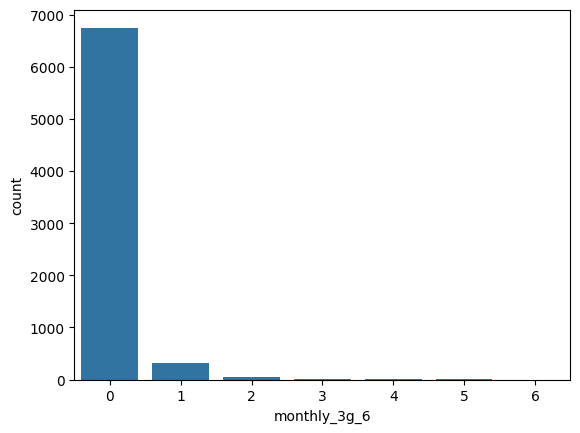

In [82]:
sns.countplot(x='monthly_3g_6', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_3g_7', ylabel='count'>

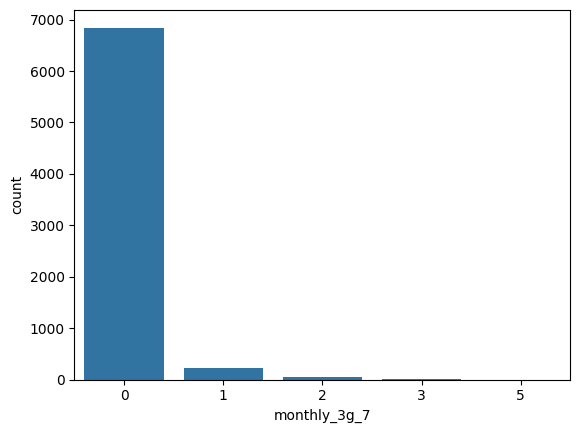

In [84]:
sns.countplot(x='monthly_3g_7', data=df[df['churn_probability'] == 1])

<Axes: xlabel='monthly_3g_8', ylabel='count'>

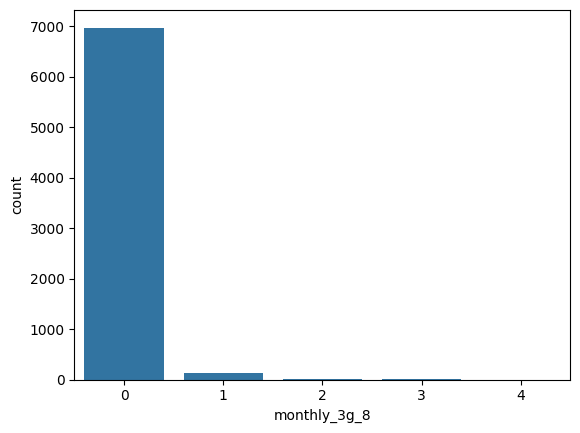

In [86]:
sns.countplot(x='monthly_3g_8', data=df[df['churn_probability'] == 1])

<Axes: xlabel='aon_bin', ylabel='count'>

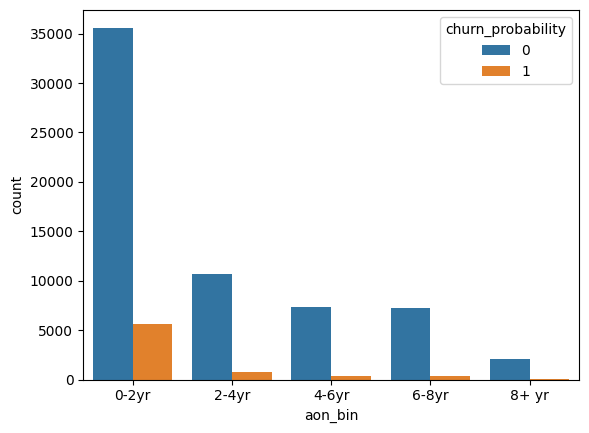

In [88]:
sns.countplot(x='aon_bin',hue='churn_probability',data=df)

### EDA Analaysis
- people who have not recharge fequently are leaving network
- people with less than 2 years are leaving more as compare to longer tenure

### Creating X,y and then separating train and validation set , we have a separate test set so we won't be creating one

In [94]:
y = df['churn_probability']
X = df.drop('churn_probability',axis=1)
X.drop(['aon_bin'],axis=1,inplace=True)

X.shape, y.shape

((69999, 166), (69999,))

In [96]:
# Removing id column as it is not required in model building

X.drop(['id'],axis=1,inplace=True)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48999, 165), (21000, 165), (48999,), (21000,))

### Feature Scaling

In [103]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

### Feature Enigneering and Selection

In [105]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [107]:
feature_importances = pd.DataFrame({'col':X.columns, 'importance':rf.feature_importances_})

<BarContainer object of 165 artists>

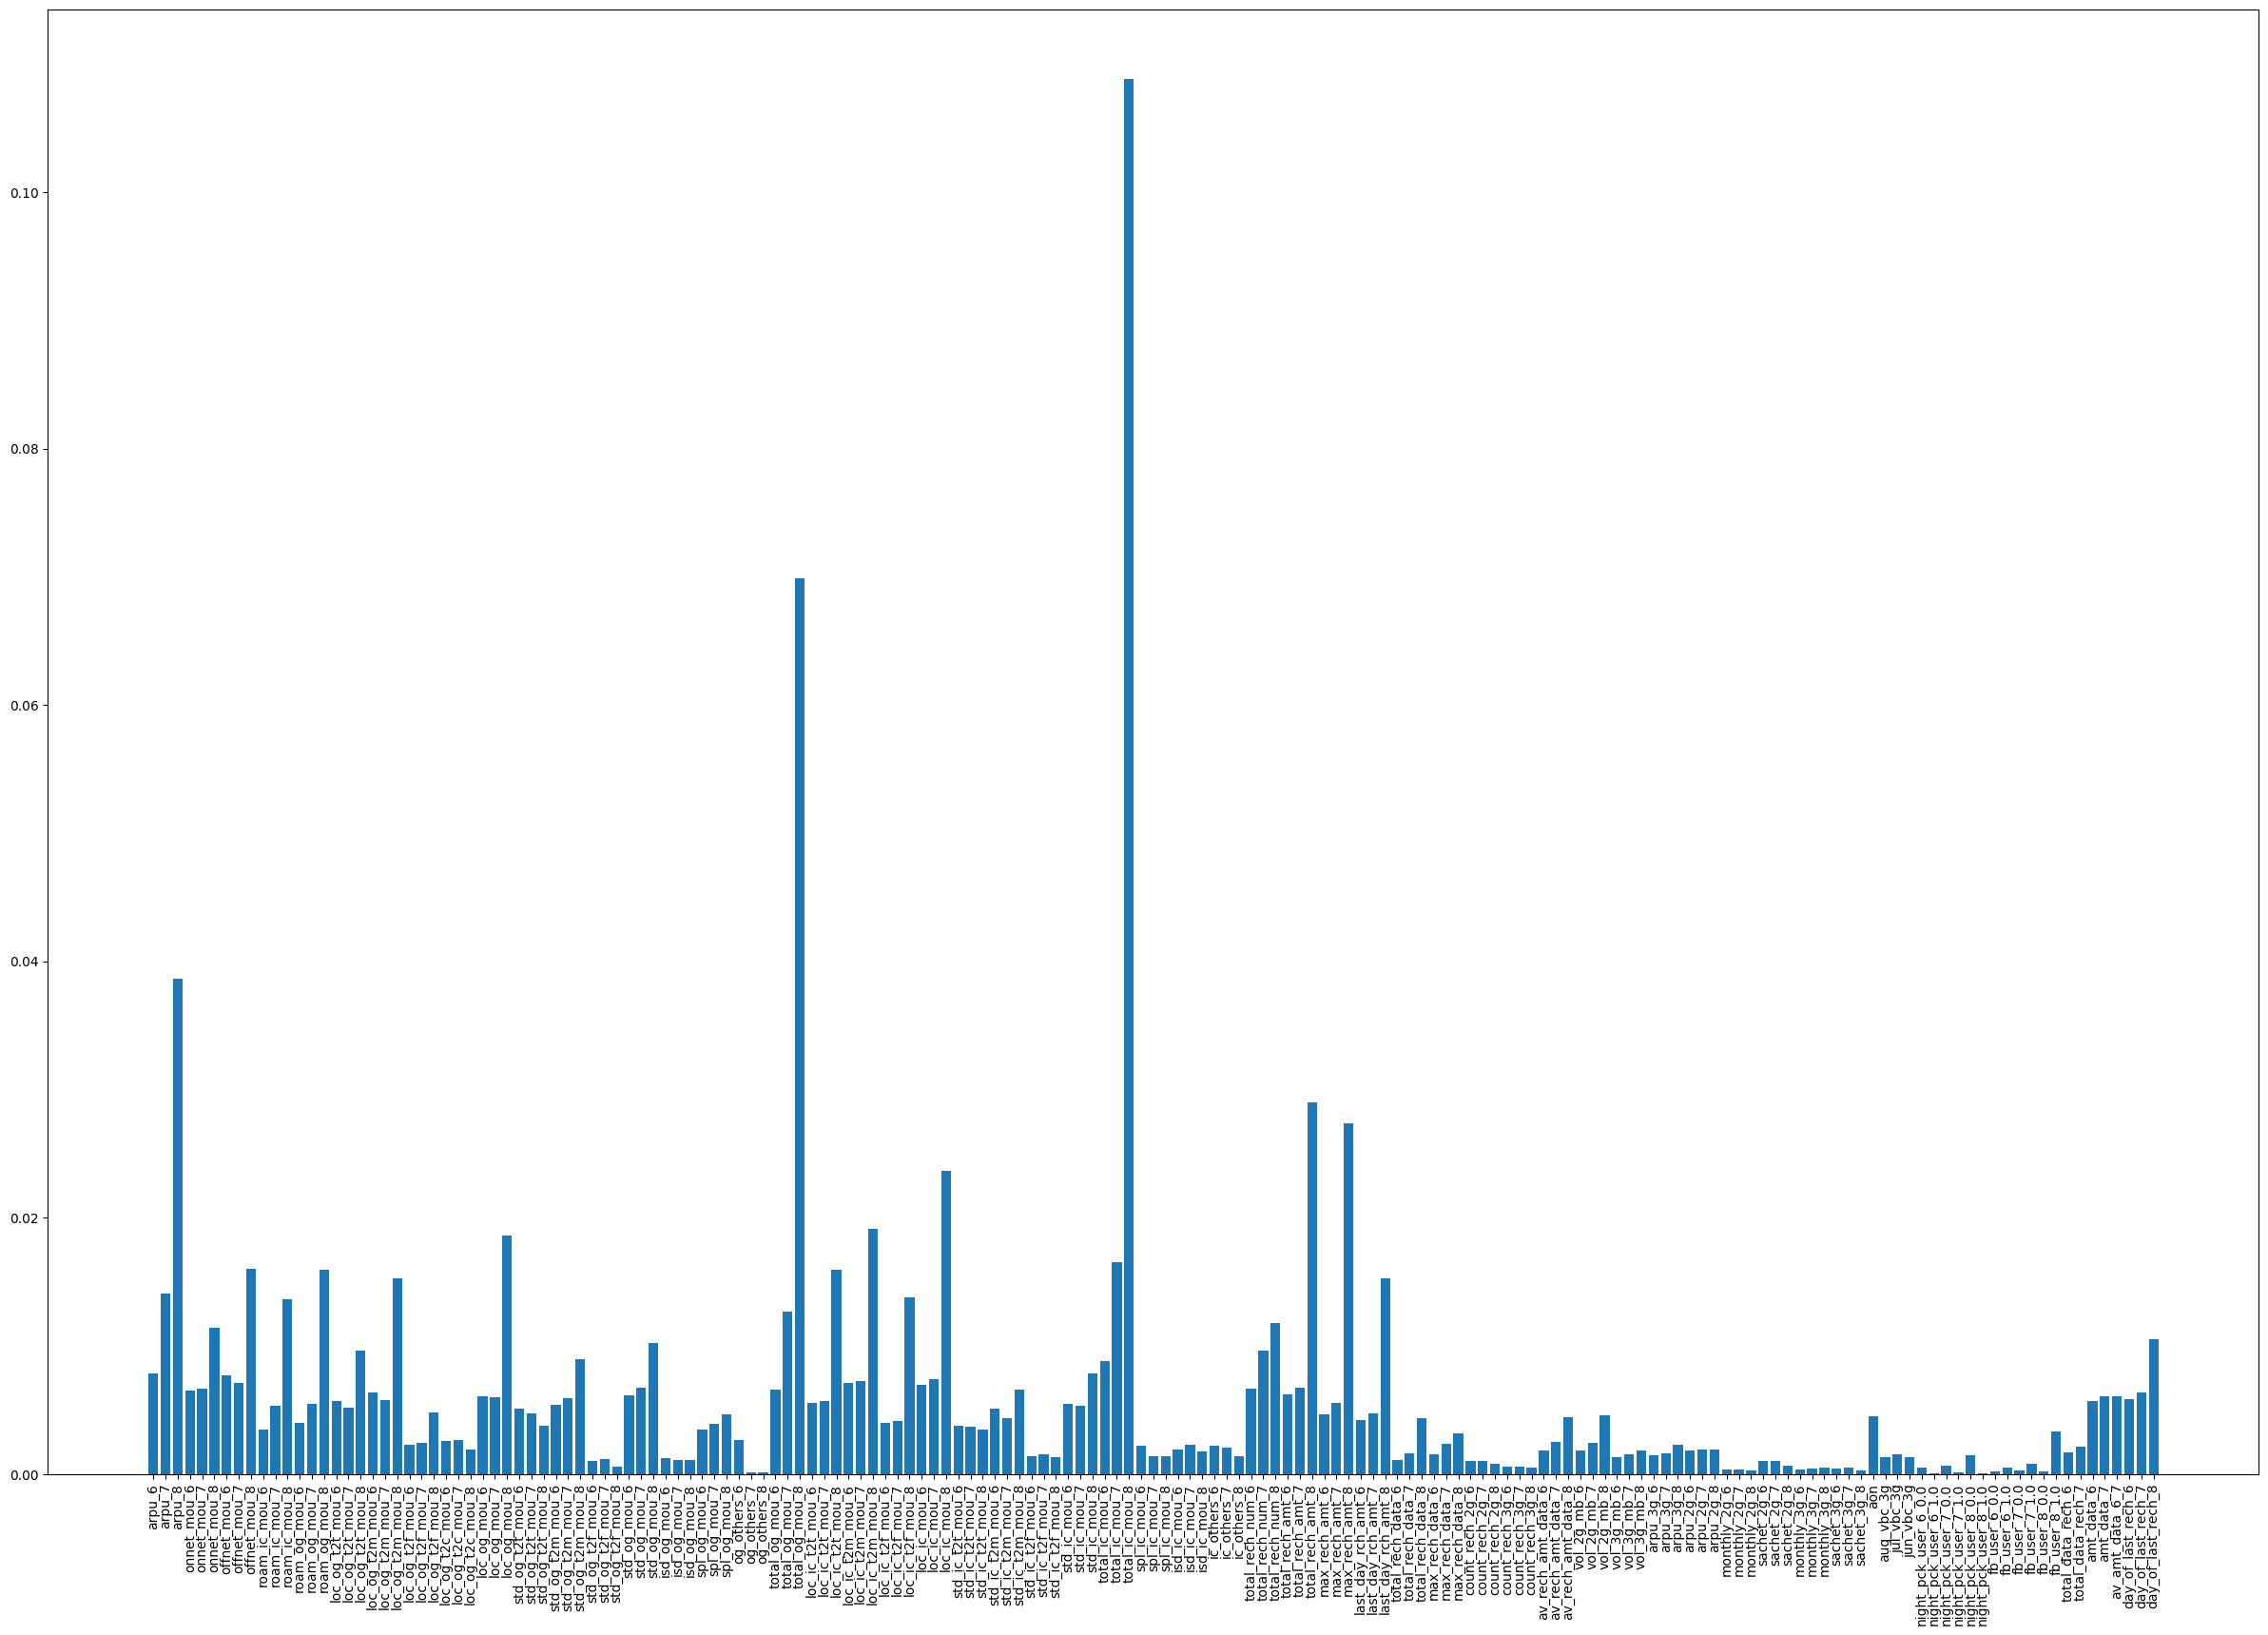

In [123]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [125]:
feature_importances.sort_values(by="importance" , ascending=False)

col  importance
80         total_ic_mou_8    0.108824
53         total_og_mou_8    0.069862
2                  arpu_8    0.038632
95       total_rech_amt_8    0.028975
98         max_rech_amt_8    0.027376
65           loc_ic_mou_8    0.023631
59       loc_ic_t2m_mou_8    0.019166
29           loc_og_mou_8    0.018607
79         total_ic_mou_7    0.016507
8            offnet_mou_8    0.016018
56       loc_ic_t2t_mou_8    0.015969
14          roam_og_mou_8    0.015966
20       loc_og_t2m_mou_8    0.015262
101    last_day_rch_amt_8    0.015242
1                  arpu_7    0.014088
62       loc_ic_t2f_mou_8    0.013830
11          roam_ic_mou_8    0.013626
52         total_og_mou_7    0.012708
92       total_rech_num_8    0.011771
5             onnet_mou_8    0.011395
164    day_of_last_rech_8    0.010535
41           std_og_mou_8    0.010207
91       total_rech_num_7    0.009632
17       loc_og_t2t_mou_8    0.009605
35       std_og_t2m_mou_8    0.008941
78         total_ic_mou_6    0.008854
77           std_ic_mou_8    0.007887
0                  arpu_6    0.007873
6            offnet_mou_6    0.007687
64           loc_ic_mou_7    0.007403
58       loc_ic_t2m_mou_7    0.007242
7            offnet_mou_7    0.007138
57       loc_ic_t2m_mou_6    0.007119
63           loc_ic_mou_6    0.006942
94       total_rech_amt_7    0.006760
40           std_og_mou_7    0.006750
4             onnet_mou_7    0.006689
90       total_rech_num_6    0.006642
71       std_ic_t2m_mou_8    0.006569
51         total_og_mou_6    0.006561
3             onnet_mou_6    0.006549
163    day_of_last_rech_7    0.006363
18       loc_og_t2m_mou_6    0.006342
93       total_rech_amt_6    0.006189
39           std_og_mou_6    0.006170
160            amt_data_7    0.006064
27           loc_og_mou_6    0.006055
161       av_amt_data_6_7    0.006049
28           loc_og_mou_7    0.005975
34       std_og_t2m_mou_7    0.005944
162    day_of_last_rech_6    0.005841
19       loc_og_t2m_mou_7    0.005816
55       loc_ic_t2t_mou_7    0.005726
159            amt_data_6    0.005697
15       loc_og_t2t_mou_6    0.005674
97         max_rech_amt_7    0.005594
54       loc_ic_t2t_mou_6    0.005588
75           std_ic_mou_6    0.005469
13          roam_og_mou_7    0.005469
33       std_og_t2m_mou_6    0.005410
10          roam_ic_mou_7    0.005342
76           std_ic_mou_7    0.005322
16       loc_og_t2t_mou_7    0.005196
69       std_ic_t2m_mou_6    0.005094
30       std_og_t2t_mou_6    0.005082
23       loc_og_t2f_mou_8    0.004794
31       std_og_t2t_mou_7    0.004739
100    last_day_rch_amt_7    0.004732
96         max_rech_amt_6    0.004704
47           spl_og_mou_8    0.004674
119           vol_2g_mb_8    0.004606
141                   aon    0.004524
116    av_rech_amt_data_8    0.004426
70       std_ic_t2m_mou_7    0.004387
104     total_rech_data_8    0.004347
99     last_day_rch_amt_6    0.004227
61       loc_ic_t2f_mou_7    0.004153
12          roam_og_mou_6    0.003979
60       loc_ic_t2f_mou_6    0.003978
46           spl_og_mou_7    0.003956
66       std_ic_t2t_mou_6    0.003804
32       std_og_t2t_mou_8    0.003779
67       std_ic_t2t_mou_7    0.003693
9           roam_ic_mou_6    0.003508
68       std_ic_t2t_mou_8    0.003480
45           spl_og_mou_6    0.003477
156         fb_user_8_1.0    0.003323
107       max_rech_data_8    0.003205
48            og_others_6    0.002664
25       loc_og_t2c_mou_7    0.002654
24       loc_og_t2c_mou_6    0.002565
115    av_rech_amt_data_7    0.002516
22       loc_og_t2f_mou_7    0.002457
118           vol_2g_mb_7    0.002427
106       max_rech_data_7    0.002341
85           isd_ic_mou_7    0.002298
125             arpu_3g_8    0.002286
21       loc_og_t2f_mou_6    0.002263
87            ic_others_6    0.002220
81           spl_ic_mou_6    0.002217
158     total_data_rech_7    0.002156
88            ic_others_7    0.002046
84           isd_ic_mou_6    0.001942
128             arpu_2g_8    0.001919
26       loc_og_t2c_mou_8    0.0

### Lets Start PCA

<Axes: >

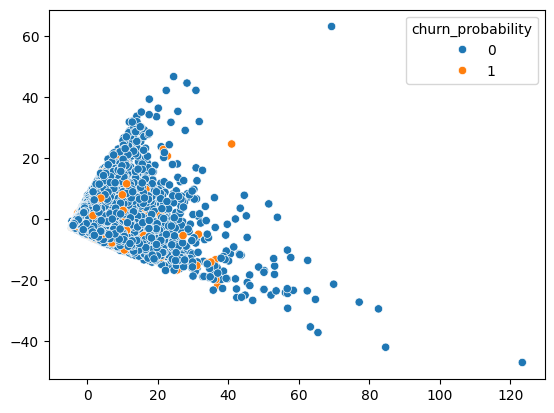

In [128]:
pca = PCA()
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<Axes: >

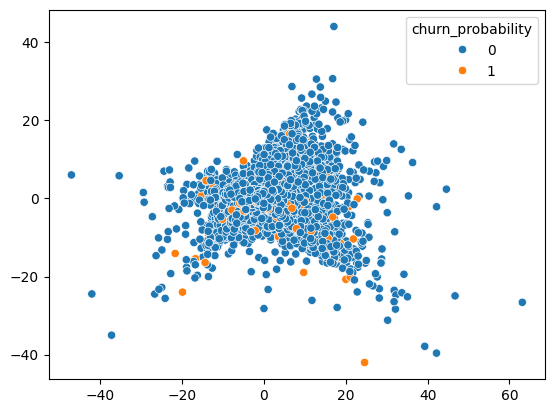

In [130]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

In [132]:
pca_components.shape

(48999, 165)

<BarContainer object of 165 artists>

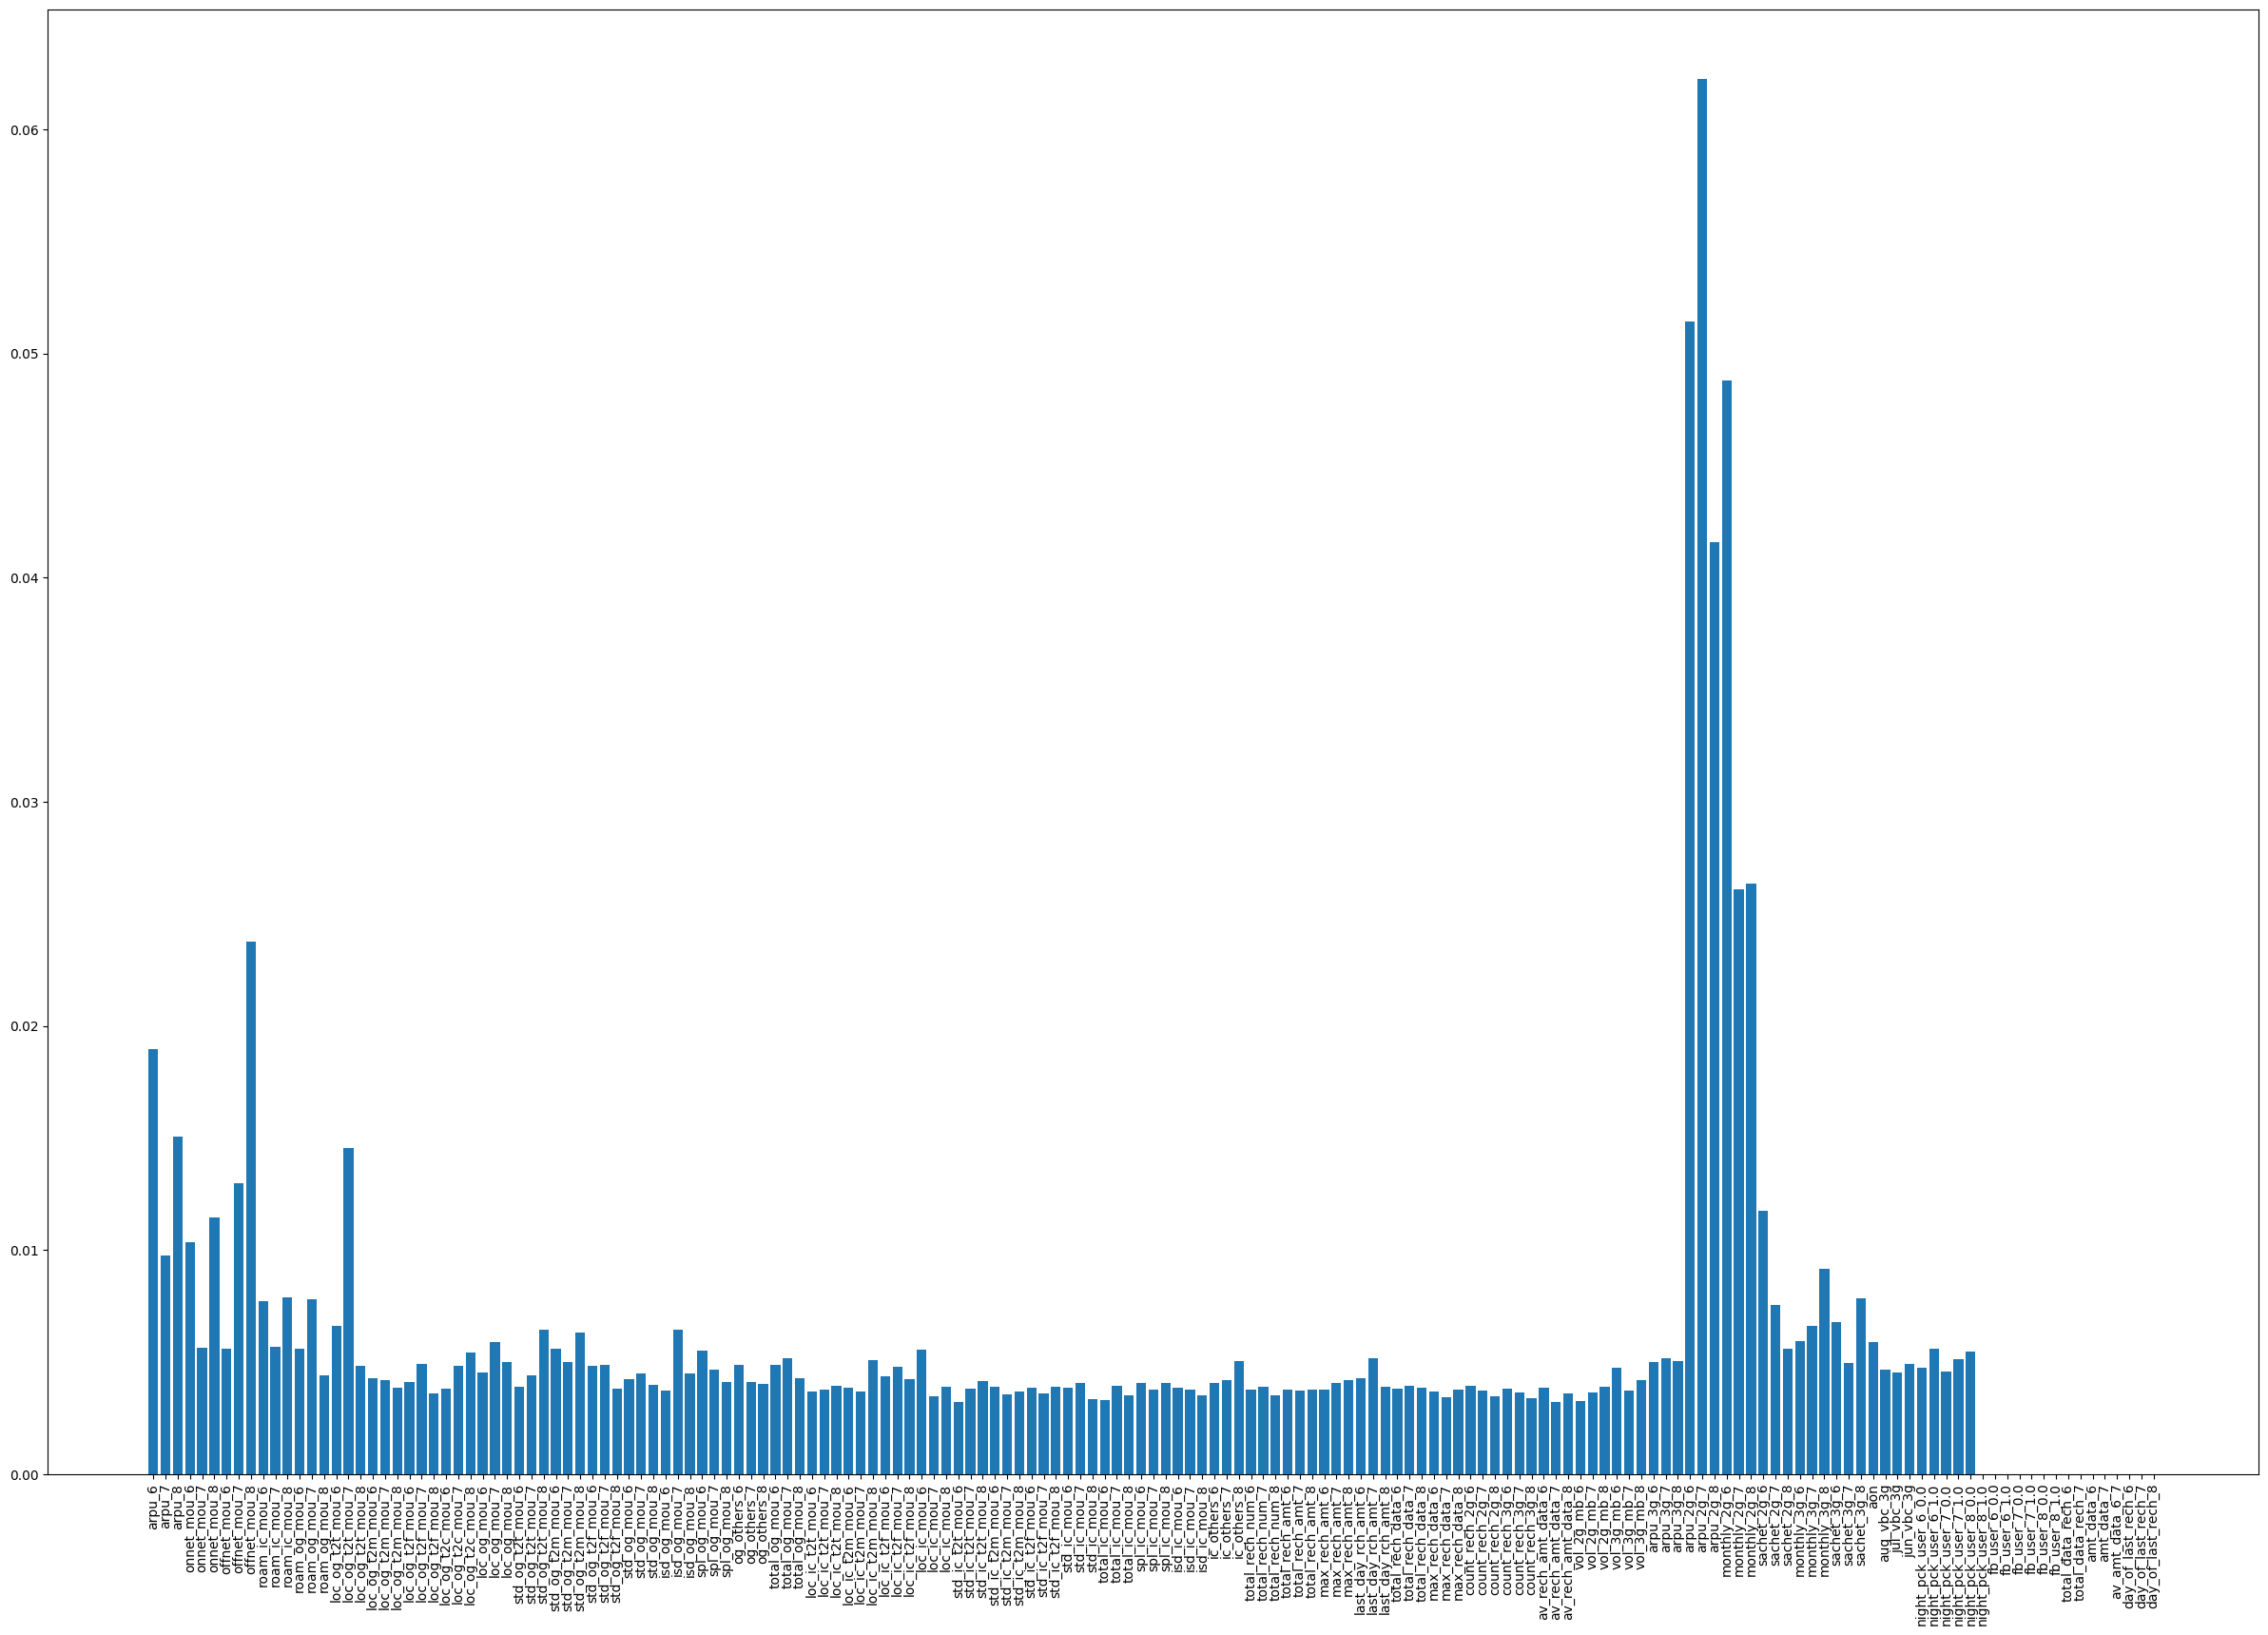

In [134]:
# Let Generate random forest model for prediction
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':X.columns, 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [136]:
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

In [138]:
feature_importances

col  importance
0               arpu_2g_7    0.062240
1               arpu_2g_6    0.051436
2            monthly_2g_6    0.048795
3               arpu_2g_8    0.041565
4            monthly_2g_8    0.026336
5            monthly_2g_7    0.026077
6            offnet_mou_8    0.023749
7                  arpu_6    0.018957
8                  arpu_8    0.015063
9        loc_og_t2t_mou_7    0.014564
10           offnet_mou_7    0.012984
11            sachet_2g_6    0.011764
12            onnet_mou_8    0.011460
13            onnet_mou_6    0.010368
14                 arpu_7    0.009758
15           monthly_3g_8    0.009152
16          roam_ic_mou_8    0.007907
17            sachet_3g_8    0.007854
18          roam_og_mou_7    0.007796
19          roam_ic_mou_6    0.007719
20            sachet_2g_7    0.007548
21            sachet_3g_6    0.006775
22           monthly_3g_7    0.006615
23       loc_og_t2t_mou_6    0.006599
24       std_og_t2t_mou_8    0.006442
25           isd_og_mou_7    0.006429
26       std_og_t2m_mou_8    0.006330
27           monthly_3g_6    0.005950
28                    aon    0.005898
29           loc_og_mou_7    0.005898
30          roam_ic_mou_7    0.005680
31            onnet_mou_7    0.005639
32   night_pck_user_6_1.0    0.005619
33            sachet_2g_8    0.005605
34       std_og_t2m_mou_6    0.005599
35           offnet_mou_6    0.005593
36          roam_og_mou_6    0.005579
37           loc_ic_mou_6    0.005546
38           spl_og_mou_6    0.005513
39   night_pck_user_8_0.0    0.005451
40       loc_og_t2c_mou_8    0.005431
41         total_og_mou_7    0.005183
42     last_day_rch_amt_7    0.005181
43              arpu_3g_7    0.005161
44   night_pck_user_7_1.0    0.005111
45       loc_ic_t2m_mou_8    0.005090
46              arpu_3g_8    0.005060
47            ic_others_8    0.005055
48              arpu_3g_6    0.005010
49           loc_og_mou_8    0.004995
50       std_og_t2m_mou_7    0.004987
51            sachet_3g_7    0.004973
52       loc_og_t2f_mou_7    0.004903
53             jun_vbc_3g    0.004901
54            og_others_6    0.004894
55       std_og_t2f_mou_7    0.004891
56         total_og_mou_6    0.004877
57       std_og_t2f_mou_6    0.004850
58       loc_og_t2c_mou_7    0.004838
59       loc_og_t2t_mou_8    0.004833
60       loc_ic_t2f_mou_7    0.004796
61            vol_3g_mb_6    0.004733
62   night_pck_user_6_0.0    0.004728
63             aug_vbc_3g    0.004679
64           spl_og_mou_7    0.004668
65   night_pck_user_7_0.0    0.004580
66           loc_og_mou_6    0.004553
67             jul_vbc_3g    0.004542
68           isd_og_mou_8    0.004500
69           std_og_mou_7    0.004483
70          roam_og_mou_8    0.004428
71       std_og_t2t_mou_7    0.004424
72       loc_ic_t2f_mou_6    0.004379
73         total_og_mou_8    0.004299
74       loc_og_t2m_mou_6    0.004274
75     last_day_rch_amt_6    0.004265
76       loc_ic_t2f_mou_8    0.004236
77           std_og_mou_6    0.004232
78            ic_others_7    0.004213
79         max_rech_amt_8    0.004199
80       loc_og_t2m_mou_7    0.004196
81            vol_3g_mb_8    0.004178
82       std_ic_t2t_mou_8    0.004142
83       loc_og_t2f_mou_6    0.004125
84            og_others_7    0.004120
85           spl_og_mou_8    0.004108
86           spl_ic_mou_6    0.004086
87         max_rech_amt_7    0.004080
88           std_ic_mou_7    0.004068
89           spl_ic_mou_8    0.004062
90            ic_others_6    0.004058
91            og_others_8    0.004008
92           std_og_mou_8    0.003987
93         total_ic_mou_7    0.003951
94       loc_ic_t2t_mou_8    0.003951
95        count_rech_2g_6    0.003925
96      total_rech_data_7    0.003923
97     last_day_rch_amt_8    0.003920
98       std_og_t2t_mou_6    0.003916
99            vol_2g_mb_8    0.003916
100      std_ic_t2m_mou_6    0.003904
101      std_ic_t2f_mou_8    0.003890
102          loc_ic_mou_8    0.003887
103      total_rech_num_7    0.003879
104     total_rech_data_8    0.0

In [155]:
col = feature_importances['col'][:30]
col

0            arpu_2g_7
1            arpu_2g_6
2         monthly_2g_6
3            arpu_2g_8
4         monthly_2g_8
5         monthly_2g_7
6         offnet_mou_8
7               arpu_6
8               arpu_8
9     loc_og_t2t_mou_7
10        offnet_mou_7
11         sachet_2g_6
12         onnet_mou_8
13         onnet_mou_6
14              arpu_7
15        monthly_3g_8
16       roam_ic_mou_8
17         sachet_3g_8
18       roam_og_mou_7
19       roam_ic_mou_6
20         sachet_2g_7
21         sachet_3g_6
22        monthly_3g_7
23    loc_og_t2t_mou_6
24    std_og_t2t_mou_8
25        isd_og_mou_7
26    std_og_t2m_mou_8
27        monthly_3g_6
28                 aon
29        loc_og_mou_7
Name: col, dtype: object

<Axes: xlabel='churn_probability', ylabel='Count'>

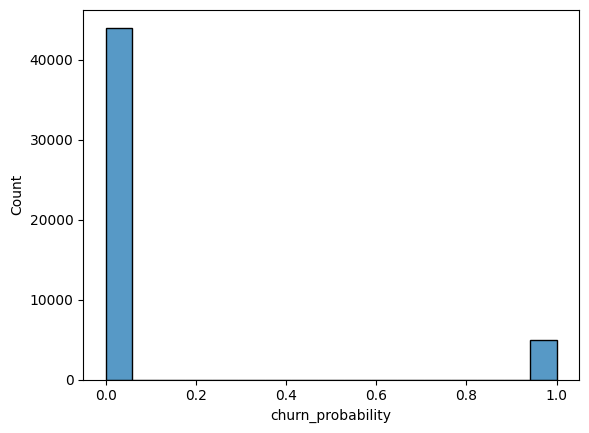

In [140]:
#Distribution for the churn probability
sns.histplot(y_train)

### Model Building

In [143]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
modelCV = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [145]:
# fit model
modelCV.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/pandas/core/arr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [147]:
# cross validation results
pd.DataFrame(modelCV.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.260225      0.060645         0.000000        0.000000   
1        1.612676      0.091992         0.000000        0.000000   
2        1.230640      0.113494         0.021691        0.005594   
3        1.610450      0.096381         0.028999        0.006770   
4        0.995776      0.066422         0.000000        0.000000   
5        1.201740      0.110270         0.000000        0.000000   
6        1.330294      0.119803         0.028779        0.007458   
7        1.678759      0.104972         0.028011        0.008815   
8        1.008456      0.065792         0.000000        0.000000   
9        1.201695      0.116919         0.000000        0.000000   
10       1.302618      0.038056         0.026543        0.001901   
11       1.754775      0.115930         0.027724        0.007614   
12       1.079770      0.088498         0.000000        0.000000   
13       1.319532      0.092548         0.000000        0.000000   
14       1.244192      0.079086         0.026264        0.004636   
15       1.594869      0.050616         0.028280        0.001844   
16       1.049611      0.090174         0.000000        0.000000   
17       1.280060      0.108612         0.000000        0.000000   
18       1.287212      0.050625         0.022744        0.005062   
19       1.677046      0.103329         0.028074        0.010853   
20       1.059018      0.032997         0.000000        0.000000   
21       1.203879      0.136964         0.000000        0.000000   
22       1.343277      0.060191         0.034457        0.014086   
23       1.740713      0.013358         0.032657        0.006810   
24       1.079320      0.103884         0.000000        0.000000   
25       1.343636      0.057879         0.000000        0.000000   
26       1.248757      0.066497         0.021976        0.004561   
27       1.611773      0.061900         0.032637        0.008099   
28       0.963124      0.043693         0.000000        0.000000   
29       1.234787      0.046084         0.000000        0.000000   
30       1.180094      0.051104         0.015546        0.003606   
31       1.084600      0.176142         0.013797        0.001689   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [151]:
# print best hyperparameters
print("Best AUC: ", modelCV.best_score_)
print("Best hyperparameters: ", modelCV.best_params_)
# predict churn on test data
y_pred = modelCV.predict(X_val)

# create onfusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)


# check area under curve
y_pred_prob = modelCV.predict_proba(X_val)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_val, y_pred_prob),2))

Best AUC:  0.8739356524795252
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2', 'pca__n_components': 80}
[[16157  2697]
 [  856  1290]]
AUC:    	 0.82


<Axes: >

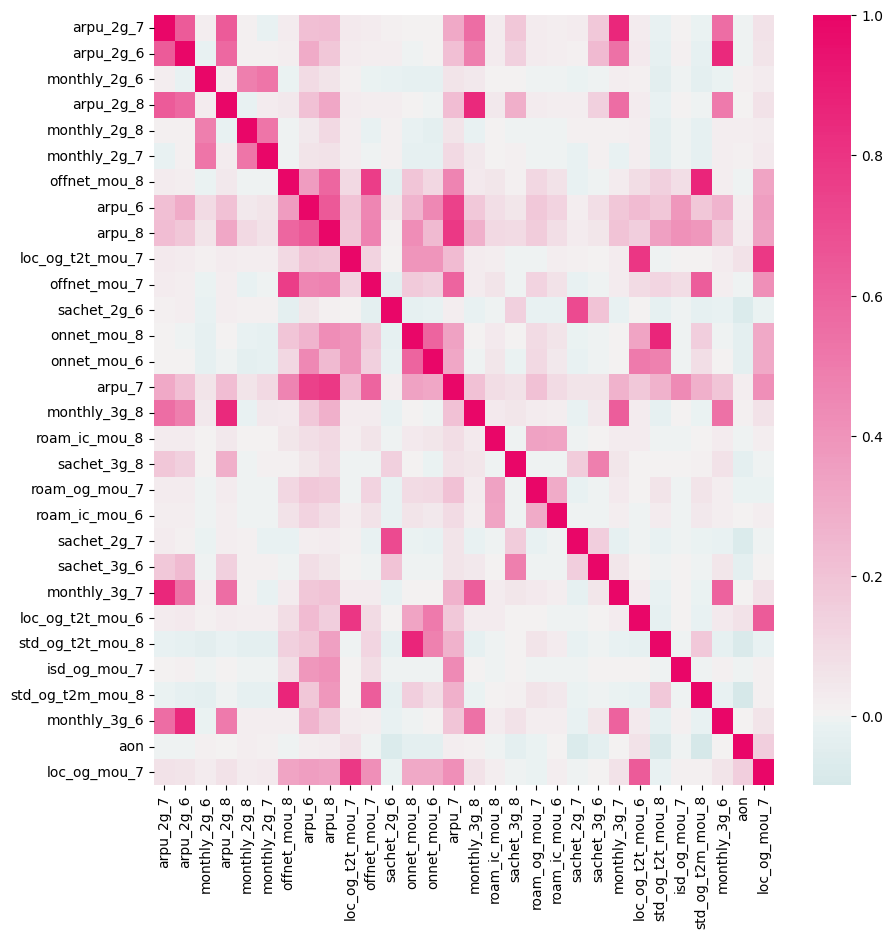

In [157]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X[col].corr(), center=0.0, cmap=mycmap)

In [159]:
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X[col], y, test_size=0.3)

In [161]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forestModel = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
modelRF = GridSearchCV(estimator=forestModel, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [163]:
modelRF.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [167]:
# print best hyperparameters
print("Best AUC: ", modelRF.best_score_)
print("Best hyperparameters: ", modelRF.best_params_)
# predict churn on test data
y_pred_new = modelRF.predict(X_val_new)

# create onfusion matrix
cm = confusion_matrix(y_val_new, y_pred_new)
print(cm)


# check area under curve
y_pred_prob = modelRF.predict_proba(X_val_new)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_val_new, y_pred_prob),2))

Best AUC:  0.9174894397145399
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}
[[18554   308]
 [  992  1146]]
AUC:    	 0.92


In [220]:
## Validation metrics
roc_auc_score(y_val_new, y_pred_new)
recall_score(y_val_new, y_pred_new)
confusion_matrix(y_val_new, y_pred_new)
print(classification_report(y_val_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18862
           1       0.79      0.54      0.64      2138

    accuracy                           0.94     21000
   macro avg       0.87      0.76      0.80     21000
weighted avg       0.93      0.94      0.93     21000



In [169]:
# Fitting for whole training data
modelRF.fit(X[col], y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/prasoonmahawar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [214]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
import joblib

### Predicting on Unseen data

In [173]:
unseen[categorical_variable] = unseen[categorical_variable].apply(lambda x: x.fillna(-1))
unseen[recharge_col] = unseen[recharge_col].apply(lambda x: x.fillna(0))
for i in unseen.columns:
    if i in ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']:
        unseen[i].replace(np.nan,unseen[i].median(),inplace=True)
        
for i in numerical_variable:
    if i != 'churn_probability':
        unseen[i].replace(np.nan,unseen[i].median(),inplace=True)
    
unseen['total_data_rech_6'] = unseen.total_rech_data_6 * unseen.av_rech_amt_data_6
unseen['total_data_rech_7'] = unseen.total_rech_data_7 * unseen.av_rech_amt_data_7

unseen['amt_data_6'] = unseen.total_rech_amt_6 + unseen.total_data_rech_6
unseen['amt_data_7'] = unseen.total_rech_amt_6 + unseen.total_data_rech_7

unseen['av_amt_data_6_7'] = (unseen.amt_data_6 + unseen.amt_data_7)/2


unseen['date_of_last_rech_6'].replace(np.nan,unseen['date_of_last_rech_6'].mode().values[0],inplace=True)
unseen['date_of_last_rech_7'].replace(np.nan,unseen['date_of_last_rech_7'].mode().values[0],inplace=True)
unseen['date_of_last_rech_8'].replace(np.nan,unseen['date_of_last_rech_8'].mode().values[0],inplace=True)

unseen['day_of_last_rech_6'] = pd.to_datetime(unseen['date_of_last_rech_6'], format='%m/%d/%Y').dt.day
unseen['day_of_last_rech_7'] = pd.to_datetime(unseen['date_of_last_rech_7'], format='%m/%d/%Y').dt.day
unseen['day_of_last_rech_8'] = pd.to_datetime(unseen['date_of_last_rech_8'], format='%m/%d/%Y').dt.day

unseen.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
unseen.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [177]:
submission_data = unseen.set_index('id')[col]
submission_data.shape

(30000, 30)

In [179]:
unseen['churn_probability'] = modelRF.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29693
           1       1.00      1.00      1.00       307

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [218]:
## Save model object
joblib.dump(modelRF, 'final_churn_model_v1.sav')

['final_churn_model_v1.sav']